# Time Series Forecasting using NN, LSTM and CNN

In [ ]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

from keras.layers import Conv1D, Conv2D, MaxPooling2D 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np



from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np




Using TensorFlow backend.


In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Fully Connected Neural Networks

   ## Data preprocessing

In [ ]:
def to_sequences(seq_size, data, label):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        print(i)
        window = data[i:(i+seq_size)].values
        after_window = label[i+seq_size]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
data_set = pd.read_csv(r'C:\Users\koush\Downloads\CSC 215\Assignment 2\CSC215_P2_Stock_Price.csv', sep=',')
data_set.drop("Date",axis = 1,inplace = True)
data_set.drop("Adj_Close",axis = 1,inplace = True)
close_set=data_set[["Close"]]
encode_numeric_zscore(data_set,"Open")
encode_numeric_zscore(data_set,"Low")
encode_numeric_zscore(data_set,"High")
encode_numeric_zscore(data_set,"Volume")
#encode_numeric_zscore(data_set,"Close")
data_set

Open      High       Low       Close    Volume
0    -0.894209 -0.885022 -0.892306    4.125000  1.104812
1    -0.883762 -0.886056 -0.885975    4.015625 -0.497301
2    -0.887941 -0.889159 -0.887558    4.000000 -0.892217
3    -0.887941 -0.890194 -0.891251    3.843750 -0.000263
4    -0.896820 -0.898986 -0.906551    3.390625  3.729366
5    -0.904655 -0.900020 -0.904969    3.437500  5.921757
6    -0.903610 -0.904158 -0.916576    3.500000  6.939265
7    -0.905700 -0.904675 -0.904441    3.484375  2.753792
8    -0.904655 -0.903641 -0.903913    3.578125  3.266616
9    -0.901521 -0.896400 -0.899693    3.609375  7.412869
10   -0.898387 -0.898469 -0.898637    3.640625  2.094693
11   -0.902044 -0.901572 -0.900748    3.578125  2.902040
12   -0.903088 -0.902089 -0.901803    3.578125  4.108496
13   -0.902044 -0.901572 -0.900220    3.613275  3.077421
14   -0.900999 -0.902606 -0.901803    3.609375  0.457554
15   -0.902044 -0.903124 -0.902331    3.562500  0.683255
16   -0.900999 -0.902606 -0.903386    3.515625  0.624055
17   -0.902566 -0.901572 -0.900748    3.593750  1.713344
18   -0.902044 -0.900538 -0.900748    3.656250  1.649456
19   -0.901521 -0.901572 -0.901803    3.562500  1.190899
20   -0.902044 -0.897434 -0.903913    3.765625  1.696817
21   -0.895253 -0.886056 -0.894417    3.828125  2.119607
22   -0.895776 -0.897952 -0.898110    3.703125  1.357401
23   -0.898387 -0.898469 -0.898637    3.750000  1.020698
24   -0.896298 -0.898469 -0.899165    3.687500  1.496028
25   -0.899432 -0.900538 -0.899165    3.640625  0.493567
26   -0.903088 -0.902089 -0.902331    3.562500  1.406241
27   -0.901521 -0.900538 -0.900748    3.687500  1.064605
28   -0.897343 -0.895366 -0.895472    3.781250 -0.106824
29   -0.893164 -0.893297 -0.892834    3.812500 -0.276532
...        ...       ...       ...         ...       ...
4362  2.854359  2.823358  2.806653  115.510002  0.185663
4363  2.848676  2.812765  2.830965  115.180000 -0.256614
4364  2.851685  2.824351  2.865743  115.269997 -0.361880
4365  2.831294  2.799856  2.790108  114.239998 -0.391295
4366  2.797531  2.843549  2.820159  116.449997 -0.255565
4367  2.883442  2.850169  2.878912  116.190002 -0.568095
4368  2.862716  2.841563  2.891743  116.480003 -0.715849
4369  2.872076  2.859768  2.889042  116.160004 -0.559400
4370  2.847673  2.833619  2.869795  116.260002 -0.557241
4371  2.847339  2.814420  2.813744  114.129997 -0.556193
4372  2.787502  2.805814  2.812731  114.500000 -0.746313
4373  2.823939  2.815082  2.860678  115.639999 -0.363545
4374  2.848676  2.809786  2.851562  114.830002 -0.607808
4375  2.829956  2.814751  2.862029  115.570000 -0.579935
4376  2.838982  2.810117  2.806653  113.570000 -0.556563
4377  2.768114  2.737958  2.772212  113.110001 -0.462150
4378  2.760760  2.783637  2.779303  114.220001 -0.490271
4379  2.790845  2.786947  2.821510  114.220001 -0.278012
4380  2.789174  2.750867  2.776602  112.709999  0.117151
4381  2.748057  2.732993  2.763095  112.750000 -0.379023
4382  2.754074  2.731007  2.751277  111.760002 -0.417873
4383  2.741037  2.732662  2.776602  113.110001 -0.514197
4384  2.733014  2.726042  2.751952  111.830002 -0.319453
4385  2.722986  2.717436  2.744862  112.690002 -0.588815
4386  2.749728  2.743916  2.775589  113.660004 -0.488791
4387  2.782154  2.754177  2.787407  113.309998 -0.575988
4388  2.739700  2.735310  2.732368  111.870003 -0.048610
4389  2.723320  2.700885  2.701641  112.230003  0.155816
4390  2.737694  2.714457  2.760732  112.339996 -0.390000
4391  2.732346  2.777017  2.761069  113.190002 -0.167936

[4392 rows x 5 columns]

In [ ]:
split_70 = int(len(data_set)* 0.70)
split_30 = len(data_set) - split_70
print(split_70)
print(split_30)
train = data_set[0:split_70]
test = data_set[split_70:len(data_set)]
train_close = close_set[0:split_70].values
test_close = close_set[split_70:len(data_set)].values

3074
1318


In [ ]:
x_train,y_train = to_sequences(7,train,train_close)
x_test,y_test = to_sequences(7,test,test_close)

0
[[-8.94208763e-01 -8.85021698e-01 -8.92306409e-01  4.12500000e+00
   1.10481203e+00]
 [-8.83762414e-01 -8.86056090e-01 -8.85975321e-01  4.01562500e+00
  -4.97300682e-01]
 [-8.87940954e-01 -8.89159267e-01 -8.87558093e-01  4.00000000e+00
  -8.92217148e-01]
 [-8.87940954e-01 -8.90193659e-01 -8.91251228e-01  3.84375000e+00
  -2.63405247e-04]
 [-8.96820350e-01 -8.98985994e-01 -9.06551358e-01  3.39062500e+00
   3.72936618e+00]
 [-9.04655112e-01 -9.00020387e-01 -9.04968586e-01  3.43750000e+00
   5.92175691e+00]
 [-9.03610477e-01 -9.04157956e-01 -9.16575581e-01  3.50000000e+00
   6.93926498e+00]] - [3.484375]
1
[[-8.83762414e-01 -8.86056090e-01 -8.85975321e-01  4.01562500e+00
  -4.97300682e-01]
 [-8.87940954e-01 -8.89159267e-01 -8.87558093e-01  4.00000000e+00
  -8.92217148e-01]
 [-8.87940954e-01 -8.90193659e-01 -8.91251228e-01  3.84375000e+00
  -2.63405247e-04]
 [-8.96820350e-01 -8.98985994e-01 -9.06551358e-01  3.39062500e+00
   3.72936618e+00]
 [-9.04655112e-01 -9.00020387e-01 -9.04968586e-

 [-0.86913753 -0.8715746  -0.87911664  4.28125     1.24861984]] - [4.625]
44
[[-0.8712268  -0.85864469 -0.86909242  4.9375      1.18695268]
 [-0.85660191 -0.85192114 -0.85431988  5.078125    0.84852333]
 [-0.85399032 -0.85502432 -0.85748542  4.96875    -0.27431225]
 [-0.85555727 -0.85605871 -0.8643441   4.796875   -0.34288612]
 [-0.86339203 -0.86588544 -0.86856483  4.53125     0.07941056]
 [-0.86913753 -0.8715746  -0.87911664  4.28125     1.24861984]
 [-0.87540534 -0.86847142 -0.87331314  4.625       0.29499894]] - [4.625]
45
[[-0.85660191 -0.85192114 -0.85431988  5.078125    0.84852333]
 [-0.85399032 -0.85502432 -0.85748542  4.96875    -0.27431225]
 [-0.85555727 -0.85605871 -0.8643441   4.796875   -0.34288612]
 [-0.86339203 -0.86588544 -0.86856483  4.53125     0.07941056]
 [-0.86913753 -0.8715746  -0.87911664  4.28125     1.24861984]
 [-0.87540534 -0.86847142 -0.87331314  4.625       0.29499894]
 [-0.86913753 -0.86950581 -0.86750965  4.625      -0.30489916]] - [4.625]
46
[[-0.85399032

93
[[-0.83205299 -0.83433647 -0.83532661  5.625      -1.02369152]
 [-0.83466457 -0.83640526 -0.83743698  5.53125    -0.81303652]
 [-0.83884311 -0.84054283 -0.8416577   5.421875   -0.75852275]
 [-0.83884311 -0.83485367 -0.83638179  5.609375   -0.85201016]
 [-0.83518689 -0.83485367 -0.83268866  5.640625   -0.93291747]
 [-0.83309762 -0.83330208 -0.83268866  5.703125   -0.85225683]
 [-0.83100835 -0.83278489 -0.83005071  5.71875    -0.75383605]] - [5.6875]
94
[[-0.83466457 -0.83640526 -0.83743698  5.53125    -0.81303652]
 [-0.83884311 -0.84054283 -0.8416577   5.421875   -0.75852275]
 [-0.83884311 -0.83485367 -0.83638179  5.609375   -0.85201016]
 [-0.83518689 -0.83485367 -0.83268866  5.640625   -0.93291747]
 [-0.83309762 -0.83330208 -0.83268866  5.703125   -0.85225683]
 [-0.83100835 -0.83278489 -0.83005071  5.71875    -0.75383605]
 [-0.83153067 -0.83278489 -0.83005071  5.6875     -0.8108165 ]] - [5.625]
95
[[-0.83884311 -0.84054283 -0.8416577   5.421875   -0.75852275]
 [-0.83884311 -0.834853

 [-0.84615556 -0.83950844 -0.84693361  5.453125   -0.43637353]] - [5.046875]
125
[[-0.85764654 -0.85502432 -0.85748542  5.0625     -0.77726957]
 [-0.85399032 -0.85243834 -0.85168193  5.109375   -0.73656925]
 [-0.85242337 -0.85088675 -0.85062674  5.15625    -0.42330009]
 [-0.85085642 -0.84726638 -0.84851638  5.125      -0.14801791]
 [-0.85085642 -0.84674918 -0.84851638  5.25       -0.17317811]
 [-0.84615556 -0.83950844 -0.84693361  5.453125   -0.43637353]
 [-0.84093238 -0.84261161 -0.85062674  5.046875   -0.66133532]] - [5.03125]
126
[[-0.85399032 -0.85243834 -0.85168193  5.109375   -0.73656925]
 [-0.85242337 -0.85088675 -0.85062674  5.15625    -0.42330009]
 [-0.85085642 -0.84726638 -0.84851638  5.125      -0.14801791]
 [-0.85085642 -0.84674918 -0.84851638  5.25       -0.17317811]
 [-0.84615556 -0.83950844 -0.84693361  5.453125   -0.43637353]
 [-0.84093238 -0.84261161 -0.85062674  5.046875   -0.66133532]
 [-0.85190105 -0.84985236 -0.85273711  5.03125    -0.5128408 ]] - [4.984375]
127
[[

 [-0.89264181 -0.89019366 -0.89230641  4.         -0.6465352 ]] - [3.984375]
164
[[-0.90361048 -0.90157198 -0.90180304  3.5625     -0.17046476]
 [-0.90099889 -0.90312356 -0.90655136  3.546875   -0.4279868 ]
 [-0.90204352 -0.90415796 -0.90655136  3.4375     -0.83449669]
 [-0.90674438 -0.89743441 -0.90549618  3.734375    0.02267678]
 [-0.89786499 -0.89329684 -0.89705473  3.90625    -0.30366581]
 [-0.89264181 -0.89019366 -0.89230641  4.         -0.6465352 ]
 [-0.88898559 -0.89019366 -0.88861327  3.984375   -0.20228501]] - [4.015625]
165
[[-0.90099889 -0.90312356 -0.90655136  3.546875   -0.4279868 ]
 [-0.90204352 -0.90415796 -0.90655136  3.4375     -0.83449669]
 [-0.90674438 -0.89743441 -0.90549618  3.734375    0.02267678]
 [-0.89786499 -0.89329684 -0.89705473  3.90625    -0.30366581]
 [-0.89264181 -0.89019366 -0.89230641  4.         -0.6465352 ]
 [-0.88898559 -0.89019366 -0.88861327  3.984375   -0.20228501]
 [-0.88846327 -0.88812487 -0.88808568  4.015625    0.08681062]] - [4.03125]
166
[[

[[-0.88271778 -0.88347011 -0.8817546   4.1875     -0.82117658]
 [-0.88167314 -0.88398731 -0.8817546   4.15625    -0.64998856]
 [-0.88271778 -0.88295291 -0.8817546   4.203125   -0.35324621]
 [-0.88167314 -0.87622936 -0.87964423  4.34375    -0.02739695]
 [-0.87592765 -0.87260899 -0.87489592  4.4375      0.67856865]
 [-0.87331607 -0.87571217 -0.87489592  4.34375    -0.58955475]
 [-0.87644997 -0.86795422 -0.87542351  4.578125   -0.39986658]] - [4.5625]
190
[[-0.88167314 -0.88398731 -0.8817546   4.15625    -0.64998856]
 [-0.88271778 -0.88295291 -0.8817546   4.203125   -0.35324621]
 [-0.88167314 -0.87622936 -0.87964423  4.34375    -0.02739695]
 [-0.87592765 -0.87260899 -0.87489592  4.4375      0.67856865]
 [-0.87331607 -0.87571217 -0.87489592  4.34375    -0.58955475]
 [-0.87644997 -0.86795422 -0.87542351  4.578125   -0.39986658]
 [-0.86965984 -0.87002301 -0.8701476   4.5625     -0.86187691]] - [4.21875]
191
[[-0.88271778 -0.88295291 -0.8817546   4.203125   -0.35324621]
 [-0.88167314 -0.87622

 [-0.85484692 -0.85742411 -0.85626141  4.88       -0.65171524]] - [4.85]
239
[[-0.8611983  -0.85974115 -0.85896268  4.8375     -0.82980999]
 [-0.85910903 -0.86040316 -0.86039772  4.785      -0.84658345]
 [-0.86203401 -0.8628857  -0.86022889  4.7875     -0.8650836 ]
 [-0.86161615 -0.85833438 -0.86048214  4.9625     -0.85176349]
 [-0.85785547 -0.85709311 -0.85811853  4.965      -0.70203564]
 [-0.85484692 -0.85742411 -0.85626141  4.88       -0.65171524]
 [-0.85869118 -0.86114792 -0.85769646  4.85       -0.61594829]] - [4.8]
240
[[-0.85910903 -0.86040316 -0.86039772  4.785      -0.84658345]
 [-0.86203401 -0.8628857  -0.86022889  4.7875     -0.8650836 ]
 [-0.86161615 -0.85833438 -0.86048214  4.9625     -0.85176349]
 [-0.85785547 -0.85709311 -0.85811853  4.965      -0.70203564]
 [-0.85484692 -0.85742411 -0.85626141  4.88       -0.65171524]
 [-0.85869118 -0.86114792 -0.85769646  4.85       -0.61594829]
 [-0.85952688 -0.86205819 -0.86065097  4.8        -0.95955768]] - [4.66]
241
[[-0.86203401 

 [-0.83370351 -0.83433647 -0.83482013  5.575       0.14255773]] - [5.7425]
279
[[-0.83621063 -0.83185393 -0.83490454  5.7625     -0.69956895]
 [-0.82902355 -0.82647509 -0.83144355  5.615      -0.02221691]
 [-0.83270066 -0.83226769 -0.83026174  5.6975     -0.50544075]
 [-0.83119639 -0.83400547 -0.83228769  5.6275     -0.75506939]
 [-0.83320209 -0.83557774 -0.83195003  5.6225      0.13441766]
 [-0.83370351 -0.83433647 -0.83482013  5.575       0.14255773]
 [-0.83445565 -0.83144018 -0.83195003  5.7425      0.47087367]] - [5.8375]
280
[[-0.82902355 -0.82647509 -0.83144355  5.615      -0.02221691]
 [-0.83270066 -0.83226769 -0.83026174  5.6975     -0.50544075]
 [-0.83119639 -0.83400547 -0.83228769  5.6275     -0.75506939]
 [-0.83320209 -0.83557774 -0.83195003  5.6225      0.13441766]
 [-0.83370351 -0.83433647 -0.83482013  5.575       0.14255773]
 [-0.83445565 -0.83144018 -0.83195003  5.7425      0.47087367]
 [-0.8294414  -0.82730261 -0.82730723  5.8375     -0.7723362 ]] - [5.94]
281
[[-0.8327

 [-0.8131451  -0.81323487 -0.81304118  6.2        -0.5128408 ]] - [6.115]
299
[[-0.82225431 -0.82275128 -0.82089173  6.0175     -0.62680171]
 [-0.81841006 -0.81571741 -0.81574245  6.1625      0.62405488]
 [-0.81481651 -0.81397963 -0.81219704  6.25       -0.28146564]
 [-0.81272724 -0.81257286 -0.81076199  6.2925      0.21655831]
 [-0.81272724 -0.81439339 -0.81169055  6.2625     -0.53602766]
 [-0.8131451  -0.81323487 -0.81304118  6.2        -0.5128408 ]
 [-0.81439866 -0.81737244 -0.81675542  6.115      -0.48126722]] - [6.095]
300
[[-0.81841006 -0.81571741 -0.81574245  6.1625      0.62405488]
 [-0.81481651 -0.81397963 -0.81219704  6.25       -0.28146564]
 [-0.81272724 -0.81257286 -0.81076199  6.2925      0.21655831]
 [-0.81272724 -0.81439339 -0.81169055  6.2625     -0.53602766]
 [-0.8131451  -0.81323487 -0.81304118  6.2        -0.5128408 ]
 [-0.81439866 -0.81737244 -0.81675542  6.115      -0.48126722]
 [-0.81615364 -0.81588292 -0.81540479  6.095      -0.75802942]] - [5.995]
301
[[-0.81481

[[-0.8085487  -0.80413222 -0.80873604  6.59        0.65365512]
 [-0.80136161 -0.79833962 -0.80113874  6.575      -0.36533297]
 [-0.80144519 -0.80289095 -0.79945045  6.5625     -1.02245818]
 [-0.80228089 -0.79709835 -0.80156081  6.535      -0.73582924]
 [-0.80320017 -0.80628375 -0.80595036  6.37       -1.00987808]
 [-0.80662657 -0.80371846 -0.80578153  6.6075     -0.86927697]
 [-0.80102733 -0.80164968 -0.80088549  6.655      -0.76197611]] - [6.66]
319
[[-0.80136161 -0.79833962 -0.80113874  6.575      -0.36533297]
 [-0.80144519 -0.80289095 -0.79945045  6.5625     -1.02245818]
 [-0.80228089 -0.79709835 -0.80156081  6.535      -0.73582924]
 [-0.80320017 -0.80628375 -0.80595036  6.37       -1.00987808]
 [-0.80662657 -0.80371846 -0.80578153  6.6075     -0.86927697]
 [-0.80102733 -0.80164968 -0.80088549  6.655      -0.76197611]
 [-0.79835307 -0.80098767 -0.80071666  6.66       -0.80884315]] - [6.74]
320
[[-0.80144519 -0.80289095 -0.79945045  6.5625     -1.02245818]
 [-0.80228089 -0.79709835 -

345
[[-0.81790863 -0.81720694 -0.8154892   6.0875     -0.38358645]
 [-0.81983076 -0.82192377 -0.82089173  5.995      -0.86779695]
 [-0.82150218 -0.82167551 -0.82097615  5.9625     -0.51358081]
 [-0.82108432 -0.81968948 -0.81844371  6.0375     -0.76148278]
 [-0.81899505 -0.8152209  -0.81650218  6.265      -0.84633678]
 [-0.81222582 -0.8090973  -0.80949577  6.3075     -0.7227558 ]
 [-0.81164082 -0.81058683 -0.81126848  6.245      -0.90529058]] - [6.3625]
346
[[-0.81983076 -0.82192377 -0.82089173  5.995      -0.86779695]
 [-0.82150218 -0.82167551 -0.82097615  5.9625     -0.51358081]
 [-0.82108432 -0.81968948 -0.81844371  6.0375     -0.76148278]
 [-0.81899505 -0.8152209  -0.81650218  6.265      -0.84633678]
 [-0.81222582 -0.8090973  -0.80949577  6.3075     -0.7227558 ]
 [-0.81164082 -0.81058683 -0.81126848  6.245      -0.90529058]
 [-0.8139808  -0.81124884 -0.81126848  6.3625     -0.88136373]] - [6.505]
347
[[-0.82150218 -0.82167551 -0.82097615  5.9625     -0.51358081]
 [-0.82108432 -0.819

382
[[-0.81916219 -0.81911022 -0.82376183  6.0625     -0.62162167]
 [-0.81941291 -0.81985498 -0.81759957  6.1025     -0.56760124]
 [-0.81941291 -0.82109625 -0.820132    6.0375     -0.56118786]
 [-0.81941291 -0.81737244 -0.82097615  6.075      -0.07919736]
 [-0.81832649 -0.81613117 -0.81565803  6.175      -0.64160183]
 [-0.8139808  -0.81695868 -0.81717749  6.1225     -0.54244104]
 [-0.81698935 -0.81985498 -0.81869695  6.0225     -0.20031166]] - [6.175]
383
[[-0.81941291 -0.81985498 -0.81759957  6.1025     -0.56760124]
 [-0.81941291 -0.82109625 -0.820132    6.0375     -0.56118786]
 [-0.81941291 -0.81737244 -0.82097615  6.075      -0.07919736]
 [-0.81832649 -0.81613117 -0.81565803  6.175      -0.64160183]
 [-0.8139808  -0.81695868 -0.81717749  6.1225     -0.54244104]
 [-0.81698935 -0.81985498 -0.81869695  6.0225     -0.20031166]
 [-0.82033218 -0.81819995 -0.81802164  6.175      -0.48743394]] - [6.1625]
384
[[-0.81941291 -0.82109625 -0.820132    6.0375     -0.56118786]
 [-0.81941291 -0.817

 [-0.81230939 -0.81364863 -0.81000226  6.2625     -0.70647567]] - [6.315]
401
[[-0.80930084 -0.80785603 -0.80654126  6.4875     -0.39197318]
 [-0.80478802 -0.80537349 -0.80426207  6.555      -0.8226566 ]
 [-0.8037016  -0.80413222 -0.80257378  6.47       -0.70844902]
 [-0.80604158 -0.80901455 -0.81067758  6.425      -0.45018697]
 [-0.8085487  -0.81075233 -0.8096646   6.2625     -0.59325478]
 [-0.81230939 -0.81364863 -0.81000226  6.2625     -0.70647567]
 [-0.81189153 -0.81323487 -0.80932694  6.315      -0.74742267]] - [6.35]
402
[[-0.80478802 -0.80537349 -0.80426207  6.555      -0.8226566 ]
 [-0.8037016  -0.80413222 -0.80257378  6.47       -0.70844902]
 [-0.80604158 -0.80901455 -0.81067758  6.425      -0.45018697]
 [-0.8085487  -0.81075233 -0.8096646   6.2625     -0.59325478]
 [-0.81230939 -0.81364863 -0.81000226  6.2625     -0.70647567]
 [-0.81189153 -0.81323487 -0.80932694  6.315      -0.74742267]
 [-0.81063797 -0.81157984 -0.80856721  6.35       -0.76789616]] - [6.23]
403
[[-0.8037016

 [-0.79935592 -0.79709835 -0.79700242  6.7525     -0.24101198]] - [6.8425]
453
[[-0.80403588 -0.8033047  -0.80232054  6.5075     -0.49261398]
 [-0.80353446 -0.80206343 -0.80156081  6.5        -0.79996308]
 [-0.80428659 -0.80429772 -0.80240495  6.5425     -0.93365748]
 [-0.80286589 -0.80123592 -0.80156081  6.6875     -0.87445701]
 [-0.7976845  -0.79958089 -0.79902837  6.66       -0.55600781]
 [-0.79935592 -0.79709835 -0.79700242  6.7525     -0.24101198]
 [-0.79592951 -0.79602258 -0.79497648  6.8425     -0.27357224]] - [6.7375]
454
[[-0.80353446 -0.80206343 -0.80156081  6.5        -0.79996308]
 [-0.80428659 -0.80429772 -0.80240495  6.5425     -0.93365748]
 [-0.80286589 -0.80123592 -0.80156081  6.6875     -0.87445701]
 [-0.7976845  -0.79958089 -0.79902837  6.66       -0.55600781]
 [-0.79935592 -0.79709835 -0.79700242  6.7525     -0.24101198]
 [-0.79592951 -0.79602258 -0.79497648  6.8425     -0.27357224]
 [-0.79283739 -0.79246427 -0.7939635   6.7375     -0.64579519]] - [6.8375]
455
[[-0.80

 [-0.81607007 -0.81654493 -0.81616452  6.1025      0.07003715]] - [6.37]
528
[[-0.80821442 -0.80587    -0.80704775  6.5025     -0.64505519]
 [-0.80353446 -0.80338746 -0.80578153  6.4425     -0.40923998]
 [-0.80645943 -0.80934556 -0.8090737   6.28       -0.54934776]
 [-0.81230939 -0.81447614 -0.81380091  6.195      -0.2094384 ]
 [-0.81356295 -0.81604842 -0.81532037  6.1225      0.10827079]
 [-0.81607007 -0.81654493 -0.81616452  6.1025      0.07003715]
 [-0.81690578 -0.80992482 -0.8154892   6.37        0.04635696]] - [6.0825]
529
[[-0.80353446 -0.80338746 -0.80578153  6.4425     -0.40923998]
 [-0.80645943 -0.80934556 -0.8090737   6.28       -0.54934776]
 [-0.81230939 -0.81447614 -0.81380091  6.195      -0.2094384 ]
 [-0.81356295 -0.81604842 -0.81532037  6.1225      0.10827079]
 [-0.81607007 -0.81654493 -0.81616452  6.1025      0.07003715]
 [-0.81690578 -0.80992482 -0.8154892   6.37        0.04635696]
 [-0.80687729 -0.8090973  -0.81675542  6.0825     -0.32833267]] - [6.25]
530
[[-0.806459

 [-0.81749078 -0.81687593 -0.81540479  6.2075     -0.33079936]] - [6.2]
609
[[-0.81406437 -0.81530366 -0.81329443  6.155      -0.91861069]
 [-0.81648793 -0.81944122 -0.81987876  5.9825     -0.52246088]
 [-0.82192003 -0.82151001 -0.82046966  6.075      -0.54022102]
 [-0.81899505 -0.8206825  -0.82139822  6.025      -0.65788196]
 [-0.81983076 -0.81985498 -0.81717749  6.1125     -0.90307057]
 [-0.81749078 -0.81687593 -0.81540479  6.2075     -0.33079936]
 [-0.81481651 -0.8148899  -0.81422299  6.2        -0.29108571]] - [6.225]
610
[[-0.81648793 -0.81944122 -0.81987876  5.9825     -0.52246088]
 [-0.82192003 -0.82151001 -0.82046966  6.075      -0.54022102]
 [-0.81899505 -0.8206825  -0.82139822  6.025      -0.65788196]
 [-0.81983076 -0.81985498 -0.81717749  6.1125     -0.90307057]
 [-0.81749078 -0.81687593 -0.81540479  6.2075     -0.33079936]
 [-0.81481651 -0.8148899  -0.81422299  6.2        -0.29108571]
 [-0.81272724 -0.8148899  -0.81126848  6.225      -0.56044785]] - [6.19]
611
[[-0.82192003

696
[[-0.80562372 -0.80868354 -0.80746982  6.3525     -0.4743605 ]
 [-0.81022012 -0.81207635 -0.81169055  6.2975      0.31374575]
 [-0.8111394  -0.80918005 -0.8090737   6.3875      0.0720105 ]
 [-0.80771299 -0.80934556 -0.80822956  6.3425     -0.44772029]
 [-0.80938441 -0.81157984 -0.8078919   6.37       -0.67021539]
 [-0.8085487  -0.81042132 -0.8078919   6.3875     -0.54268771]
 [-0.80813085 -0.81083508 -0.80763865  6.39       -0.4067733 ]] - [6.5]
697
[[-0.81022012 -0.81207635 -0.81169055  6.2975      0.31374575]
 [-0.8111394  -0.80918005 -0.8090737   6.3875      0.0720105 ]
 [-0.80771299 -0.80934556 -0.80822956  6.3425     -0.44772029]
 [-0.80938441 -0.81157984 -0.8078919   6.37       -0.67021539]
 [-0.8085487  -0.81042132 -0.8078919   6.3875     -0.54268771]
 [-0.80813085 -0.81083508 -0.80763865  6.39       -0.4067733 ]
 [-0.80796371 -0.80744227 -0.80561271  6.5        -0.45610702]] - [6.5025]
698
[[-0.8111394  -0.80918005 -0.8090737   6.3875      0.0720105 ]
 [-0.80771299 -0.80934

 [-0.79267025 -0.79213327 -0.78974278  6.9475     -0.4413069 ]] - [6.95]
759
[[-0.79392381 -0.79213327 -0.79269728  6.775      -0.72398915]
 [-0.79517738 -0.79560883 -0.79295053  6.84       -0.54638774]
 [-0.79183454 -0.7942848  -0.79311936  6.77       -0.8438701 ]
 [-0.79534452 -0.79569158 -0.79269728  6.8525     -0.57746798]
 [-0.79099884 -0.79362279 -0.79252846  6.83       -0.63148841]
 [-0.79267025 -0.79213327 -0.78974278  6.9475     -0.4413069 ]
 [-0.79183454 -0.79254702 -0.7893207   6.95       -0.49705401]] - [6.8125]
760
[[-0.79517738 -0.79560883 -0.79295053  6.84       -0.54638774]
 [-0.79183454 -0.7942848  -0.79311936  6.77       -0.8438701 ]
 [-0.79534452 -0.79569158 -0.79269728  6.8525     -0.57746798]
 [-0.79099884 -0.79362279 -0.79252846  6.83       -0.63148841]
 [-0.79267025 -0.79213327 -0.78974278  6.9475     -0.4413069 ]
 [-0.79183454 -0.79254702 -0.7893207   6.95       -0.49705401]
 [-0.78890957 -0.79213327 -0.79100899  6.8125     -0.69833561]] - [6.8225]
761
[[-0.7918

 [-0.77077471 -0.77119717 -0.76804825  7.595      -0.73138921]] - [7.775]
798
[[-0.77177755 -0.77103166 -0.76863915  7.5025     -0.3949332 ]
 [-0.76977186 -0.77119717 -0.76728852  7.55       -0.22892522]
 [-0.77052399 -0.76871463 -0.76948329  7.655      -0.31624591]
 [-0.76467404 -0.76606658 -0.76458725  7.5975     -0.32117928]
 [-0.7679333  -0.77136267 -0.76863915  7.48       -0.51950086]
 [-0.77077471 -0.77119717 -0.76804825  7.595      -0.73138921]
 [-0.76801687 -0.76465981 -0.7648405   7.775      -0.30563916]] - [7.9325]
799
[[-0.76977186 -0.77119717 -0.76728852  7.55       -0.22892522]
 [-0.77052399 -0.76871463 -0.76948329  7.655      -0.31624591]
 [-0.76467404 -0.76606658 -0.76458725  7.5975     -0.32117928]
 [-0.7679333  -0.77136267 -0.76863915  7.48       -0.51950086]
 [-0.77077471 -0.77119717 -0.76804825  7.595      -0.73138921]
 [-0.76801687 -0.76465981 -0.7648405   7.775      -0.30563916]
 [-0.76174906 -0.75977748 -0.7596068   7.9325      0.46347361]] - [7.815]
800
[[-0.7705

 [-0.75339198 -0.75663292 -0.7520939   7.975      -0.46005372]] - [8.035]
824
[[-0.75163699 -0.75398488 -0.75167183  8.015      -0.18921157]
 [-0.75355912 -0.75373662 -0.75133417  8.1125     -0.39986658]
 [-0.75297413 -0.7524126  -0.74964588  8.075      -0.47781386]
 [-0.75339198 -0.75481239 -0.75133417  8.09       -0.3737197 ]
 [-0.750467   -0.75406763 -0.75310688  8.0375     -0.56390121]
 [-0.75339198 -0.75663292 -0.7520939   7.975      -0.46005372]
 [-0.75548125 -0.75663292 -0.75395102  8.035      -0.5034674 ]] - [7.845]
825
[[-0.75355912 -0.75373662 -0.75133417  8.1125     -0.39986658]
 [-0.75297413 -0.7524126  -0.74964588  8.075      -0.47781386]
 [-0.75339198 -0.75481239 -0.75133417  8.09       -0.3737197 ]
 [-0.750467   -0.75406763 -0.75310688  8.0375     -0.56390121]
 [-0.75339198 -0.75663292 -0.7520939   7.975      -0.46005372]
 [-0.75548125 -0.75663292 -0.75395102  8.035      -0.5034674 ]
 [-0.75297413 -0.75655017 -0.75850941  7.845      -0.24742537]] - [7.9975]
826
[[-0.7529

 [-0.79350596 -0.7937883  -0.79143107  6.8375      0.42326662]] - [6.8725]
867
[[-0.78590102 -0.7881612  -0.78518439  6.9975     -0.51333414]
 [-0.78748886 -0.7879957  -0.78467791  7.05        0.06633712]
 [-0.78598459 -0.78923697 -0.78721034  6.935       0.2276584 ]
 [-0.78991242 -0.79221602 -0.78906746  6.8825      0.23875849]
 [-0.79158383 -0.79469856 -0.79252846  6.825       0.50318726]
 [-0.79350596 -0.7937883  -0.79143107  6.8375      0.42326662]
 [-0.79308811 -0.7939538  -0.79016485  6.8725     -0.25877212]] - [6.85]
868
[[-0.78748886 -0.7879957  -0.78467791  7.05        0.06633712]
 [-0.78598459 -0.78923697 -0.78721034  6.935       0.2276584 ]
 [-0.78991242 -0.79221602 -0.78906746  6.8825      0.23875849]
 [-0.79158383 -0.79469856 -0.79252846  6.825       0.50318726]
 [-0.79350596 -0.7937883  -0.79143107  6.8375      0.42326662]
 [-0.79308811 -0.7939538  -0.79016485  6.8725     -0.25877212]
 [-0.79058098 -0.79254702 -0.78974278  6.85        0.01182336]] - [6.8175]
869
[[-0.7859

906
[[-0.77888107 -0.7822031  -0.77969745  7.1575     -0.38210643]
 [-0.78180605 -0.78460289 -0.78180781  7.185      -0.24915205]
 [-0.7802182  -0.78228585 -0.78045718  7.26       -0.35127286]
 [-0.77929893 -0.78253411 -0.77961304  7.16       -0.2723389 ]
 [-0.7822239  -0.78468564 -0.78222989  7.0875     -0.6127416 ]
 [-0.78473103 -0.7850994  -0.7817234   7.145      -0.60287485]
 [-0.78264176 -0.78427189 -0.78045718  7.1725     -0.54318105]] - [7.3025]
907
[[-0.78180605 -0.78460289 -0.78180781  7.185      -0.24915205]
 [-0.7802182  -0.78228585 -0.78045718  7.26       -0.35127286]
 [-0.77929893 -0.78253411 -0.77961304  7.16       -0.2723389 ]
 [-0.7822239  -0.78468564 -0.78222989  7.0875     -0.6127416 ]
 [-0.78473103 -0.7850994  -0.7817234   7.145      -0.60287485]
 [-0.78264176 -0.78427189 -0.78045718  7.1725     -0.54318105]
 [-0.78180605 -0.78087908 -0.77927538  7.3025     -0.64752187]] - [7.1175]
908
[[-0.7802182  -0.78228585 -0.78045718  7.26       -0.35127286]
 [-0.77929893 -0.78

 [-0.769939   -0.77127992 -0.767795    7.5925      0.25355861]] - [7.9175]
948
[[-0.77495324 -0.77293495 -0.77226897  7.4025     -0.02616361]
 [-0.77211184 -0.77376246 -0.77049627  7.515      -0.15393796]
 [-0.76960471 -0.77276944 -0.76931446  7.53       -0.73385589]
 [-0.76885258 -0.77227293 -0.76804825  7.52       -0.51012745]
 [-0.77052399 -0.77202468 -0.76813266  7.5375     -0.38605313]
 [-0.769939   -0.77127992 -0.767795    7.5925      0.25355861]
 [-0.76676331 -0.75878446 -0.76408077  7.9175      0.7276557 ]] - [7.9475]
949
[[-0.77211184 -0.77376246 -0.77049627  7.515      -0.15393796]
 [-0.76960471 -0.77276944 -0.76931446  7.53       -0.73385589]
 [-0.76885258 -0.77227293 -0.76804825  7.52       -0.51012745]
 [-0.77052399 -0.77202468 -0.76813266  7.5375     -0.38605313]
 [-0.769939   -0.77127992 -0.767795    7.5925      0.25355861]
 [-0.76676331 -0.75878446 -0.76408077  7.9175      0.7276557 ]
 [-0.7544784  -0.75737769 -0.75639904  7.9475      1.28932016]] - [8.2675]
950
[[-0.76

   8.51976689e-01]] - [7.675]
989
[[-0.74879559 -0.7524126  -0.74880174  8.0725      0.5759545 ]
 [-0.75180414 -0.75506065 -0.75192508  7.975       0.36677951]
 [-0.7550634  -0.75861896 -0.75817175  7.85        0.9462041 ]
 [-0.75907479 -0.76209451 -0.75850941  7.775       0.22889175]
 [-0.76166549 -0.76515632 -0.76441842  7.6         1.1136921 ]
 [-0.76718116 -0.76805261 -0.76458725  7.645       0.85197669]
 [-0.76609474 -0.76681134 -0.76382752  7.675       1.12355884]] - [7.7125]
990
[[-0.75180414 -0.75506065 -0.75192508  7.975       0.36677951]
 [-0.7550634  -0.75861896 -0.75817175  7.85        0.9462041 ]
 [-0.75907479 -0.76209451 -0.75850941  7.775       0.22889175]
 [-0.76166549 -0.76515632 -0.76441842  7.6         1.1136921 ]
 [-0.76718116 -0.76805261 -0.76458725  7.645       0.85197669]
 [-0.76609474 -0.76681134 -0.76382752  7.675       1.12355884]
 [-0.76467404 -0.76631483 -0.76230806  7.7125      0.11468417]] - [7.8825]
991
[[-0.7550634  -0.75861896 -0.75817175  7.85        0

 [-0.73450498 -0.73296603 -0.73107469  8.7125     -0.06735727]] - [8.755]
1032
[[-0.7287386  -0.72990423 -0.72947082  8.81       -0.17293144]
 [-0.72748504 -0.73048348 -0.7282046   8.7        -0.20376502]
 [-0.73208143 -0.73586232 -0.73613956  8.4525     -0.21116508]
 [-0.73726282 -0.73851037 -0.73504217  8.5375     -0.34485947]
 [-0.73751353 -0.7372691  -0.73858758  8.585       0.01059001]
 [-0.73450498 -0.73296603 -0.73107469  8.7125     -0.06735727]
 [-0.73041001 -0.73056624 -0.72727604  8.755      -0.49532733]] - [8.71]
1033
[[-0.72748504 -0.73048348 -0.7282046   8.7        -0.20376502]
 [-0.73208143 -0.73586232 -0.73613956  8.4525     -0.21116508]
 [-0.73726282 -0.73851037 -0.73504217  8.5375     -0.34485947]
 [-0.73751353 -0.7372691  -0.73858758  8.585       0.01059001]
 [-0.73450498 -0.73296603 -0.73107469  8.7125     -0.06735727]
 [-0.73041001 -0.73056624 -0.72727604  8.755      -0.49532733]
 [-0.72932359 -0.73313153 -0.72887991  8.71        0.19953818]] - [8.6725]
1034
[[-0.73

1074
[[-0.7375971  -0.74132392 -0.73917848  8.38       -0.02443693]
 [-0.74068922 -0.74372371 -0.7444966   8.2775      0.42005993]
 [-0.74378134 -0.74620625 -0.74415894  8.3025      0.23678514]
 [-0.74528561 -0.74703376 -0.74348362  8.2525     -0.6425885 ]
 [-0.74653918 -0.7430617  -0.74373687  8.3425     -0.32512598]
 [-0.74353063 -0.74231693 -0.74086677  8.4175     -0.27011888]
 [-0.74002065 -0.74148942 -0.74019146  8.3175     -0.27159889]] - [8.415]
1075
[[-0.74068922 -0.74372371 -0.7444966   8.2775      0.42005993]
 [-0.74378134 -0.74620625 -0.74415894  8.3025      0.23678514]
 [-0.74528561 -0.74703376 -0.74348362  8.2525     -0.6425885 ]
 [-0.74653918 -0.7430617  -0.74373687  8.3425     -0.32512598]
 [-0.74353063 -0.74231693 -0.74086677  8.4175     -0.27011888]
 [-0.74002065 -0.74148942 -0.74019146  8.3175     -0.27159889]
 [-0.74219349 -0.74223418 -0.73884083  8.415      -0.07771735]] - [8.405]
1076
[[-7.43781340e-01 -7.46206248e-01 -7.44158940e-01  8.30250000e+00
   2.36785142e-

1118
[[-0.71954581 -0.72336687 -0.72381504  8.835       0.07743721]
 [-0.72556291 -0.72659417 -0.72389946  8.8775     -0.50864744]
 [-0.72489434 -0.72766994 -0.72221117  8.8875     -0.55576115]
 [-0.7241422  -0.72510464 -0.72263324  8.9325     -0.06957729]
 [-0.72372435 -0.72684242 -0.72229558  8.8925     -0.30193913]
 [-0.72372435 -0.72593216 -0.7201008   8.93       -0.71634242]
 [-0.72255436 -0.72204284 -0.718919    9.0625     -0.48916062]] - [9.0425]
1119
[[-0.72556291 -0.72659417 -0.72389946  8.8775     -0.50864744]
 [-0.72489434 -0.72766994 -0.72221117  8.8875     -0.55576115]
 [-0.7241422  -0.72510464 -0.72263324  8.9325     -0.06957729]
 [-0.72372435 -0.72684242 -0.72229558  8.8925     -0.30193913]
 [-0.72372435 -0.72593216 -0.7201008   8.93       -0.71634242]
 [-0.72255436 -0.72204284 -0.718919    9.0625     -0.48916062]
 [-0.71912796 -0.72055332 -0.71655539  9.0425     -0.59498146]] - [9.0225]
1120
[[-0.72489434 -0.72766994 -0.72221117  8.8875     -0.55576115]
 [-0.7241422  -0

  -4.88173943e-01]] - [8.885]
1154
[[-7.31914288e-01 -7.33214281e-01 -7.35633075e-01  8.54500000e+00
   7.23269247e-04]
 [-7.35424261e-01 -7.38344867e-01 -7.34957759e-01  8.54500000e+00
  -5.80674676e-01]
 [-7.35424261e-01 -7.36193331e-01 -7.33691541e-01  8.54000000e+00
  -4.73620494e-01]
 [-7.35424261e-01 -7.33131529e-01 -7.31918836e-01  8.67750000e+00
  -6.48755216e-01]
 [-7.31663575e-01 -7.31890258e-01 -7.31243520e-01  8.77000000e+00
  -5.43921051e-01]
 [-7.27652177e-01 -7.28745706e-01 -7.24743603e-01  8.84000000e+00
  -4.88173943e-01]
 [-7.26231474e-01 -7.28000943e-01 -7.22633240e-01  8.88500000e+00
  -5.74014624e-01]] - [8.8875]
1155
[[-0.73542426 -0.73834487 -0.73495776  8.545      -0.58067468]
 [-0.73542426 -0.73619333 -0.73369154  8.54       -0.47362049]
 [-0.73542426 -0.73313153 -0.73191884  8.6775     -0.64875522]
 [-0.73166358 -0.73189026 -0.73124352  8.77       -0.54392105]
 [-0.72765218 -0.72874571 -0.7247436   8.84       -0.48817394]
 [-0.72623147 -0.72800094 -0.72263324 

 [-0.67224474 -0.67661233 -0.67333516 10.315      -0.5922681 ]] - [10.1875]
1192
[[-0.67959897 -0.67661233 -0.67552994 10.4325     -0.30021245]
 [-0.67282974 -0.67644683 -0.67257543 10.4225     -0.58856807]
 [-0.67316402 -0.67255751 -0.67054949 10.565      -0.4326735 ]
 [-0.66848406 -0.67288852 -0.66903002 10.4625     -0.75062936]
 [-0.67232831 -0.67603307 -0.67164687 10.4525     -0.82240993]
 [-0.67224474 -0.67661233 -0.67333516 10.315      -0.5922681 ]
 [-0.67684114 -0.67983964 -0.67823121 10.1875     -0.16750473]] - [9.97]
1193
[[-0.67282974 -0.67644683 -0.67257543 10.4225     -0.58856807]
 [-0.67316402 -0.67255751 -0.67054949 10.565      -0.4326735 ]
 [-0.66848406 -0.67288852 -0.66903002 10.4625     -0.75062936]
 [-0.67232831 -0.67603307 -0.67164687 10.4525     -0.82240993]
 [-0.67224474 -0.67661233 -0.67333516 10.315      -0.5922681 ]
 [-0.67684114 -0.67983964 -0.67823121 10.1875     -0.16750473]
 [-0.68193895 -0.68604599 -0.68540644  9.97        0.44250677]] - [9.8675]
1194
[[-0.

1233
[[-0.67692471 -0.6746263  -0.67299751 10.4925     -0.40035991]
 [-0.67182689 -0.67090249 -0.66827029 10.6125     -0.41960007]
 [-0.66689621 -0.66841995 -0.6659911  10.6875     -0.14061785]
 [-0.6652248  -0.66659942 -0.66295218 10.7525     -0.21979848]
 [-0.6606284  -0.66072407 -0.65780289 10.9075     -0.15393796]
 [-0.65603201 -0.6565865  -0.65459514 11.02       -0.10707092]
 [-0.6537756  -0.65832428 -0.65459514 10.9425     -0.1379045 ]] - [10.9825]
1234
[[-0.67182689 -0.67090249 -0.66827029 10.6125     -0.41960007]
 [-0.66689621 -0.66841995 -0.6659911  10.6875     -0.14061785]
 [-0.6652248  -0.66659942 -0.66295218 10.7525     -0.21979848]
 [-0.6606284  -0.66072407 -0.65780289 10.9075     -0.15393796]
 [-0.65603201 -0.6565865  -0.65459514 11.02       -0.10707092]
 [-0.6537756  -0.65832428 -0.65459514 10.9425     -0.1379045 ]
 [-0.65477845 -0.65749676 -0.653751   10.9825     -0.68131547]] - [10.8875]
1235
[[-0.66689621 -0.66841995 -0.6659911  10.6875     -0.14061785]
 [-0.6652248  

1274
[[-0.66739764 -0.66875095 -0.66810147 10.655       1.21630625]
 [-0.6652248  -0.65906904 -0.66117948 10.945       1.10875873]
 [-0.65561416 -0.65584173 -0.65527046 10.9025      0.3369326 ]
 [-0.65611558 -0.65807602 -0.65577695 10.9975     -0.41836672]
 [-0.65410988 -0.65683475 -0.65172505 11.0275      0.22247836]
 [-0.65285632 -0.65724851 -0.65248478 11.01        0.81300305]
 [-0.65394274 -0.65104215 -0.64961469 11.19        0.20718491]] - [11.2725]
1275
[[-0.6652248  -0.65906904 -0.66117948 10.945       1.10875873]
 [-0.65561416 -0.65584173 -0.65527046 10.9025      0.3369326 ]
 [-0.65611558 -0.65807602 -0.65577695 10.9975     -0.41836672]
 [-0.65410988 -0.65683475 -0.65172505 11.0275      0.22247836]
 [-0.65285632 -0.65724851 -0.65248478 11.01        0.81300305]
 [-0.65394274 -0.65104215 -0.64961469 11.19        0.20718491]
 [-0.64784207 -0.64690459 -0.64438099 11.2725      0.26564537]] - [11.3325]
1276
[[-0.65561416 -0.65584173 -0.65527046 10.9025      0.3369326 ]
 [-0.65611558 

1315
[[-0.6632191  -0.66759243 -0.66092623 10.695      -0.32611266]
 [-0.66580979 -0.67015772 -0.67046507 10.625       0.7488692 ]
 [-0.66714692 -0.66800619 -0.66312101 10.6625     -0.08191072]
 [-0.66313553 -0.66602016 -0.66573786 10.5775      0.12948429]
 [-0.66748121 -0.67048873 -0.6648093  10.5975     -0.50026071]
 [-0.66656193 -0.66784069 -0.66236128 10.705      -0.19463828]
 [-0.66296839 -0.66742693 -0.66227686 10.7         0.28562553]] - [10.755]
1316
[[-0.66580979 -0.67015772 -0.67046507 10.625       0.7488692 ]
 [-0.66714692 -0.66800619 -0.66312101 10.6625     -0.08191072]
 [-0.66313553 -0.66602016 -0.66573786 10.5775      0.12948429]
 [-0.66748121 -0.67048873 -0.6648093  10.5975     -0.50026071]
 [-0.66656193 -0.66784069 -0.66236128 10.705      -0.19463828]
 [-0.66296839 -0.66742693 -0.66227686 10.7         0.28562553]
 [-0.66313553 -0.66403412 -0.66008209 10.755      -0.18403153]] - [10.75]
1317
[[-0.66714692 -0.66800619 -0.66312101 10.6625     -0.08191072]
 [-0.66313553 -0.

[[-0.65436059 -0.65848978 -0.65189388 11.         -0.22547186]
 [-0.65293989 -0.656752   -0.6531601  10.925      -0.31328589]
 [-0.65603201 -0.65435221 -0.65172505 11.0425     -0.31377923]
 [-0.65335774 -0.65600724 -0.65265361 11.005      -0.49804069]
 [-0.65461131 -0.65567623 -0.65180946 11.035      -0.70302231]
 [-0.65335774 -0.65782777 -0.65425749 10.885      -0.61471495]
 [-0.65628272 -0.66047581 -0.65527046 10.88       -0.21215175]] - [10.84]
1350
[[-0.65293989 -0.656752   -0.6531601  10.925      -0.31328589]
 [-0.65603201 -0.65435221 -0.65172505 11.0425     -0.31377923]
 [-0.65335774 -0.65600724 -0.65265361 11.005      -0.49804069]
 [-0.65461131 -0.65567623 -0.65180946 11.035      -0.70302231]
 [-0.65335774 -0.65782777 -0.65425749 10.885      -0.61471495]
 [-0.65628272 -0.66047581 -0.65527046 10.88       -0.21215175]
 [-0.65812128 -0.66262735 -0.65763407 10.84       -0.59769481]] - [10.7525]
1351
[[-0.65603201 -0.65435221 -0.65172505 11.0425     -0.31377923]
 [-0.65335774 -0.6560

 [-0.67023904 -0.67239201 -0.67029624 10.48       -0.4790472 ]] - [10.475]
1391
[[-0.65853913 -0.66155158 -0.66084182 10.7625     -0.61718163]
 [-0.66188197 -0.6659374  -0.66303659 10.6475     -0.66108865]
 [-0.66489051 -0.66759243 -0.66691966 10.4975     -0.54145437]
 [-0.67074047 -0.67363328 -0.67147805 10.435      -0.1716981 ]
 [-0.67232831 -0.67280577 -0.66894561 10.475      -0.61940165]
 [-0.67023904 -0.67239201 -0.67029624 10.48       -0.4790472 ]
 [-0.67132546 -0.67545381 -0.67071831 10.475      -0.1213777 ]] - [10.71]
1392
[[-0.66188197 -0.6659374  -0.66303659 10.6475     -0.66108865]
 [-0.66489051 -0.66759243 -0.66691966 10.4975     -0.54145437]
 [-0.67074047 -0.67363328 -0.67147805 10.435      -0.1716981 ]
 [-0.67232831 -0.67280577 -0.66894561 10.475      -0.61940165]
 [-0.67023904 -0.67239201 -0.67029624 10.48       -0.4790472 ]
 [-0.67132546 -0.67545381 -0.67071831 10.475      -0.1213777 ]
 [-0.6706569  -0.66684767 -0.66818588 10.71        0.76564267]] - [10.75]
1393
[[-0.6

1433
[[-0.6706569  -0.67305402 -0.67232219 10.37       -0.25235874]
 [-0.67441758 -0.67835011 -0.67477021 10.3225     -0.44895363]
 [-0.67483544 -0.67661233 -0.67156246 10.375      -0.22621186]
 [-0.67299688 -0.67578482 -0.67105597 10.425      -0.5207342 ]
 [-0.67274617 -0.67595032 -0.67029624 10.4125     -0.51999419]
 [-0.67232831 -0.67305402 -0.66987417 10.4725     -0.54910109]
 [-0.67115832 -0.67495731 -0.66962093 10.4775     -0.63913514]] - [10.5075]
1434
[[-0.67441758 -0.67835011 -0.67477021 10.3225     -0.44895363]
 [-0.67483544 -0.67661233 -0.67156246 10.375      -0.22621186]
 [-0.67299688 -0.67578482 -0.67105597 10.425      -0.5207342 ]
 [-0.67274617 -0.67595032 -0.67029624 10.4125     -0.51999419]
 [-0.67232831 -0.67305402 -0.66987417 10.4725     -0.54910109]
 [-0.67115832 -0.67495731 -0.66962093 10.4775     -0.63913514]
 [-0.67107475 -0.67032323 -0.66751056 10.5075     -0.35299954]] - [10.375]
1435
[[-0.67483544 -0.67661233 -0.67156246 10.375      -0.22621186]
 [-0.67299688 -

1475
[[-0.65369203 -0.65683475 -0.65054325 11.01       -0.10435756]
 [-0.65168633 -0.6540212  -0.65155622 11.1275      0.03772356]
 [-0.6497642  -0.65435221 -0.65383541 10.905       0.08607061]
 [-0.65954198 -0.66088957 -0.65805614 10.8275      0.1270176 ]
 [-0.65970912 -0.66105507 -0.65805614 10.7725     -0.06045055]
 [-0.66179839 -0.66453063 -0.66033533 10.75       -0.09375081]
 [-0.66188197 -0.66486164 -0.65991326 10.7575     -0.31279255]] - [10.5975]
1476
[[-0.65168633 -0.6540212  -0.65155622 11.1275      0.03772356]
 [-0.6497642  -0.65435221 -0.65383541 10.905       0.08607061]
 [-0.65954198 -0.66088957 -0.65805614 10.8275      0.1270176 ]
 [-0.65970912 -0.66105507 -0.65805614 10.7725     -0.06045055]
 [-0.66179839 -0.66453063 -0.66033533 10.75       -0.09375081]
 [-0.66188197 -0.66486164 -0.65991326 10.7575     -0.31279255]
 [-0.66171482 -0.66618566 -0.66337425 10.5975     -0.50790743]] - [10.5275]
1477
[[-0.6497642  -0.65435221 -0.65383541 10.905       0.08607061]
 [-0.65954198 

 [-0.64642137 -0.6509594  -0.64547838 11.17       -0.62778838]] - [11.16]
1522
[[-0.66380409 -0.65857253 -0.6595756  10.8825     -0.14382454]
 [-0.65787057 -0.65931729 -0.65400424 10.9375     -0.15196461]
 [-0.65461131 -0.64980088 -0.6508809  11.2225      0.17931135]
 [-0.64140712 -0.64102924 -0.64117324 11.375       0.73776912]
 [-0.64266068 -0.64715284 -0.64497189 11.2275      0.14083105]
 [-0.64642137 -0.6509594  -0.64547838 11.17       -0.62778838]
 [-0.64767493 -0.65104215 -0.64632252 11.16       -0.63543511]] - [11.165]
1523
[[-0.65787057 -0.65931729 -0.65400424 10.9375     -0.15196461]
 [-0.65461131 -0.64980088 -0.6508809  11.2225      0.17931135]
 [-0.64140712 -0.64102924 -0.64117324 11.375       0.73776912]
 [-0.64266068 -0.64715284 -0.64497189 11.2275      0.14083105]
 [-0.64642137 -0.6509594  -0.64547838 11.17       -0.62778838]
 [-0.64767493 -0.65104215 -0.64632252 11.16       -0.63543511]
 [-0.64859421 -0.65253168 -0.64598486 11.165      -0.76863617]] - [11.11]
1524
[[-0.6

 [-0.64692279 -0.6477321  -0.64303035 11.2275     -0.75605607]] - [11.205]
1573
[[-0.65302346 -0.65253168 -0.64944586 11.14        0.33989263]
 [-0.6483435  -0.64665633 -0.64699784 11.3575      0.07867055]
 [-0.64199212 -0.6450013  -0.64100441 11.38       -0.77998292]
 [-0.64140712 -0.64533231 -0.64429657 11.2        -0.53578099]
 [-0.64767493 -0.64723559 -0.6432836  11.2375     -0.67860212]
 [-0.64692279 -0.6477321  -0.64303035 11.2275     -0.75605607]
 [-0.64558566 -0.64649083 -0.64345243 11.205      -0.31451923]] - [11.2]
1574
[[-0.6483435  -0.64665633 -0.64699784 11.3575      0.07867055]
 [-0.64199212 -0.6450013  -0.64100441 11.38       -0.77998292]
 [-0.64140712 -0.64533231 -0.64429657 11.2        -0.53578099]
 [-0.64767493 -0.64723559 -0.6432836  11.2375     -0.67860212]
 [-0.64692279 -0.6477321  -0.64303035 11.2275     -0.75605607]
 [-0.64558566 -0.64649083 -0.64345243 11.205      -0.31451923]
 [-0.64809278 -0.65054565 -0.64421216 11.2        -0.55896784]] - [11.2325]
1575
[[-0.

 [-0.6314622  -0.63548489 -0.63197205 11.67       -0.76592281]] - [11.6375]
1613
[[-0.63781358 -0.63639516 -0.63332269 11.625      -0.53158762]
 [-0.63422003 -0.63796744 -0.6334071  11.535      -0.65294858]
 [-0.63681073 -0.63829844 -0.63517981 11.61       -0.56291454]
 [-0.63355147 -0.63656066 -0.63095908 11.6425     -0.74298263]
 [-0.63238148 -0.63416087 -0.63045259 11.6725     -0.74051594]
 [-0.6314622  -0.63548489 -0.63197205 11.67       -0.76592281]
 [-0.6328829  -0.6359814  -0.62927079 11.6375     -0.78664298]] - [11.495]
1614
[[-0.63422003 -0.63796744 -0.6334071  11.535      -0.65294858]
 [-0.63681073 -0.63829844 -0.63517981 11.61       -0.56291454]
 [-0.63355147 -0.63656066 -0.63095908 11.6425     -0.74298263]
 [-0.63238148 -0.63416087 -0.63045259 11.6725     -0.74051594]
 [-0.6314622  -0.63548489 -0.63197205 11.67       -0.76592281]
 [-0.6328829  -0.6359814  -0.62927079 11.6375     -0.78664298]
 [-0.63463789 -0.63920871 -0.63636161 11.495      -0.43612686]] - [11.6325]
1615
[[

 [-0.66497408 -0.66602016 -0.66404957 10.68        0.4580469 ]] - [10.69]
1655
[[-0.65210418 -0.6535247  -0.64868613 11.09       -0.25235874]
 [-0.65059991 -0.65286269 -0.64961469 11.1475     -0.27801228]
 [-0.65001491 -0.65460046 -0.64936144 11.01       -0.58116801]
 [-0.65436059 -0.65766227 -0.65349775 10.8875     -0.10164421]
 [-0.65895699 -0.66345486 -0.66050416 10.7325      0.72518902]
 [-0.66497408 -0.66602016 -0.66404957 10.68        0.4580469 ]
 [-0.66647836 -0.66808894 -0.6636275  10.69       -0.12655774]] - [10.8375]
1656
[[-0.65059991 -0.65286269 -0.64961469 11.1475     -0.27801228]
 [-0.65001491 -0.65460046 -0.64936144 11.01       -0.58116801]
 [-0.65436059 -0.65766227 -0.65349775 10.8875     -0.10164421]
 [-0.65895699 -0.66345486 -0.66050416 10.7325      0.72518902]
 [-0.66497408 -0.66602016 -0.66404957 10.68        0.4580469 ]
 [-0.66647836 -0.66808894 -0.6636275  10.69       -0.12655774]
 [-0.66430552 -0.66221359 -0.6607574  10.8375     -0.25013872]] - [10.93]
1657
[[-0.

1691
[[-0.62552867 -0.6237342  -0.62091375 12.005      -0.3233993 ]
 [-0.62034728 -0.62149991 -0.61568005 12.0775     -0.47534717]
 [-0.61884301 -0.62290668 -0.62032285 11.985      -0.46104039]
 [-0.62135013 -0.62381695 -0.61804366 12.015      -0.75901609]
 [-0.61992943 -0.62174816 -0.62015402 11.8975     -0.61964832]
 [-0.62427511 -0.62795452 -0.62209556 11.82       -0.80834982]
 [-0.62720009 -0.62654774 -0.62319294 11.925      -0.93390415]] - [11.9675]
1692
[[-0.62034728 -0.62149991 -0.61568005 12.0775     -0.47534717]
 [-0.61884301 -0.62290668 -0.62032285 11.985      -0.46104039]
 [-0.62135013 -0.62381695 -0.61804366 12.015      -0.75901609]
 [-0.61992943 -0.62174816 -0.62015402 11.8975     -0.61964832]
 [-0.62427511 -0.62795452 -0.62209556 11.82       -0.80834982]
 [-0.62720009 -0.62654774 -0.62319294 11.925      -0.93390415]
 [-0.62302155 -0.62505822 -0.61914105 11.9675     -0.95413097]] - [11.97]
1693
[[-0.61884301 -0.62290668 -0.62032285 11.985      -0.46104039]
 [-0.62135013 -0

 [-0.59652961 -0.59328169 -0.59162192 12.8775     -0.38580646]] - [12.8425]
1729
[[-0.59577747 -0.59849502 -0.59086219 12.77       -0.70721568]
 [-0.59477462 -0.5939437  -0.59010246 12.9025     -0.578948  ]
 [-0.59201678 -0.58939237 -0.58706353 13.025      -0.53454764]
 [-0.5876711  -0.58873036 -0.58284281 13.1025     -0.60854823]
 [-0.59126465 -0.59634349 -0.5921284  12.745       0.65488846]
 [-0.59652961 -0.59328169 -0.59162192 12.8775     -0.38580646]
 [-0.58984394 -0.59402645 -0.58740119 12.8425     -0.59374811]] - [12.925]
1730
[[-0.59477462 -0.5939437  -0.59010246 12.9025     -0.578948  ]
 [-0.59201678 -0.58939237 -0.58706353 13.025      -0.53454764]
 [-0.5876711  -0.58873036 -0.58284281 13.1025     -0.60854823]
 [-0.59126465 -0.59634349 -0.5921284  12.745       0.65488846]
 [-0.59652961 -0.59328169 -0.59162192 12.8775     -0.38580646]
 [-0.58984394 -0.59402645 -0.58740119 12.8425     -0.59374811]
 [-0.5916825  -0.59278518 -0.58672588 12.925      -0.64184849]] - [12.8025]
1731
[[

 [-0.58558183 -0.58947512 -0.58318047 13.         -0.42330009]] - [12.9875]
1769
[[-0.59327035 -0.59311618 -0.58866741 12.9675     -0.55699449]
 [-0.5876711  -0.58914412 -0.5845311  13.0675     -0.44303358]
 [-0.58307471 -0.58442729 -0.5787065  13.19       -0.26247215]
 [-0.58182115 -0.58500655 -0.57735586 13.1875      0.17511799]
 [-0.58215543 -0.58608232 -0.57955064 13.1075     -0.36779965]
 [-0.58558183 -0.58947512 -0.58318047 13.         -0.42330009]
 [-0.58792182 -0.59113015 -0.58309605 12.9875      0.66968858]] - [13.0375]
1770
[[-0.5876711  -0.58914412 -0.5845311  13.0675     -0.44303358]
 [-0.58307471 -0.58442729 -0.5787065  13.19       -0.26247215]
 [-0.58182115 -0.58500655 -0.57735586 13.1875      0.17511799]
 [-0.58215543 -0.58608232 -0.57955064 13.1075     -0.36779965]
 [-0.58558183 -0.58947512 -0.58318047 13.         -0.42330009]
 [-0.58792182 -0.59113015 -0.58309605 12.9875      0.66968858]
 [-0.58917538 -0.59038539 -0.58520641 13.0375     -0.16429804]] - [12.2575]
1771
[

1812
[[-0.61107092 -0.61314202 -0.60766067 12.36       -0.69068888]
 [-0.60797881 -0.61256276 -0.60614121 12.325      -0.68772886]
 [-0.60797881 -0.61140424 -0.60529707 12.325      -0.17046476]
 [-0.60806238 -0.61305927 -0.60571914 12.3425     -0.56217453]
 [-0.60797881 -0.61041122 -0.60647887 12.415      -0.48028055]
 [-0.60555525 -0.61049398 -0.60529707 12.3375      0.01404337]
 [-0.61006808 -0.61330752 -0.60740743 12.3425     -0.69019555]] - [12.285]
1813
[[-0.60797881 -0.61256276 -0.60614121 12.325      -0.68772886]
 [-0.60797881 -0.61140424 -0.60529707 12.325      -0.17046476]
 [-0.60806238 -0.61305927 -0.60571914 12.3425     -0.56217453]
 [-0.60797881 -0.61041122 -0.60647887 12.415      -0.48028055]
 [-0.60555525 -0.61049398 -0.60529707 12.3375      0.01404337]
 [-0.61006808 -0.61330752 -0.60740743 12.3425     -0.69019555]
 [-0.61023522 -0.61256276 -0.60732302 12.285      -0.08857077]] - [12.1825]
1814
[[-0.60797881 -0.61140424 -0.60529707 12.325      -0.17046476]
 [-0.60806238 -

1849
[[-0.63279933 -0.63656066 -0.63104349 11.6475      0.46964032]
 [-0.63463789 -0.63664341 -0.63239413 11.6025      0.77106938]
 [-0.63371861 -0.62497547 -0.62994611 11.8275      1.18941937]
 [-0.63137863 -0.63143008 -0.63053701 11.71        1.858138  ]
 [-0.63330075 -0.63606415 -0.63627719 11.565       1.42622124]
 [-0.63305004 -0.63391262 -0.63138115 11.6525      0.36949286]
 [-0.63355147 -0.63399537 -0.63019935 11.6275      0.43387337]] - [11.59]
1850
[[-0.63463789 -0.63664341 -0.63239413 11.6025      0.77106938]
 [-0.63371861 -0.62497547 -0.62994611 11.8275      1.18941937]
 [-0.63137863 -0.63143008 -0.63053701 11.71        1.858138  ]
 [-0.63330075 -0.63606415 -0.63627719 11.565       1.42622124]
 [-0.63305004 -0.63391262 -0.63138115 11.6525      0.36949286]
 [-0.63355147 -0.63399537 -0.63019935 11.6275      0.43387337]
 [-0.63438718 -0.63325061 -0.63138115 11.59       -0.21560511]] - [11.775]
1851
[[-0.63371861 -0.62497547 -0.62994611 11.8275      1.18941937]
 [-0.63137863 -0.

 [-0.59084679 -0.59477121 -0.59466084 12.7425     -0.49360065]] - [12.6325]
1889
[[-0.60898165 -0.61156974 -0.60639446 12.3925     -0.68871553]
 [-0.60889808 -0.60950096 -0.60563473 12.4625     -0.67687544]
 [-0.60371669 -0.60412212 -0.59888157 12.615      -0.06143722]
 [-0.59126465 -0.58517205 -0.58782326 12.88        0.25627196]
 [-0.59042894 -0.59328169 -0.58849858 12.8725     -0.71584908]
 [-0.59084679 -0.59477121 -0.59466084 12.7425     -0.49360065]
 [-0.59861888 -0.60230159 -0.59694003 12.6325     -0.14900459]] - [12.655]
1890
[[-0.60889808 -0.60950096 -0.60563473 12.4625     -0.67687544]
 [-0.60371669 -0.60412212 -0.59888157 12.615      -0.06143722]
 [-0.59126465 -0.58517205 -0.58782326 12.88        0.25627196]
 [-0.59042894 -0.59328169 -0.58849858 12.8725     -0.71584908]
 [-0.59084679 -0.59477121 -0.59466084 12.7425     -0.49360065]
 [-0.59861888 -0.60230159 -0.59694003 12.6325     -0.14900459]
 [-0.59828459 -0.60230159 -0.59491408 12.655      -0.12187104]] - [12.4425]
1891
[[

1925
[[-0.60505383 -0.60834244 -0.60740743 12.255      -0.24125865]
 [-0.61107092 -0.61008022 -0.60715419 12.4225     -1.02270485]
 [-0.60797881 -0.61065948 -0.60875806 12.2325     -0.74890268]
 [-0.61073664 -0.61305927 -0.60799833 12.3075     -0.30859918]
 [-0.61023522 -0.6027981  -0.6054659  12.67       -0.6512219 ]
 [-0.60104243 -0.60039831 -0.60149842 12.4475     -0.36015293]
 [-0.60221242 -0.60726667 -0.60571914 12.3625     -0.09005078]] - [12.2325]
1926
[[-0.61107092 -0.61008022 -0.60715419 12.4225     -1.02270485]
 [-0.60797881 -0.61065948 -0.60875806 12.2325     -0.74890268]
 [-0.61073664 -0.61305927 -0.60799833 12.3075     -0.30859918]
 [-0.61023522 -0.6027981  -0.6054659  12.67       -0.6512219 ]
 [-0.60104243 -0.60039831 -0.60149842 12.4475     -0.36015293]
 [-0.60221242 -0.60726667 -0.60571914 12.3625     -0.09005078]
 [-0.60614025 -0.61115599 -0.61103725 12.2325     -0.48176056]] - [11.9025]
1927
[[-0.60797881 -0.61065948 -0.60875806 12.2325     -0.74890268]
 [-0.61073664 

 [-0.63221433 -0.63382987 -0.62969286 11.745      -0.24446534]] - [11.725]
1965
[[-0.64424853 -0.63780193 -0.6398226  11.5175     -0.14037118]
 [-0.64525138 -0.63937421 -0.64083558 11.5575      0.20915826]
 [-0.63305004 -0.63631241 -0.63526422 11.5875     -0.18378486]
 [-0.63313361 -0.63713992 -0.63568629 11.4225      0.02613014]
 [-0.64065498 -0.63978797 -0.63847197 11.565      -0.17983816]
 [-0.63221433 -0.63382987 -0.62969286 11.745      -0.24446534]
 [-0.63045935 -0.63076807 -0.62682277 11.725      -0.31032586]] - [11.5675]
1966
[[-6.45251378e-01 -6.39374209e-01 -6.40835578e-01  1.15575000e+01
   2.09158256e-01]
 [-6.33050042e-01 -6.36312408e-01 -6.35264220e-01  1.15875000e+01
  -1.83784861e-01]
 [-6.33133613e-01 -6.37139922e-01 -6.35686292e-01  1.14225000e+01
   2.61301375e-02]
 [-6.40654984e-01 -6.39787966e-01 -6.38471971e-01  1.15650000e+01
  -1.79838163e-01]
 [-6.32214335e-01 -6.33829866e-01 -6.29692862e-01  1.17450000e+01
  -2.44465343e-01]
 [-6.30459348e-01 -6.30768065e-01 -6

 [-0.64082213 -0.64094649 -0.63703692 11.415      -0.538001  ]] - [11.4275]
2009
[[-0.64266068 -0.64260151 -0.63880963 11.415      -0.63814847]
 [-0.63998642 -0.64276702 -0.64016026 11.3075     -0.4287268 ]
 [-0.6417414  -0.64591157 -0.64336801 11.215      -0.40060658]
 [-0.64842707 -0.65195242 -0.65079649 11.1375      0.08705729]
 [-0.64508424 -0.64260151 -0.64286153 11.48       -0.52616091]
 [-0.64082213 -0.64094649 -0.63703692 11.415      -0.538001  ]
 [-0.64408139 -0.64351178 -0.64134206 11.4275     -0.65960864]] - [11.4475]
2010
[[-0.63998642 -0.64276702 -0.64016026 11.3075     -0.4287268 ]
 [-0.6417414  -0.64591157 -0.64336801 11.215      -0.40060658]
 [-0.64842707 -0.65195242 -0.65079649 11.1375      0.08705729]
 [-0.64508424 -0.64260151 -0.64286153 11.48       -0.52616091]
 [-0.64082213 -0.64094649 -0.63703692 11.415      -0.538001  ]
 [-0.64408139 -0.64351178 -0.64134206 11.4275     -0.65960864]
 [-0.64132355 -0.64260151 -0.63855639 11.4475     -0.53060095]] - [11.565]
2011
[[

 [-0.5559142  -0.5520715  -0.5531289  14.115       0.18893143]] - [14.105]
2039
[[-0.55783633 -0.55596081 -0.55591458 13.885      -0.28812569]
 [-0.5519028  -0.55711933 -0.5531289  13.995      -0.21733179]
 [-0.55491135 -0.55852611 -0.55321331 13.9525     -0.5074141 ]
 [-0.5564992  -0.55844335 -0.55236917 14.0225     -0.36434629]
 [-0.55290565 -0.5583606  -0.55127178 13.94       -0.41590004]
 [-0.5559142  -0.5520715  -0.5531289  14.115       0.18893143]
 [-0.5416236  -0.54478938 -0.54536276 14.105       0.2732921 ]] - [14.155]
2040
[[-0.5519028  -0.55711933 -0.5531289  13.995      -0.21733179]
 [-0.55491135 -0.55852611 -0.55321331 13.9525     -0.5074141 ]
 [-0.5564992  -0.55844335 -0.55236917 14.0225     -0.36434629]
 [-0.55290565 -0.5583606  -0.55127178 13.94       -0.41590004]
 [-0.5559142  -0.5520715  -0.5531289  14.115       0.18893143]
 [-0.5416236  -0.54478938 -0.54536276 14.105       0.2732921 ]
 [-0.54889426 -0.55331277 -0.54738871 14.155      -0.47189381]] - [14.1425]
2041
[[-

 [-0.50995027 -0.50672374 -0.50416848 15.5675      0.65760181]] - [15.655]
2076
[[-0.50426745 -0.50407569 -0.50180488 15.51        0.21877833]
 [-0.50359889 -0.50606173 -0.50256461 15.4975      1.36628077]
 [-0.50359889 -0.50415844 -0.49876595 15.5225      0.48172709]
 [-0.50226176 -0.50755125 -0.50568794 15.29       -0.63099508]
 [-0.50702529 -0.50953728 -0.50864245 15.32        0.30585236]
 [-0.50995027 -0.50672374 -0.50416848 15.5675      0.65760181]
 [-0.5024289  -0.49952437 -0.49657118 15.655       0.52736078]] - [16.0175]
2077
[[-0.50359889 -0.50606173 -0.50256461 15.4975      1.36628077]
 [-0.50359889 -0.50415844 -0.49876595 15.5225      0.48172709]
 [-0.50226176 -0.50755125 -0.50568794 15.29       -0.63099508]
 [-0.50702529 -0.50953728 -0.50864245 15.32        0.30585236]
 [-0.50995027 -0.50672374 -0.50416848 15.5675      0.65760181]
 [-0.5024289  -0.49952437 -0.49657118 15.655       0.52736078]
 [-0.49891892 -0.48926323 -0.49302577 16.0175      1.42696125]] - [16.145]
2078
[[-

2116
[[-5.29422262e-01 -5.33535187e-01 -5.32700588e-01  1.46150000e+01
   6.88998483e-03]
 [-5.32765094e-01 -5.30969894e-01 -5.31518785e-01  1.47775000e+01
   2.92038914e-01]
 [-5.26246572e-01 -5.27825341e-01 -5.22992919e-01  1.49175000e+01
  -8.26507255e-02]
 [-5.22987311e-01 -5.25011794e-01 -5.22570846e-01  1.48025000e+01
   4.31502725e-02]
 [-5.22736599e-01 -5.23605020e-01 -5.31181127e-01  1.45600000e+01
   3.51486052e-01]
 [-5.28586554e-01 -5.15247131e-01 -5.33460318e-01  1.45550000e+01
   7.72056055e-01]
 [-5.37946483e-01 -5.39907043e-01 -5.42408257e-01  1.42450000e+01
  -2.53345413e-01]] - [14.0975]
2117
[[-0.53276509 -0.53096989 -0.53151878 14.7775      0.29203891]
 [-0.52624657 -0.52782534 -0.52299292 14.9175     -0.08265073]
 [-0.52298731 -0.52501179 -0.52257085 14.8025      0.04315027]
 [-0.5227366  -0.52360502 -0.53118113 14.56        0.35148605]
 [-0.52858655 -0.51524713 -0.53346032 14.555       0.77205605]
 [-0.53794648 -0.53990704 -0.54240826 14.245      -0.25334541]
 [-0

2155
[[-0.57697404 -0.56986305 -0.57828442 13.5075      0.30856571]
 [-0.58833967 -0.59352994 -0.6136541  12.435       3.78141326]
 [-0.60563882 -0.59336444 -0.60419968 12.7775      1.40254106]
 [-0.61006808 -0.59783301 -0.60529707 12.735       0.79351623]
 [-0.600541   -0.60056381 -0.61078401 12.2275      1.69657006]
 [-0.60547168 -0.59866053 -0.61171257 12.8025      0.70890889]
 [-0.59460748 -0.58757184 -0.59305696 12.9125      0.04586363]] - [13.0675]
2156
[[-0.58833967 -0.59352994 -0.6136541  12.435       3.78141326]
 [-0.60563882 -0.59336444 -0.60419968 12.7775      1.40254106]
 [-0.61006808 -0.59783301 -0.60529707 12.735       0.79351623]
 [-0.600541   -0.60056381 -0.61078401 12.2275      1.69657006]
 [-0.60547168 -0.59866053 -0.61171257 12.8025      0.70890889]
 [-0.59460748 -0.58757184 -0.59305696 12.9125      0.04586363]
 [-0.58307471 -0.58409628 -0.58934273 13.0675      0.17339131]] - [13.21]
2157
[[-0.60563882 -0.59336444 -0.60419968 12.7775      1.40254106]
 [-0.61006808 -0

2195
[[-0.59477462 -0.58260676 -0.59314138 13.11        0.13787102]
 [-0.58098544 -0.57582114 -0.57980389 13.2375     -0.23977864]
 [-0.5768069  -0.57863469 -0.57836884 13.2825      0.32706586]
 [-0.58157044 -0.57209733 -0.57668055 13.4875      0.25059858]
 [-0.56402057 -0.56390495 -0.56697288 13.5925     -0.03208366]
 [-0.56861696 -0.57110432 -0.56739495 13.57       -0.97213778]
 [-0.56803197 -0.57102156 -0.56883    13.5025     -0.61101492]] - [13.315]
2196
[[-0.58098544 -0.57582114 -0.57980389 13.2375     -0.23977864]
 [-0.5768069  -0.57863469 -0.57836884 13.2825      0.32706586]
 [-0.58157044 -0.57209733 -0.57668055 13.4875      0.25059858]
 [-0.56402057 -0.56390495 -0.56697288 13.5925     -0.03208366]
 [-0.56861696 -0.57110432 -0.56739495 13.57       -0.97213778]
 [-0.56803197 -0.57102156 -0.56883    13.5025     -0.61101492]
 [-0.57037195 -0.57573839 -0.57938181 13.315      -0.33696608]] - [13.695]
2197
[[-0.5768069  -0.57863469 -0.57836884 13.2825      0.32706586]
 [-0.58157044 -0

2232
[[-0.51028455 -0.50970279 -0.50847362 15.4225     -0.02591694]
 [-0.51170525 -0.50854427 -0.50931777 15.5225     -0.13889117]
 [-0.50435102 -0.49977262 -0.5013828  15.7325      0.12504426]
 [-0.50568816 -0.50771675 -0.51033074 15.4325      0.35765277]
 [-0.50468531 -0.50655824 -0.50611002 15.37        0.45385353]
 [-0.5052703  -0.51003379 -0.50399965 15.395       0.02045676]
 [-0.5138781  -0.50928903 -0.51615534 15.275       0.19041144]] - [14.5375]
2233
[[-0.51170525 -0.50854427 -0.50931777 15.5225     -0.13889117]
 [-0.50435102 -0.49977262 -0.5013828  15.7325      0.12504426]
 [-0.50568816 -0.50771675 -0.51033074 15.4325      0.35765277]
 [-0.50468531 -0.50655824 -0.50611002 15.37        0.45385353]
 [-0.5052703  -0.51003379 -0.50399965 15.395       0.02045676]
 [-0.5138781  -0.50928903 -0.51615534 15.275       0.19041144]
 [-0.50744314 -0.51251633 -0.53362915 14.5375      2.16178708]] - [15.0275]
2234
[[-0.50435102 -0.49977262 -0.5013828  15.7325      0.12504426]
 [-0.50568816 

[[-5.28419413e-01 -5.29149363e-01 -5.29577251e-01  1.46000000e+01
  -3.26112657e-01]
 [-5.35021505e-01 -5.39410535e-01 -5.37596629e-01  1.43175000e+01
  -7.41679533e-03]
 [-5.41456456e-01 -5.45947895e-01 -5.44940692e-01  1.41500000e+01
   6.44281708e-01]
 [-5.46972128e-01 -5.46858160e-01 -5.49836734e-01  1.42700000e+01
   3.51979389e-01]
 [-5.47055699e-01 -5.35934977e-01 -5.41648526e-01  1.44425000e+01
   9.76051007e-01]
 [-5.26246572e-01 -4.82312079e-01 -5.22992919e-01  1.61550010e+01
   3.84530044e+00]
 [-4.81201916e-01 -4.84711869e-01 -4.84415487e-01  1.60125010e+01
   1.02908476e+00]] - [15.845]
2280
[[-5.35021505e-01 -5.39410535e-01 -5.37596629e-01  1.43175000e+01
  -7.41679533e-03]
 [-5.41456456e-01 -5.45947895e-01 -5.44940692e-01  1.41500000e+01
   6.44281708e-01]
 [-5.46972128e-01 -5.46858160e-01 -5.49836734e-01  1.42700000e+01
   3.51979389e-01]
 [-5.47055699e-01 -5.35934977e-01 -5.41648526e-01  1.44425000e+01
   9.76051007e-01]
 [-5.26246572e-01 -4.82312079e-01 -5.22992919e-0

 [-0.47251055 -0.46956837 -0.47310391 16.540001   -0.11915768]] - [16.872499]
2319
[[-0.48262262 -0.47436795 -0.47825319 16.469999   -0.20351835]
 [-0.47200916 -0.4645205  -0.4701494  16.809999   -0.35891958]
 [-0.45345645 -0.45798314 -0.45377305 16.84       -0.35299954]
 [-0.46030922 -0.46625828 -0.46685727 16.4125     -0.42280676]
 [-0.47493411 -0.4778435  -0.47352601 16.282499   -0.63370843]
 [-0.47251055 -0.46956837 -0.47310391 16.540001   -0.11915768]
 [-0.47025411 -0.46137598 -0.46550667 16.872499   -0.16183135]] - [16.8125]
2320
[[-0.47200916 -0.4645205  -0.4701494  16.809999   -0.35891958]
 [-0.45345645 -0.45798314 -0.45377305 16.84       -0.35299954]
 [-0.46030922 -0.46625828 -0.46685727 16.4125     -0.42280676]
 [-0.47493411 -0.4778435  -0.47352601 16.282499   -0.63370843]
 [-0.47251055 -0.46956837 -0.47310391 16.540001   -0.11915768]
 [-0.47025411 -0.46137598 -0.46550667 16.872499   -0.16183135]
 [-0.45805277 -0.46319651 -0.46035735 16.8125     -0.23607861]] - [16.785]
2321


2355
[[-4.85046172e-01 -4.90256212e-01 -4.83740171e-01  1.59600000e+01
  -3.07859179e-01]
 [-4.88556146e-01 -4.88849438e-01 -4.83824585e-01  1.60324990e+01
  -1.60501972e-02]
 [-4.81118345e-01 -4.80574300e-01 -4.80701215e-01  1.63274990e+01
  -3.97646558e-01]
 [-4.80115462e-01 -4.81153560e-01 -4.75974036e-01  1.62125000e+01
  -1.55664638e-01]
 [-4.79446963e-01 -4.84877339e-01 -4.80025966e-01  1.61650010e+01
  -2.12151753e-01]
 [-4.83374723e-01 -4.85953140e-01 -4.85090803e-01  1.60575010e+01
  -4.18860059e-01]
 [-4.91481123e-01 -4.90338963e-01 -4.87032337e-01  1.58700000e+01
  -3.93206522e-01]] - [15.7225]
2356
[[-4.88556146e-01 -4.88849438e-01 -4.83824585e-01  1.60324990e+01
  -1.60501972e-02]
 [-4.81118345e-01 -4.80574300e-01 -4.80701215e-01  1.63274990e+01
  -3.97646558e-01]
 [-4.80115462e-01 -4.81153560e-01 -4.75974036e-01  1.62125000e+01
  -1.55664638e-01]
 [-4.79446963e-01 -4.84877339e-01 -4.80025966e-01  1.61650010e+01
  -2.12151753e-01]
 [-4.83374723e-01 -4.85953140e-01 -4.85090

2392
[[-0.4343187  -0.43994334 -0.44026666 17.477501   -0.2809723 ]
 [-0.43607369 -0.44234313 -0.44271468 17.247499   -0.3485595 ]
 [-0.44877642 -0.44945975 -0.44744196 17.1        -0.66848871]
 [-0.44685432 -0.44987354 -0.44997437 17.2575     -0.31229921]
 [-0.45145068 -0.44904605 -0.44777955 17.254999   -0.65936197]
 [-0.44125511 -0.44788754 -0.44153291 17.262501   -0.68008213]
 [-0.44192361 -0.44333618 -0.43790309 17.49       -0.07599067]] - [17.844999]
2393
[[-0.43607369 -0.44234313 -0.44271468 17.247499   -0.3485595 ]
 [-0.44877642 -0.44945975 -0.44744196 17.1        -0.66848871]
 [-0.44685432 -0.44987354 -0.44997437 17.2575     -0.31229921]
 [-0.45145068 -0.44904605 -0.44777955 17.254999   -0.65936197]
 [-0.44125511 -0.44788754 -0.44153291 17.262501   -0.68008213]
 [-0.44192361 -0.44333618 -0.43790309 17.49       -0.07599067]
 [-0.43415153 -0.43150273 -0.43309146 17.844999   -0.35941292]] - [17.485001]
2394
[[-0.44877642 -0.44945975 -0.44744196 17.1        -0.66848871]
 [-0.44685

 [-0.33177731 -0.33501465 -0.32630707 20.692499   -0.72324914]] - [20.629999]
2427
[[-0.34556652 -0.34486203 -0.34116406 20.450001   -0.4326735 ]
 [-0.33921511 -0.3441173  -0.34150172 20.282499   -0.60065483]
 [-0.34422942 -0.34908235 -0.33896925 20.3125     -0.537261  ]
 [-0.34205655 -0.34295878 -0.3377031  20.315001   -0.54244104]
 [-0.34055228 -0.34031073 -0.33626798 20.5625     -0.58610139]
 [-0.33177731 -0.33501465 -0.32630707 20.692499   -0.72324914]
 [-0.34138798 -0.33542837 -0.34572244 20.629999   -0.66084198]] - [20.57]
2428
[[-0.33921511 -0.3441173  -0.34150172 20.282499   -0.60065483]
 [-0.34422942 -0.34908235 -0.33896925 20.3125     -0.537261  ]
 [-0.34205655 -0.34295878 -0.3377031  20.315001   -0.54244104]
 [-0.34055228 -0.34031073 -0.33626798 20.5625     -0.58610139]
 [-0.33177731 -0.33501465 -0.32630707 20.692499   -0.72324914]
 [-0.34138798 -0.33542837 -0.34572244 20.629999   -0.66084198]
 [-0.3336159  -0.34006241 -0.33246937 20.57       -0.6379018 ]] - [20.57]
2429
[[-

2462
[[-0.2695171  -0.2657517  -0.26257415 22.8575     -0.24964538]
 [-0.26116002 -0.26293812 -0.25708721 22.9375     -0.09177746]
 [-0.25280295 -0.25565603 -0.24932107 23.0275     -0.58585472]
 [-0.25004511 -0.2565663  -0.24417179 23.105      -0.51580083]
 [-0.2477887  -0.25631804 -0.25556774 22.897499   -0.16232469]
 [-0.25514293 -0.25251151 -0.2469575  23.262501   -0.45068031]
 [-0.24528157 -0.24407084 -0.24189256 23.487499   -0.19463828]] - [23.5175]
2463
[[-0.26116002 -0.26293812 -0.25708721 22.9375     -0.09177746]
 [-0.25280295 -0.25565603 -0.24932107 23.0275     -0.58585472]
 [-0.25004511 -0.2565663  -0.24417179 23.105      -0.51580083]
 [-0.2477887  -0.25631804 -0.25556774 22.897499   -0.16232469]
 [-0.25514293 -0.25251151 -0.2469575  23.262501   -0.45068031]
 [-0.24528157 -0.24407084 -0.24189256 23.487499   -0.19463828]
 [-0.23266235 -0.24018149 -0.23378877 23.5175     -0.12803775]] - [22.73]
2464
[[-0.25280295 -0.25565603 -0.24932107 23.0275     -0.58585472]
 [-0.25004511 -0

2499
[[-0.21987602 -0.22040391 -0.21336049 24.2325     -0.3949332 ]
 [-0.21151894 -0.21783865 -0.20542549 24.195      -0.59128143]
 [-0.21235472 -0.21850066 -0.21082802 24.0875     -0.67810878]
 [-0.21812107 -0.21775587 -0.20939301 24.295      -0.55181445]
 [-0.21043255 -0.21800412 -0.21724356 24.3025     -0.56661456]
 [-0.20608691 -0.21262535 -0.20593205 24.4625     -0.64456185]
 [-0.20642112 -0.19830932 -0.21167223 24.695      -0.11915768]] - [24.682501]
2500
[[-0.21151894 -0.21783865 -0.20542549 24.195      -0.59128143]
 [-0.21235472 -0.21850066 -0.21082802 24.0875     -0.67810878]
 [-0.21812107 -0.21775587 -0.20939301 24.295      -0.55181445]
 [-0.21043255 -0.21800412 -0.21724356 24.3025     -0.56661456]
 [-0.20608691 -0.21262535 -0.20593205 24.4625     -0.64456185]
 [-0.20642112 -0.19830932 -0.21167223 24.695      -0.11915768]
 [-0.19037556 -0.19921959 -0.19411398 24.682501   -0.61446828]] - [24.6075]
2501
[[-0.21235472 -0.21850066 -0.21082802 24.0875     -0.67810878]
 [-0.2181210

2542
[[-0.16171078 -0.16322274 -0.21065922 24.9575      0.25577863]
 [-0.18494343 -0.19408897 -0.20804241 24.3675      1.40352773]
 [-0.18093207 -0.17447696 -0.19369187 25.227501    0.05252368]
 [-0.18168417 -0.18854466 -0.18381541 24.9475      0.21310495]
 [-0.18360633 -0.18101432 -0.18035445 25.370001   -0.05872387]
 [-0.17633567 -0.17009113 -0.16752341 25.48       -0.55329446]
 [-0.17491497 -0.18093153 -0.17655576 25.1525     -0.48595392]] - [25.42]
2543
[[-0.18494343 -0.19408897 -0.20804241 24.3675      1.40352773]
 [-0.18093207 -0.17447696 -0.19369187 25.227501    0.05252368]
 [-0.18168417 -0.18854466 -0.18381541 24.9475      0.21310495]
 [-0.18360633 -0.18101432 -0.18035445 25.370001   -0.05872387]
 [-0.17633567 -0.17009113 -0.16752341 25.48       -0.55329446]
 [-0.17491497 -0.18093153 -0.17655576 25.1525     -0.48595392]
 [-0.17633567 -0.17952479 -0.18035445 25.42       -0.23755862]] - [25.3125]
2544
[[-0.18093207 -0.17447696 -0.19369187 25.227501    0.05252368]
 [-0.18168417 -0

 [-0.09936697 -0.09942145 -0.09669963 27.405001   -0.41442002]] - [26.075001]
2569
[[-0.12092824 -0.11928172 -0.11121893 27.254999   -0.66614535]
 [-0.11658252 -0.10289698 -0.10682934 27.559999   -0.48163722]
 [-0.10287691 -0.10670354 -0.10007621 27.445      -0.49902736]
 [-0.10321123 -0.10223496 -0.09686843 27.525      -0.5750013 ]
 [-0.09184557 -0.09578036 -0.09619318 27.52       -0.67502542]
 [-0.09936697 -0.09942145 -0.09669963 27.405001   -0.41442002]
 [-0.12895103 -0.13301848 -0.15410154 26.075001    1.26600997]] - [26.5]
2570
[[-0.11658252 -0.10289698 -0.10682934 27.559999   -0.48163722]
 [-0.10287691 -0.10670354 -0.10007621 27.445      -0.49902736]
 [-0.10321123 -0.10223496 -0.09686843 27.525      -0.5750013 ]
 [-0.09184557 -0.09578036 -0.09619318 27.52       -0.67502542]
 [-0.09936697 -0.09942145 -0.09669963 27.405001   -0.41442002]
 [-0.12895103 -0.13301848 -0.15410154 26.075001    1.26600997]
 [-0.15101372 -0.13715605 -0.14498473 26.5         0.24936524]] - [26.66]
2571
[[-0

 [-0.05741447 -0.06201779 -0.05483004 28.825001   -0.37322636]] - [28.875]
2608
[[-0.05474021 -0.05506667 -0.05027165 29.014999   -0.40183992]
 [-0.05841725 -0.06284527 -0.0575313  28.870001    0.05523704]
 [-0.05925296 -0.06714838 -0.05685598 28.719999   -0.5458944 ]
 [-0.06025584 -0.0686379  -0.06090791 28.655001   -0.57524797]
 [-0.06476867 -0.06946542 -0.06647924 28.620001   -0.58634805]
 [-0.05741447 -0.06201779 -0.05483004 28.825001   -0.37322636]
 [-0.06142583 -0.06003176 -0.05702485 28.875      -0.21523511]] - [28.82]
2609
[[-0.05841725 -0.06284527 -0.0575313  28.870001    0.05523704]
 [-0.05925296 -0.06714838 -0.05685598 28.719999   -0.5458944 ]
 [-0.06025584 -0.0686379  -0.06090791 28.655001   -0.57524797]
 [-0.06476867 -0.06946542 -0.06647924 28.620001   -0.58634805]
 [-0.05741447 -0.06201779 -0.05483004 28.825001   -0.37322636]
 [-0.06142583 -0.06003176 -0.05702485 28.875      -0.21523511]
 [-0.0572473  -0.0623488  -0.05736244 28.82       -0.42428677]] - [29.09]
2610
[[-0.0

2643
[[ 0.10989422  0.10447796  0.11923269 33.970001   -0.33301938]
 [ 0.11574431  0.10911204  0.1082588  33.525002    0.61233812]
 [ 0.10521429  0.10696054  0.09677843 33.555       0.06831047]
 [ 0.09568722  0.08627269  0.09289543 33.255001   -0.24039531]
 [ 0.09786016  0.09885094  0.10353159 33.849998   -0.21535844]
 [ 0.11106421  0.10249203  0.11163532 33.889999   -0.31303922]
 [ 0.11674709  0.1066296   0.10927171 33.825001   -0.36212628]] - [34.009998]
2644
[[ 0.11574431  0.10911204  0.1082588  33.525002    0.61233812]
 [ 0.10521429  0.10696054  0.09677843 33.555       0.06831047]
 [ 0.09568722  0.08627269  0.09289543 33.255001   -0.24039531]
 [ 0.09786016  0.09885094  0.10353159 33.849998   -0.21535844]
 [ 0.11106421  0.10249203  0.11163532 33.889999   -0.31303922]
 [ 0.11674709  0.1066296   0.10927171 33.825001   -0.36212628]
 [ 0.10839001  0.10613296  0.11585604 34.009998   -0.57820799]] - [33.755001]
2645
[[ 0.10521429  0.10696054  0.09677843 33.555       0.06831047]
 [ 0.09568

[[ 0.09084011  0.08792769  0.09711615 33.470001   -0.33708941]
 [ 0.09050586  0.07865957  0.07736306 32.724998   -0.63025507]
 [ 0.07295596  0.0730324   0.0846227  33.07       -0.54355105]
 [ 0.0804774   0.07203945  0.07972663 32.970001   -0.93353414]
 [ 0.07479452  0.08345918  0.08293445 33.32       -0.49878069]
 [ 0.08365302  0.07948701  0.09441482 33.18       -0.45438034]
 [ 0.09568722  0.09918188  0.10640165 33.790001   -0.70992904]] - [33.759998]
2682
[[ 0.09050586  0.07865957  0.07736306 32.724998   -0.63025507]
 [ 0.07295596  0.0730324   0.0846227  33.07       -0.54355105]
 [ 0.0804774   0.07203945  0.07972663 32.970001   -0.93353414]
 [ 0.07479452  0.08345918  0.08293445 33.32       -0.49878069]
 [ 0.08365302  0.07948701  0.09441482 33.18       -0.45438034]
 [ 0.09568722  0.09918188  0.10640165 33.790001   -0.70992904]
 [ 0.10538146  0.10149891  0.11450551 33.759998   -0.62630837]] - [34.084999]
2683
[[ 0.07295596  0.0730324   0.0846227  33.07       -0.54355105]
 [ 0.0804774   

[[ 0.35224951  0.35935227  0.35491801 41.740002    0.0838506 ]
 [ 0.37314221  0.37888159  0.37180091 41.900002    0.32200915]
 [ 0.37080226  0.3616693   0.37196977 41.755001    0.25035192]
 [ 0.37865791  0.37077199  0.37399565 41.345001   -0.53257429]
 [ 0.37966073  0.37292349  0.38176175 41.68       -0.0958475 ]
 [ 0.38250224  0.37292349  0.37230736 41.740002   -0.25383875]
 [ 0.38266928  0.38268822  0.38496954 42.41        0.32891587]] - [42.459999]
2720
[[ 0.37314221  0.37888159  0.37180091 41.900002    0.32200915]
 [ 0.37080226  0.3616693   0.37196977 41.755001    0.25035192]
 [ 0.37865791  0.37077199  0.37399565 41.345001   -0.53257429]
 [ 0.37966073  0.37292349  0.38176175 41.68       -0.0958475 ]
 [ 0.38250224  0.37292349  0.37230736 41.740002   -0.25383875]
 [ 0.38266928  0.38268822  0.38496954 42.41        0.32891587]
 [ 0.39336647  0.40503106  0.40826805 42.459999   -0.25655211]] - [41.59]
2721
[[ 0.37080226  0.3616693   0.37196977 41.755001    0.25035192]
 [ 0.37865791  0.37

 [ 0.46774441  0.49705057  0.48339689 45.435001   -0.21511178]] - [44.755001]
2745
[[ 0.4013892   0.39410781  0.39442393 42.290001   -0.27986229]
 [ 0.39670924  0.40784458  0.40742383 43.200001   -0.59436478]
 [ 0.42629327  0.4250569   0.41468348 42.52       -0.41281668]
 [ 0.40623631  0.40751364  0.40624203 42.485001   -0.0581072 ]
 [ 0.39420212  0.46014339  0.40911212 44.345001   -0.13593115]
 [ 0.46774441  0.49705057  0.48339689 45.435001   -0.21511178]
 [ 0.50284414  0.4869549   0.48103332 44.755001   -0.40516995]] - [44.915001]
2746
[[ 0.39670924  0.40784458  0.40742383 43.200001   -0.59436478]
 [ 0.42629327  0.4250569   0.41468348 42.52       -0.41281668]
 [ 0.40623631  0.40751364  0.40624203 42.485001   -0.0581072 ]
 [ 0.39420212  0.46014339  0.40911212 44.345001   -0.13593115]
 [ 0.46774441  0.49705057  0.48339689 45.435001   -0.21511178]
 [ 0.50284414  0.4869549   0.48103332 44.755001   -0.40516995]
 [ 0.48128285  0.47470773  0.45739722 44.915001   -0.25346875]] - [45.125]
274

2779
[[ 0.37314221  0.38235715  0.3853073  42.23       -0.21831847]
 [ 0.38383927  0.38351567  0.38935913 41.950001    0.15353448]
 [ 0.38484222  0.3755716   0.38699555 41.974998    0.24245852]
 [ 0.37096944  0.35703523  0.3486713  40.799999    0.98727443]
 [ 0.34088388  0.33138226  0.33702216 40.904999    0.38342964]
 [ 0.3580996   0.37689553  0.37061911 42.18        0.35666609]
 [ 0.44083462  0.42571891  0.36589193 41.68        1.2064395 ]] - [41.904999]
2780
[[ 0.38383927  0.38351567  0.38935913 41.950001    0.15353448]
 [ 0.38484222  0.3755716   0.38699555 41.974998    0.24245852]
 [ 0.37096944  0.35703523  0.3486713  40.799999    0.98727443]
 [ 0.34088388  0.33138226  0.33702216 40.904999    0.38342964]
 [ 0.3580996   0.37689553  0.37061911 42.18        0.35666609]
 [ 0.44083462  0.42571891  0.36589193 41.68        1.2064395 ]
 [ 0.35509102  0.37375104  0.36960617 41.904999    0.12911429]] - [41.665001]
2781
[[ 0.38484222  0.3755716   0.38699555 41.974998    0.24245852]
 [ 0.37096

 [ 0.3865136   0.37673012  0.39459279 42.125      -0.29663576]] - [42.375]
2821
[[ 3.84507870e-01  4.02382953e-01  3.90878555e-01  4.27900010e+01
  -3.10942537e-01]
 [ 4.19941919e-01  4.04865528e-01  3.94592793e-01  4.19399990e+01
  -4.13186681e-01]
 [ 3.78657915e-01  3.68123880e-01  3.72476225e-01  4.16150020e+01
  -5.06797424e-01]
 [ 3.82335063e-01  3.76399018e-01  3.94086340e-01  4.20050010e+01
  -3.11929211e-01]
 [ 3.82669279e-01  3.70275515e-01  3.78216378e-01  4.19599990e+01
  -2.12028419e-01]
 [ 3.86513602e-01  3.76730123e-01  3.94592793e-01  4.21250000e+01
  -2.96635756e-01]
 [ 3.86513602e-01  3.82357151e-01  4.00501775e-01  4.23750000e+01
   9.97334263e-03]] - [42.5]
2822
[[ 4.19941919e-01  4.04865528e-01  3.94592793e-01  4.19399990e+01
  -4.13186681e-01]
 [ 3.78657915e-01  3.68123880e-01  3.72476225e-01  4.16150020e+01
  -5.06797424e-01]
 [ 3.82335063e-01  3.76399018e-01  3.94086340e-01  4.20050010e+01
  -3.11929211e-01]
 [ 3.82669279e-01  3.70275515e-01  3.78216378e-01  4.19

  5.23907420e-01]] - [33.044998]
2856
[[ 1.51512573e-01  1.69520554e-01  1.57894569e-01  3.60000000e+01
   1.81669768e+00]
 [ 1.64883832e-01  1.57107846e-01  1.37972744e-01  3.43600010e+01
   2.07791975e+00]
 [ 1.27109935e-01  1.31289480e-01  9.99862137e-02  3.41950000e+01
   9.99977863e-01]
 [ 8.71629638e-02  8.85897315e-02  5.05193096e-02  3.19650000e+01
   1.88046151e+00]
 [ 6.57688748e-02  7.45219959e-02  1.94547692e-02  3.30149990e+01
   2.24035104e+00]
 [ 6.32618514e-02  6.35987799e-02  3.68441249e-02  3.14150010e+01
   5.23907420e-01]
 [ 3.35106165e-02  8.36245821e-02  4.47791228e-02  3.30449980e+01
  -1.00904204e-01]] - [34.575001]
2857
[[ 1.64883832e-01  1.57107846e-01  1.37972744e-01  3.43600010e+01
   2.07791975e+00]
 [ 1.27109935e-01  1.31289480e-01  9.99862137e-02  3.41950000e+01
   9.99977863e-01]
 [ 8.71629638e-02  8.85897315e-02  5.05193096e-02  3.19650000e+01
   1.88046151e+00]
 [ 6.57688748e-02  7.45219959e-02  1.94547692e-02  3.30149990e+01
   2.24035104e+00]
 [ 6.32

2891
[[ 2.21377754e-01  2.19336921e-01  2.21036590e-01  3.73349990e+01
   3.58516108e-01]
 [ 2.13689274e-01  2.18012899e-01  1.97569356e-01  3.72700000e+01
  -1.11168247e-02]
 [ 2.34414797e-01  2.47472359e-01  2.31504023e-01  3.83100010e+01
  -3.33389381e-01]
 [ 2.86061479e-01  2.96626715e-01  2.85360415e-01  3.89100000e+01
  -2.32748583e-01]
 [ 2.79208741e-01  2.77097355e-01  2.58685530e-01  3.79350010e+01
  -1.38151166e-01]
 [ 1.88450862e-01  1.77299217e-01  1.18557373e-01  3.54399990e+01
   5.88204326e+00]
 [ 1.34297023e-01  1.91035980e-01  1.46583058e-01  3.56399990e+01
   1.01477798e+00]] - [34.209999]
2892
[[ 2.13689274e-01  2.18012899e-01  1.97569356e-01  3.72700000e+01
  -1.11168247e-02]
 [ 2.34414797e-01  2.47472359e-01  2.31504023e-01  3.83100010e+01
  -3.33389381e-01]
 [ 2.86061479e-01  2.96626715e-01  2.85360415e-01  3.89100000e+01
  -2.32748583e-01]
 [ 2.79208741e-01  2.77097355e-01  2.58685530e-01  3.79350010e+01
  -1.38151166e-01]
 [ 1.88450862e-01  1.77299217e-01  1.185

 [ 0.15502255  0.1642245   0.15823216 35.16        0.21557164]] - [34.384998]
2923
[[ 0.25280034  0.25144452  0.24956873 38.105      -0.62470503]
 [ 0.25196456  0.25458898  0.25243879 38.139999   -0.24964538]
 [ 0.22355056  0.21751639  0.18760838 35.849998    0.50306392]
 [ 0.18744791  0.18904991  0.13003775 34.509998    3.29041937]
 [ 0.139144    0.16107988  0.13223249 35.285       1.28278344]
 [ 0.15502255  0.1642245   0.15823216 35.16        0.21557164]
 [ 0.14950684  0.14668124  0.13999859 34.384998    0.4332567 ]] - [32.674999]
2924
[[ 0.25196456  0.25458898  0.25243879 38.139999   -0.24964538]
 [ 0.22355056  0.21751639  0.18760838 35.849998    0.50306392]
 [ 0.18744791  0.18904991  0.13003775 34.509998    3.29041937]
 [ 0.139144    0.16107988  0.13223249 35.285       1.28278344]
 [ 0.15502255  0.1642245   0.15823216 35.16        0.21557164]
 [ 0.14950684  0.14668124  0.13999859 34.384998    0.4332567 ]
 [ 0.11975564  0.10911204  0.0795579  32.674999    2.67374781]] - [31.84]
2925

 [ 0.20031788  0.20857924  0.21208865 37.195       0.0547437 ]] - [37.145]
2961
[[ 0.18310233  0.18706381  0.19199796 36.          0.0590604 ]
 [ 0.17825519  0.17498218  0.1737644  35.419998   -0.33647274]
 [ 0.1513454   0.17117558  0.16143994 35.974998   -0.2090684 ]
 [ 0.1744109   0.18507788  0.18642657 36.439999   -0.15714465]
 [ 0.1953036   0.1840849   0.19250445 36.314999   -0.48311724]
 [ 0.20031788  0.20857924  0.21208865 37.195       0.0547437 ]
 [ 0.22355056  0.21238584  0.22778978 37.145       0.15933119]] - [37.075001]
2962
[[ 0.17825519  0.17498218  0.1737644  35.419998   -0.33647274]
 [ 0.1513454   0.17117558  0.16143994 35.974998   -0.2090684 ]
 [ 0.1744109   0.18507788  0.18642657 36.439999   -0.15714465]
 [ 0.1953036   0.1840849   0.19250445 36.314999   -0.48311724]
 [ 0.20031788  0.20857924  0.21208865 37.195       0.0547437 ]
 [ 0.22355056  0.21238584  0.22778978 37.145       0.15933119]
 [ 0.22271479  0.21155829  0.21799767 37.075001   -0.60373819]] - [36.605]
2963
[

2997
[[ 2.14859265e-01  2.16192335e-01  2.24075513e-01  3.71300010e+01
  -2.89482366e-01]
 [ 2.06502186e-01  1.98483539e-01  1.98413568e-01  3.67850000e+01
  -3.60303557e-02]
 [ 2.08006394e-01  1.97821528e-01  2.08543276e-01  3.66650010e+01
  -2.60868806e-01]
 [ 2.02825038e-01  1.97821528e-01  2.05673217e-01  3.65649990e+01
  -1.21501034e-01]
 [ 2.01487872e-01  1.93353019e-01  1.91491511e-01  3.61500020e+01
   1.30017358e+00]
 [ 1.89620853e-01  1.86401936e-01  1.78998197e-01  3.56100010e+01
   1.46381091e-01]
 [ 1.63713841e-01  1.63562454e-01  1.69374943e-01  3.54000020e+01
  -1.70834758e-01]] - [34.404999]
2998
[[ 2.06502186e-01  1.98483539e-01  1.98413568e-01  3.67850000e+01
  -3.60303557e-02]
 [ 2.08006394e-01  1.97821528e-01  2.08543276e-01  3.66650010e+01
  -2.60868806e-01]
 [ 2.02825038e-01  1.97821528e-01  2.05673217e-01  3.65649990e+01
  -1.21501034e-01]
 [ 2.01487872e-01  1.93353019e-01  1.91491511e-01  3.61500020e+01
   1.30017358e+00]
 [ 1.89620853e-01  1.86401936e-01  1.789

3030
[[ 0.17558089  0.18176773  0.18338765 36.299999   -0.48373391]
 [ 0.18143095  0.17498218  0.13476496 34.275002    2.06435297]
 [ 0.12928271  0.12020083  0.12463522 34.220001    0.57583116]
 [ 0.13162269  0.15975596  0.13831033 35.685001    0.83359988]
 [ 0.17023236  0.18623637  0.17714108 36.355       1.05387496]
 [ 0.19513656  0.18904991  0.20466014 36.465       0.26194534]
 [ 0.19981649  0.19964206  0.21056912 36.685001    0.30486568]] - [36.68]
3031
[[ 0.18143095  0.17498218  0.13476496 34.275002    2.06435297]
 [ 0.12928271  0.12020083  0.12463522 34.220001    0.57583116]
 [ 0.13162269  0.15975596  0.13831033 35.685001    0.83359988]
 [ 0.17023236  0.18623637  0.17714108 36.355       1.05387496]
 [ 0.19513656  0.18904991  0.20466014 36.465       0.26194534]
 [ 0.19981649  0.19964206  0.21056912 36.685001    0.30486568]
 [ 0.19664077  0.19434597  0.20297188 36.68       -0.06797394]] - [36.665001]
3032
[[ 0.12928271  0.12020083  0.12463522 34.220001    0.57583116]
 [ 0.13162269 

  -1.25968364e-02]] - [43.764999]
3056
[[ 3.63448098e-01  3.58855791e-01  3.56437400e-01  4.09450000e+01
  -1.52704615e-01]
 [ 3.52082470e-01  3.69447935e-01  3.65723064e-01  4.20499990e+01
  -2.58278785e-01]
 [ 3.83505054e-01  3.78054046e-01  3.79060557e-01  4.17300000e+01
   1.87944754e-01]
 [ 3.63615172e-01  3.88315251e-01  3.74333378e-01  4.25250020e+01
   7.15171642e-02]
 [ 4.02559194e-01  4.24560391e-01  4.17553574e-01  4.36650010e+01
   5.49437622e-01]
 [ 4.35653261e-01  4.33828513e-01  4.43890834e-01  4.37000010e+01
  -1.25968364e-02]
 [ 4.50695903e-01  4.35317972e-01  4.44735047e-01  4.37649990e+01
  -1.66518057e-01]] - [42.884998]
3057
[[ 3.52082470e-01  3.69447935e-01  3.65723064e-01  4.20499990e+01
  -2.58278785e-01]
 [ 3.83505054e-01  3.78054046e-01  3.79060557e-01  4.17300000e+01
   1.87944754e-01]
 [ 3.63615172e-01  3.88315251e-01  3.74333378e-01  4.25250020e+01
   7.15171642e-02]
 [ 4.02559194e-01  4.24560391e-01  4.17553574e-01  4.36650010e+01
   5.49437622e-01]
 [ 4.3

 [ 0.65577869  0.66354633  0.65188819 50.720001   -0.11200429]] - [50.52]
15
[[ 0.7127739   0.69830201  0.69139425 50.959999   -0.23842196]
 [ 0.68920701  0.68870281  0.6998357  51.669998   -0.35176619]
 [ 0.71661823  0.69863295  0.68430347 50.715      -0.22608853]
 [ 0.67650421  0.67513159  0.67569315 50.805      -0.3733497 ]
 [ 0.66714432  0.65444374  0.64868054 50.41       -0.30859918]
 [ 0.65577869  0.66354633  0.65188819 50.720001   -0.11200429]
 [ 0.67316145  0.6779451   0.68143327 50.52       -0.5160475 ]] - [51.619999]
16
[[ 0.68920701  0.68870281  0.6998357  51.669998   -0.35176619]
 [ 0.71661823  0.69863295  0.68430347 50.715      -0.22608853]
 [ 0.67650421  0.67513159  0.67569315 50.805      -0.3733497 ]
 [ 0.66714432  0.65444374  0.64868054 50.41       -0.30859918]
 [ 0.65577869  0.66354633  0.65188819 50.720001   -0.11200429]
 [ 0.67316145  0.6779451   0.68143327 50.52       -0.5160475 ]
 [ 0.67583565  0.69813647  0.68109568 51.619999   -0.15936467]] - [51.049999]
17
[[ 0.

 [ 0.37080226  0.43780055  0.38057995 43.904999    3.5008277 ]] - [43.09]
77
[[ 0.79233333  0.78899746  0.79471768 54.685001   -0.43242683]
 [ 0.81222324  0.81100933  0.82223674 54.875      -0.69451225]
 [ 0.81489744  0.79743814  0.80636678 54.224998   -0.61890831]
 [ 0.78899056  0.77161974  0.78104243 53.705002   -0.21720846]
 [ 0.47526575  0.46014339  0.40674852 42.299999    9.77472081]
 [ 0.37080226  0.43780055  0.38057995 43.904999    3.5008277 ]
 [ 0.45019451  0.44739974  0.42903395 43.09        0.55400099]] - [43.549999]
78
[[ 0.81222324  0.81100933  0.82223674 54.875      -0.69451225]
 [ 0.81489744  0.79743814  0.80636678 54.224998   -0.61890831]
 [ 0.78899056  0.77161974  0.78104243 53.705002   -0.21720846]
 [ 0.47526575  0.46014339  0.40674852 42.299999    9.77472081]
 [ 0.37080226  0.43780055  0.38057995 43.904999    3.5008277 ]
 [ 0.45019451  0.44739974  0.42903395 43.09        0.55400099]
 [ 0.42044331  0.43167701  0.4335924  43.549999    0.54475092]] - [43.645]
79
[[ 0.814

123
[[ 5.10532622e-01  5.19724484e-01  5.21889911e-01  4.58699990e+01
  -1.11017617e-01]
 [ 5.15212553e-01  5.09132340e-01  5.05007009e-01  4.52949980e+01
   1.36733720e-02]
 [ 4.90809916e-01  4.87782450e-01  5.02474540e-01  4.52449990e+01
  -6.03984861e-01]
 [ 4.85127169e-01  4.93243942e-01  5.00955146e-01  4.55099980e+01
  -1.64544708e-01]
 [ 5.01005552e-01  4.98540163e-01  5.03825205e-01  4.59350010e+01
  -4.42663581e-01]
 [ 5.13708346e-01  5.00029622e-01  5.17838048e-01  4.59749980e+01
  -4.68440453e-01]
 [ 5.18054060e-01  5.07146241e-01  5.29656012e-01  4.60000000e+01
  -5.60201181e-01]] - [46.150002]
124
[[ 5.15212553e-01  5.09132340e-01  5.05007009e-01  4.52949980e+01
   1.36733720e-02]
 [ 4.90809916e-01  4.87782450e-01  5.02474540e-01  4.52449990e+01
  -6.03984861e-01]
 [ 4.85127169e-01  4.93243942e-01  5.00955146e-01  4.55099980e+01
  -1.64544708e-01]
 [ 5.01005552e-01  4.98540163e-01  5.03825205e-01  4.59350010e+01
  -4.42663581e-01]
 [ 5.13708346e-01  5.00029622e-01  5.17838

 [ 0.41659915  0.41396825  0.41569642 42.84        0.1140675 ]] - [43.185001]
166
[[ 0.44016605  0.43283553  0.43781312 43.529999   -0.19994166]
 [ 0.43197615  0.42058823  0.43207287 43.174999   -0.30489916]
 [ 0.42612619  0.4133062   0.42650148 43.18       -0.31217588]
 [ 0.42495623  0.41661622  0.43139752 43.349998   -0.08462407]
 [ 0.42478902  0.41661622  0.43612473 43.195      -0.25174207]
 [ 0.41659915  0.41396825  0.41569642 42.84        0.1140675 ]
 [ 0.41242061  0.40817552  0.41873534 43.185001   -0.31698592]] - [43.25]
167
[[ 0.43197615  0.42058823  0.43207287 43.174999   -0.30489916]
 [ 0.42612619  0.4133062   0.42650148 43.18       -0.31217588]
 [ 0.42495623  0.41661622  0.43139752 43.349998   -0.08462407]
 [ 0.42478902  0.41661622  0.43612473 43.195      -0.25174207]
 [ 0.41659915  0.41396825  0.41569642 42.84        0.1140675 ]
 [ 0.41242061  0.40817552  0.41873534 43.185001   -0.31698592]
 [ 0.42478902  0.44607568  0.4386572  43.25        0.33742594]] - [43.400002]
168
[[

  -7.68540128e-02]] - [41.145]
191
[[ 3.27846874e-01  3.37505900e-01  3.41411617e-01  4.09599990e+01
   2.21368353e-01]
 [ 3.43892432e-01  3.49918608e-01  3.55255597e-01  4.10950010e+01
   4.66926968e-01]
 [ 3.55091019e-01  3.43298464e-01  3.44957161e-01  4.08550000e+01
  -1.13634933e-02]
 [ 3.47569581e-01  3.38664419e-01  3.54918006e-01  4.09900020e+01
  -6.31611747e-01]
 [ 3.41051059e-01  3.40981458e-01  3.50021965e-01  4.08450010e+01
  -5.14074148e-01]
 [ 3.45563982e-01  3.47601569e-01  3.54411553e-01  4.10800020e+01
  -7.68540128e-02]
 [ 3.52416720e-01  3.53394166e-01  3.64203670e-01  4.11450000e+01
  -4.94710661e-01]] - [41.575001]
192
[[ 3.43892432e-01  3.49918608e-01  3.55255597e-01  4.10950010e+01
   4.66926968e-01]
 [ 3.55091019e-01  3.43298464e-01  3.44957161e-01  4.08550000e+01
  -1.13634933e-02]
 [ 3.47569581e-01  3.38664419e-01  3.54918006e-01  4.09900020e+01
  -6.31611747e-01]
 [ 3.41051059e-01  3.40981458e-01  3.50021965e-01  4.08450010e+01
  -5.14074148e-01]
 [ 3.455639

225
[[ 0.07195315  0.09388582  0.07820724 33.365002    0.60678808]
 [ 0.09217728  0.10232649  0.10251868 33.935001    0.34827936]
 [ 0.10939283  0.10696054  0.11467424 33.669998    0.17351464]
 [ 0.13195691  0.16902408  0.13949214 35.785       2.26945793]
 [ 0.17457808  0.17564422  0.172245   35.57        0.57731118]
 [ 0.16254385  0.14999123  0.1227781  34.305       1.29906357]
 [ 0.12627416  0.12317988  0.10015508 33.529999    1.35653736]] - [33.185001]
226
[[ 0.09217728  0.10232649  0.10251868 33.935001    0.34827936]
 [ 0.10939283  0.10696054  0.11467424 33.669998    0.17351464]
 [ 0.13195691  0.16902408  0.13949214 35.785       2.26945793]
 [ 0.17457808  0.17564422  0.172245   35.57        0.57731118]
 [ 0.16254385  0.14999123  0.1227781  34.305       1.29906357]
 [ 0.12627416  0.12317988  0.10015508 33.529999    1.35653736]
 [ 0.09819437  0.08627269  0.07212939 33.185001    1.72234693]] - [33.]
227
[[ 0.10939283  0.10696054  0.11467424 33.669998    0.17351464]
 [ 0.13195691  0.16

253
[[ 0.15284961  0.14519165  0.14067394 34.41       -0.04256707]
 [ 0.12142705  0.11093257  0.10336273 33.345001   -0.17761815]
 [ 0.10053436  0.0986854   0.09289543 33.224998    0.61036477]
 [ 0.08682875  0.08230066  0.06554506 33.174999    0.56436107]
 [ 0.09769298  0.09471337  0.09610308 33.595001   -0.22793854]
 [ 0.11006143  0.10431243  0.09660953 33.115002   -0.49902736]
 [ 0.09084011  0.09388582  0.10184333 33.41       -0.56846458]] - [33.599998]
254
[[ 0.12142705  0.11093257  0.10336273 33.345001   -0.17761815]
 [ 0.10053436  0.0986854   0.09289543 33.224998    0.61036477]
 [ 0.08682875  0.08230066  0.06554506 33.174999    0.56436107]
 [ 0.09769298  0.09471337  0.09610308 33.595001   -0.22793854]
 [ 0.11006143  0.10431243  0.09660953 33.115002   -0.49902736]
 [ 0.09084011  0.09388582  0.10184333 33.41       -0.56846458]
 [ 0.09485161  0.10017486  0.10555761 33.599998    0.03723023]] - [33.529999]
255
[[ 0.10053436  0.0986854   0.09289543 33.224998    0.61036477]
 [ 0.08682875

  -1.00040863e-01]] - [35.849998]
291
[[ 1.89453678e-01  1.81105847e-01  1.87777239e-01  3.60099980e+01
  -4.43896925e-01]
 [ 1.80929391e-01  1.85408820e-01  1.93686221e-01  3.63849980e+01
  -3.15135903e-01]
 [ 1.86946521e-01  1.74154631e-01  1.70894336e-01  3.56549990e+01
  -8.75840980e-02]
 [ 1.63713841e-01  1.52970277e-01  1.54855646e-01  3.50050010e+01
  -2.83562319e-01]
 [ 1.49841057e-01  1.40061093e-01  1.51310237e-01  3.47350010e+01
  -9.14347569e-03]
 [ 1.39979770e-01  1.51149746e-01  1.50466058e-01  3.52300000e+01
  -1.00040863e-01]
 [ 1.58365311e-01  1.79119748e-01  1.70894336e-01  3.58499980e+01
   4.19196589e-01]] - [36.150002]
292
[[ 1.80929391e-01  1.85408820e-01  1.93686221e-01  3.63849980e+01
  -3.15135903e-01]
 [ 1.86946521e-01  1.74154631e-01  1.70894336e-01  3.56549990e+01
  -8.75840980e-02]
 [ 1.63713841e-01  1.52970277e-01  1.54855646e-01  3.50050010e+01
  -2.83562319e-01]
 [ 1.49841057e-01  1.40061093e-01  1.51310237e-01  3.47350010e+01
  -9.14347569e-03]
 [ 1.399

   2.79801521e-02]] - [31.92]
354
[[ 5.39018226e-02  4.78760497e-02  5.87918980e-02  3.20299990e+01
  -4.98657359e-01]
 [ 4.50433522e-02  3.82768558e-02  4.74803534e-02  3.18200000e+01
   1.95934189e-02]
 [ 3.65191650e-02  3.57943474e-02  4.76491825e-02  3.18400000e+01
  -1.57267984e-01]
 [ 4.27033701e-02  4.52279391e-02  4.14025086e-02  3.17850000e+01
   4.43000111e-01]
 [ 3.98619297e-02  5.30066025e-02  5.11945582e-02  3.24949990e+01
  -5.30504907e-02]
 [ 6.35960677e-02  5.83026912e-02  5.71036078e-02  3.19850010e+01
   2.79801521e-02]
 [ 4.75505093e-02  4.00974194e-02  5.11945582e-02  3.19200000e+01
  -2.61608812e-01]] - [31.48]
355
[[ 4.50433522e-02  3.82768558e-02  4.74803534e-02  3.18200000e+01
   1.95934189e-02]
 [ 3.65191650e-02  3.57943474e-02  4.76491825e-02  3.18400000e+01
  -1.57267984e-01]
 [ 4.27033701e-02  4.52279391e-02  4.14025086e-02  3.17850000e+01
   4.43000111e-01]
 [ 3.98619297e-02  5.30066025e-02  5.11945582e-02  3.24949990e+01
  -5.30504907e-02]
 [ 6.35960677e-0

 [ 0.07613169  0.07700457  0.0795579  32.959999   -0.13321779]] - [33.630001]
384
[[ 0.06744039  0.06541931  0.07803837 32.810001   -0.84868014]
 [ 0.07780307  0.06608132  0.0755059  32.695      -0.1681214 ]
 [ 0.07195315  0.07551498  0.07854486 33.005001   -0.28590567]
 [ 0.08148022  0.06972242  0.07989553 32.84       -0.46498709]
 [ 0.07629886  0.06757091  0.07702543 32.880001   -0.3654563 ]
 [ 0.07613169  0.07700457  0.0795579  32.959999   -0.13321779]
 [ 0.08198161  0.09620283  0.09357061 33.630001    0.47469703]] - [33.18]
385
[[ 0.07780307  0.06608132  0.0755059  32.695      -0.1681214 ]
 [ 0.07195315  0.07551498  0.07854486 33.005001   -0.28590567]
 [ 0.08148022  0.06972242  0.07989553 32.84       -0.46498709]
 [ 0.07629886  0.06757091  0.07702543 32.880001   -0.3654563 ]
 [ 0.07613169  0.07700457  0.0795579  32.959999   -0.13321779]
 [ 0.08198161  0.09620283  0.09357061 33.630001    0.47469703]
 [ 0.09685721  0.09041026  0.09036296 33.18        1.17017921]] - [33.625]
386
[[ 0.

 [ 0.09786016  0.1066296   0.10521988 34.049999   -0.23114524]] - [34.119999]
417
[[ 0.09819437  0.08676917  0.10066153 33.355       0.08903064]
 [ 0.09017151  0.09487877  0.09745374 33.595001    0.16031787]
 [ 0.10454572  0.12169029  0.10673941 33.764999    1.49060176]
 [ 0.10922579  0.10133351  0.10234979 33.794998    0.19620815]
 [ 0.10571568  0.10249203  0.10944061 33.509998   -0.27468225]
 [ 0.09786016  0.1066296   0.10521988 34.049999   -0.23114524]
 [ 0.11758287  0.12003526  0.12868708 34.119999    0.06152708]] - [34.450001]
418
[[ 9.01715122e-02  9.48787706e-02  9.74537446e-02  3.35950010e+01
   1.60317869e-01]
 [ 1.04545722e-01  1.21690286e-01  1.06739408e-01  3.37649990e+01
   1.49060176e+00]
 [ 1.09225786e-01  1.01333511e-01  1.02349786e-01  3.37949980e+01
   1.96208153e-01]
 [ 1.05715679e-01  1.02492030e-01  1.09440605e-01  3.35099980e+01
  -2.74682249e-01]
 [ 9.78601587e-02  1.06629600e-01  1.05219880e-01  3.40499990e+01
  -2.31145237e-01]
 [ 1.17582865e-01  1.20035258e-01

460
[[3.37541119e-01 3.32706320e-01 2.97347242e-01 4.03600010e+01
  1.27760340e+00]
 [3.31022597e-01 3.21783203e-01 3.16087263e-01 4.02150000e+01
  3.05112351e-01]
 [3.15645605e-01 3.29396297e-01 3.17100339e-01 4.06450000e+01
  1.46938825e+00]
 [3.38042510e-01 3.28899822e-01 2.81646277e-01 3.95600010e+01
  1.89760498e+00]
 [3.00937079e-01 3.07549931e-01 3.07477084e-01 3.98699990e+01
  6.77951975e-01]
 [3.10965675e-01 3.08542915e-01 3.19463945e-01 3.99599990e+01
  1.44777745e-01]
 [3.22164127e-01 3.08873854e-01 3.04606890e-01 4.01349980e+01
  1.35500377e-02]] - [40.25]
461
[[3.31022597e-01 3.21783203e-01 3.16087263e-01 4.02150000e+01
  3.05112351e-01]
 [3.15645605e-01 3.29396297e-01 3.17100339e-01 4.06450000e+01
  1.46938825e+00]
 [3.38042510e-01 3.28899822e-01 2.81646277e-01 3.95600010e+01
  1.89760498e+00]
 [3.00937079e-01 3.07549931e-01 3.07477084e-01 3.98699990e+01
  6.77951975e-01]
 [3.10965675e-01 3.08542915e-01 3.19463945e-01 3.99599990e+01
  1.44777745e-01]
 [3.22164127e-01 3.08

481
[[ 0.41576338  0.41049256  0.42396901 42.935001    0.47284701]
 [ 0.41325622  0.41314067  0.42515095 43.014999   -0.28269898]
 [ 0.41108345  0.4111546   0.42380028 43.240002   -0.26247215]
 [ 0.43297893  0.41777471  0.39847593 42.575001    1.00540457]
 [ 0.41242061  0.40718257  0.39611232 42.490002    0.2150783 ]
 [ 0.4007206   0.38798431  0.34681415 40.700001    1.56287566]
 [ 0.34405964  0.33220981  0.32165865 40.384998    1.17511259]] - [39.75]
482
[[ 0.41325622  0.41314067  0.42515095 43.014999   -0.28269898]
 [ 0.41108345  0.4111546   0.42380028 43.240002   -0.26247215]
 [ 0.43297893  0.41777471  0.39847593 42.575001    1.00540457]
 [ 0.41242061  0.40718257  0.39611232 42.490002    0.2150783 ]
 [ 0.4007206   0.38798431  0.34681415 40.700001    1.56287566]
 [ 0.34405964  0.33220981  0.32165865 40.384998    1.17511259]
 [ 0.33152402  0.32294172  0.31034714 39.75        1.21346956]] - [40.18]
483
[[ 0.41108345  0.4111546   0.42380028 43.240002   -0.26247215]
 [ 0.43297893  0.4177

507
[[ 4.00553428e-01  4.03872544e-01  4.15358831e-01  4.28250010e+01
  -8.12940481e-02]
 [ 3.98380655e-01  3.98741892e-01  4.09956302e-01  4.24000020e+01
  -4.24286769e-01]
 [ 3.99049221e-01  4.07017031e-01  4.05060260e-01  4.23550000e+01
  -3.35362730e-01]
 [ 3.97712055e-01  3.99734975e-01  4.10462755e-01  4.29550020e+01
  -6.37038457e-01]
 [ 4.11752015e-01  4.36973099e-01  4.25826129e-01  4.39300000e+01
   6.94108770e-01]
 [ 4.43341773e-01  4.31842447e-01  4.26163888e-01  4.29199980e+01
   1.99634219e-02]
 [ 4.17267587e-01  4.21415805e-01  4.32410461e-01  4.35700000e+01
  -2.50508724e-01]] - [43.880001]
508
[[ 3.98380655e-01  3.98741892e-01  4.09956302e-01  4.24000020e+01
  -4.24286769e-01]
 [ 3.99049221e-01  4.07017031e-01  4.05060260e-01  4.23550000e+01
  -3.35362730e-01]
 [ 3.97712055e-01  3.99734975e-01  4.10462755e-01  4.29550020e+01
  -6.37038457e-01]
 [ 4.11752015e-01  4.36973099e-01  4.25826129e-01  4.39300000e+01
   6.94108770e-01]
 [ 4.43341773e-01  4.31842447e-01  4.26163

530
[[ 0.3992164   0.39145984  0.40860564 42.5         0.48296043]
 [ 0.40556774  0.3932804   0.4087745  42.450001    1.01083128]
 [ 0.40205777  0.38715673  0.40303424 42.220001    0.18412139]
 [ 0.49933417  0.54140531  0.50720172 46.439999    5.84664631]
 [ 0.51822113  0.50830476  0.50196809 45.125       1.66067977]
 [ 0.48596278  0.50102261  0.48863056 45.985001    1.18140264]
 [ 0.51604833  0.52551705  0.52560415 46.700001    0.16747126]] - [46.904999]
531
[[ 0.40556774  0.3932804   0.4087745  42.450001    1.01083128]
 [ 0.40205777  0.38715673  0.40303424 42.220001    0.18412139]
 [ 0.49933417  0.54140531  0.50720172 46.439999    5.84664631]
 [ 0.51822113  0.50830476  0.50196809 45.125       1.66067977]
 [ 0.48596278  0.50102261  0.48863056 45.985001    1.18140264]
 [ 0.51604833  0.52551705  0.52560415 46.700001    0.16747126]
 [ 0.54162096  0.54603936  0.5524479  46.904999    0.57447449]] - [47.505001]
532
[[ 0.40205777  0.38715673  0.40303424 42.220001    0.18412139]
 [ 0.49933417

  -3.49669510e-01]] - [51.794998]
566
[[ 6.72827097e-01  6.57753730e-01  6.70965973e-01  5.05000000e+01
   1.04666799e-02]
 [ 6.68147133e-01  6.80427676e-01  6.84303466e-01  5.12300000e+01
  -3.83833115e-01]
 [ 6.91212772e-01  6.89695798e-01  7.03381112e-01  5.16600000e+01
  -4.49570303e-01]
 [ 7.12272511e-01  7.09556197e-01  7.21952271e-01  5.20099980e+01
   6.11104778e-01]
 [ 7.14445418e-01  7.10052672e-01  7.28705466e-01  5.19949990e+01
  -3.55959560e-01]
 [ 6.93218370e-01  7.00949986e-01  7.11147213e-01  5.15950010e+01
  -3.49669510e-01]
 [ 7.03079791e-01  6.93171323e-01  7.11484939e-01  5.17949980e+01
  -4.52530326e-01]] - [51.325001]
567
[[ 0.66814713  0.68042768  0.68430347 51.23       -0.38383311]
 [ 0.69121277  0.6896958   0.70338111 51.66       -0.4495703 ]
 [ 0.71227251  0.7095562   0.72195227 52.009998    0.61110478]
 [ 0.71444542  0.71005267  0.72870547 51.994999   -0.35595956]
 [ 0.69321837  0.70094999  0.71114721 51.595001   -0.34966951]
 [ 0.70307979  0.69317132  0.7114

 [ 1.20550735  1.18388721  1.14757021 64.790001   -0.36631964]] - [65.375]
630
[[ 1.09552816  1.10527339  1.09506438 62.720001    0.14995779]
 [ 1.08366114  1.12910556  1.09979169 64.870003    0.45508687]
 [ 1.16723203  1.15260692  1.17188165 65.699997    0.43461338]
 [ 1.18695463  1.19100369  1.20294613 66.605003    0.70718221]
 [ 1.20534031  1.19911343  1.19906313 66.235001   -0.29059238]
 [ 1.20550735  1.18388721  1.14757021 64.790001   -0.36631964]
 [ 1.14717484  1.15475855  1.1673232  65.375      -0.85608019]] - [64.949997]
631
[[ 1.08366114  1.12910556  1.09979169 64.870003    0.45508687]
 [ 1.16723203  1.15260692  1.17188165 65.699997    0.43461338]
 [ 1.18695463  1.19100369  1.20294613 66.605003    0.70718221]
 [ 1.20534031  1.19911343  1.19906313 66.235001   -0.29059238]
 [ 1.20550735  1.18388721  1.14757021 64.790001   -0.36631964]
 [ 1.14717484  1.15475855  1.1673232  65.375      -0.85608019]
 [ 1.16673037  1.1494626   1.16631026 64.949997   -0.84522678]] - [64.709999]
632
[

[[ 1.15569923e+00  1.16005474e+00  1.14031069e+00  6.42300030e+01
   4.70969705e-02]
 [ 1.12444358e+00  1.11983743e+00  1.13220683e+00  6.44400020e+01
  -6.67405993e-02]
 [ 1.14734215e+00  1.14350446e+00  1.13254446e+00  6.51699980e+01
   2.68482060e-01]
 [ 1.16154905e+00  1.14350446e+00  1.16529732e+00  6.48150020e+01
  -2.12521756e-01]
 [ 1.14282926e+00  1.13522932e+00  1.15381708e+00  6.50700000e+01
   6.99138181e-02]
 [ 1.13731355e+00  1.13638771e+00  1.14486891e+00  6.46900020e+01
  -4.88913948e-01]
 [ 1.15085199e+00  1.14714556e+00  1.15263514e+00  6.44349980e+01
  -3.85806464e-01]] - [64.639999]
653
[[ 1.12444358  1.11983743  1.13220683 64.440002   -0.0667406 ]
 [ 1.14734215  1.14350446  1.13254446 65.169998    0.26848206]
 [ 1.16154905  1.14350446  1.16529732 64.815002   -0.21252176]
 [ 1.14282926  1.13522932  1.15381708 65.07        0.06991382]
 [ 1.13731355  1.13638771  1.14486891 64.690002   -0.48891395]
 [ 1.15085199  1.14714556  1.15263514 64.434998   -0.38580646]
 [ 1.132

 [ 1.21620441  1.23833749  1.23367314 67.879997   -0.41405002]] - [67.824997]
677
[[ 1.21236022  1.21136047  1.23367314 67.025002   -0.33252604]
 [ 1.22172012  1.21996668  1.24076393 67.449997   -0.3866698 ]
 [ 1.22472853  1.21433965  1.22472521 66.510002    0.28019882]
 [ 1.20166316  1.2292348   1.21780315 67.925003    0.28463885]
 [ 1.24779414  1.22989694  1.23721838 67.290001   -0.25445542]
 [ 1.21620441  1.23833749  1.23367314 67.879997   -0.41405002]
 [ 1.24478572  1.24396451  1.26017917 67.824997   -0.32389264]] - [66.5]
678
[[ 1.22172012  1.21996668  1.24076393 67.449997   -0.3866698 ]
 [ 1.22472853  1.21433965  1.22472521 66.510002    0.28019882]
 [ 1.20166316  1.2292348   1.21780315 67.925003    0.28463885]
 [ 1.24779414  1.22989694  1.23721838 67.290001   -0.25445542]
 [ 1.21620441  1.23833749  1.23367314 67.879997   -0.41405002]
 [ 1.24478572  1.24396451  1.26017917 67.824997   -0.32389264]
 [ 1.23860132  1.22824182  1.21746542 66.5        -0.14407121]] - [66.949997]
679
[[ 

[[ 1.32233942e+00  1.30486967e+00  1.32990562e+00  6.99250030e+01
  -5.86005347e-02]
 [ 1.31799357e+00  1.31231726e+00  1.32095772e+00  6.93750000e+01
   8.06439033e-02]
 [ 1.30412078e+00  1.30371105e+00  1.30947721e+00  6.95100020e+01
   6.76938005e-02]
 [ 1.30010955e+00  1.29444293e+00  1.30373705e+00  6.96849980e+01
  -1.72314770e-01]
 [ 1.31832792e+00  1.32754348e+00  1.33176274e+00  7.08399960e+01
   1.22947572e-01]
 [ 1.35158919e+00  1.39159299e+00  1.37278809e+00  7.15500030e+01
  -2.06135667e-02]
 [ 1.36863743e+00  1.35485134e+00  1.36434664e+00  7.13750000e+01
  -3.92589851e-01]] - [70.639999]
705
[[ 1.31799357e+00  1.31231726e+00  1.32095772e+00  6.93750000e+01
   8.06439033e-02]
 [ 1.30412078e+00  1.30371105e+00  1.30947721e+00  6.95100020e+01
   6.76938005e-02]
 [ 1.30010955e+00  1.29444293e+00  1.30373705e+00  6.96849980e+01
  -1.72314770e-01]
 [ 1.31832792e+00  1.32754348e+00  1.33176274e+00  7.08399960e+01
   1.22947572e-01]
 [ 1.35158919e+00  1.39159299e+00  1.37278809e

 [ 1.16957201  1.19017611  1.18133601 65.235001    1.54326551]] - [64.160004]
725
[[ 1.09903813  1.10378367  1.05133773 61.93        0.75010255]
 [ 1.04856141  1.06224257  1.06180516 62.195       0.38737634]
 [ 1.06326983  1.06042201  1.0683895  61.974998    0.36369615]
 [ 1.06360418  1.07333122  1.07699967 63.200001    1.16487584]
 [ 1.0843297   1.10295609  1.10620716 63.535       0.84334329]
 [ 1.16957201  1.19017611  1.18133601 65.235001    1.54326551]
 [ 1.16790049  1.15260692  1.13811585 64.160004    0.71606228]] - [65.279999]
726
[[ 1.04856141  1.06224257  1.06180516 62.195       0.38737634]
 [ 1.06326983  1.06042201  1.0683895  61.974998    0.36369615]
 [ 1.06360418  1.07333122  1.07699967 63.200001    1.16487584]
 [ 1.0843297   1.10295609  1.10620716 63.535       0.84334329]
 [ 1.16957201  1.19017611  1.18133601 65.235001    1.54326551]
 [ 1.16790049  1.15260692  1.13811585 64.160004    0.71606228]
 [ 1.1356423   1.14184934  1.14334948 65.279999    0.19670149]] - [65.705002]
72

747
[[ 1.17174468  1.18041152  1.17981662 66.449997   -0.31328589]
 [ 1.19464325  1.19563774  1.21155658 66.455002    0.30190566]
 [ 1.22188716  1.20738857  1.21645248 66.650002   -0.3481895 ]
 [ 1.21386443  1.21285019  1.22354327 67.349998   -0.4578337 ]
 [ 1.2322501   1.2350275   1.24734823 67.584999   -0.40183992]
 [ 1.22706851  1.21450505  1.2302966  66.790001   -0.22473185]
 [ 1.19681592  1.19348614  1.20750458 66.800003   -0.41849006]] - [68.955002]
748
[[ 1.19464325  1.19563774  1.21155658 66.455002    0.30190566]
 [ 1.22188716  1.20738857  1.21645248 66.650002   -0.3481895 ]
 [ 1.21386443  1.21285019  1.22354327 67.349998   -0.4578337 ]
 [ 1.2322501   1.2350275   1.24734823 67.584999   -0.40183992]
 [ 1.22706851  1.21450505  1.2302966  66.790001   -0.22473185]
 [ 1.19681592  1.19348614  1.20750458 66.800003   -0.41849006]
 [ 1.20901742  1.26581101  1.22708881 68.955002    1.30214693]] - [70.800003]
749
[[ 1.22188716  1.20738857  1.21645248 66.650002   -0.3481895 ]
 [ 1.21386443

   6.64604574e-02]] - [77.150002]
770
[[ 1.40189871e+00  1.39357918e+00  1.41009941e+00  7.25350040e+01
  -4.92271270e-02]
 [ 1.44368410e+00  1.43429270e+00  1.43778737e+00  7.35800020e+01
  -8.49940774e-02]
 [ 1.51388350e+00  1.50794140e+00  1.50835803e+00  7.60550000e+01
   8.11399700e-01]
 [ 1.52441352e+00  1.51373410e+00  1.53216272e+00  7.61500020e+01
   1.40707713e-01]
 [ 1.52775628e+00  1.52101625e+00  1.52912394e+00  7.63050000e+01
   1.53657816e-01]
 [ 1.53945616e+00  1.54319356e+00  1.56491559e+00  7.72350010e+01
   6.64604574e-02]
 [ 1.55817619e+00  1.54203517e+00  1.55579892e+00  7.71500020e+01
  -2.10548407e-01]] - [77.004997]
771
[[ 1.44368410e+00  1.43429270e+00  1.43778737e+00  7.35800020e+01
  -8.49940774e-02]
 [ 1.51388350e+00  1.50794140e+00  1.50835803e+00  7.60550000e+01
   8.11399700e-01]
 [ 1.52441352e+00  1.51373410e+00  1.53216272e+00  7.61500020e+01
   1.40707713e-01]
 [ 1.52775628e+00  1.52101625e+00  1.52912394e+00  7.63050000e+01
   1.53657816e-01]
 [ 1.539

 [ 1.38836027  1.37669784  1.39152811 71.449997    0.07447719]] - [69.934998]
795
[[ 1.38200883  1.38215946  1.38764511 72.199997   -0.2727089 ]
 [ 1.38735746  1.37769079  1.38899578 71.650002   -0.29873244]
 [ 1.36379046  1.37686324  1.37616487 72.385002   -0.27098222]
 [ 1.38969744  1.41658404  1.40132023 72.635002    0.26132867]
 [ 1.38819296  1.40516431  1.38882705 72.934998   -0.09313414]
 [ 1.38836027  1.37669784  1.39152811 71.449997    0.07447719]
 [ 1.34924921  1.33068807  1.33936001 69.934998    0.59667466]] - [66.964996]
796
[[ 1.38735746  1.37769079  1.38899578 71.650002   -0.29873244]
 [ 1.36379046  1.37686324  1.37616487 72.385002   -0.27098222]
 [ 1.38969744  1.41658404  1.40132023 72.635002    0.26132867]
 [ 1.38819296  1.40516431  1.38882705 72.934998   -0.09313414]
 [ 1.38836027  1.37669784  1.39152811 71.449997    0.07447719]
 [ 1.34924921  1.33068807  1.33936001 69.934998    0.59667466]
 [ 1.20166316  1.20176127  1.0903372  66.964996    1.29499354]] - [67.875]
797
[

[[ 1.40306883  1.41724595  1.40790456 72.205002    0.29721895]
 [ 1.39655004  1.42386622  1.40942419 73.574997    0.5252641 ]
 [ 1.44719418  1.48361246  1.46496884 75.639999    0.57225447]
 [ 1.5063622   1.49304625  1.51173455 75.699997   -0.08622742]
 [ 1.50268505  1.49205327  1.50835803 75.599998   -0.29564908]
 [ 1.52240789  1.49718382  1.44133288 74.455002    0.38873301]
 [ 1.48480103  1.48377813  1.43964449 74.290001    0.51453401]] - [74.940002]
839
[[ 1.39655004  1.42386622  1.40942419 73.574997    0.5252641 ]
 [ 1.44719418  1.48361246  1.46496884 75.639999    0.57225447]
 [ 1.5063622   1.49304625  1.51173455 75.699997   -0.08622742]
 [ 1.50268505  1.49205327  1.50835803 75.599998   -0.29564908]
 [ 1.52240789  1.49718382  1.44133288 74.455002    0.38873301]
 [ 1.48480103  1.48377813  1.43964449 74.290001    0.51453401]
 [ 1.47844959  1.47732355  1.44082642 74.940002    1.13379559]] - [73.459999]
840
[[ 1.44719418  1.48361246  1.46496884 75.639999    0.57225447]
 [ 1.5063622   1.

  -2.44342008e-01]] - [81.834999]
862
[[ 1.56068321e+00  1.55891629e+00  1.57318831e+00  7.73799970e+01
  -2.85535668e-01]
 [ 1.56904029e+00  1.57927329e+00  1.57622710e+00  7.85449980e+01
  -4.81020552e-01]
 [ 1.59244001e+00  1.58159033e+00  1.59581133e+00  7.79649960e+01
  -4.69673796e-01]
 [ 1.60163283e+00  1.62942063e+00  1.61218778e+00  7.88399960e+01
  -6.05738837e-02]
 [ 1.60464151e+00  1.65557010e+00  1.62586287e+00  8.05199970e+01
   8.86333382e-03]
 [ 1.65261108e+00  1.64779144e+00  1.66266773e+00  8.02050020e+01
  -2.44342008e-01]
 [ 1.66782103e+00  1.70538634e+00  1.68714790e+00  8.18349990e+01
  -3.63852956e-01]] - [82.559998]
863
[[ 1.56904029e+00  1.57927329e+00  1.57622710e+00  7.85449980e+01
  -4.81020552e-01]
 [ 1.59244001e+00  1.58159033e+00  1.59581133e+00  7.79649960e+01
  -4.69673796e-01]
 [ 1.60163283e+00  1.62942063e+00  1.61218778e+00  7.88399960e+01
  -6.05738837e-02]
 [ 1.60464151e+00  1.65557010e+00  1.62586287e+00  8.05199970e+01
   8.86333382e-03]
 [ 1.652

[[ 1.59076876e+00  1.57745276e+00  1.49822819e+00  7.48099980e+01
  -1.87018849e-02]
 [ 1.47911805e+00  1.53707005e+00  1.47492968e+00  7.70999980e+01
   1.66731253e-01]
 [ 1.48012083e+00  1.51257545e+00  1.47628035e+00  7.46900020e+01
   7.51644226e-01]
 [ 1.50619515e+00  1.49602517e+00  1.47796874e+00  7.45199970e+01
  -7.11189673e-02]
 [ 1.43432421e+00  1.49403923e+00  1.41685247e+00  7.54899980e+01
   1.48354440e-01]
 [ 1.53995755e+00  1.61419441e+00  1.55630541e+00  7.78000030e+01
   1.10610704e+00]
 [ 1.61216285e+00  1.61816631e+00  1.62417447e+00  7.88399960e+01
   1.21035890e-01]] - [80.199997]
901
[[ 1.47911805e+00  1.53707005e+00  1.47492968e+00  7.70999980e+01
   1.66731253e-01]
 [ 1.48012083e+00  1.51257545e+00  1.47628035e+00  7.46900020e+01
   7.51644226e-01]
 [ 1.50619515e+00  1.49602517e+00  1.47796874e+00  7.45199970e+01
  -7.11189673e-02]
 [ 1.43432421e+00  1.49403923e+00  1.41685247e+00  7.54899980e+01
   1.48354440e-01]
 [ 1.53995755e+00  1.61419441e+00  1.55630541e

933
[[ 1.93675177  1.91110615  1.93245644 88.290001   -0.43501685]
 [ 1.92304602  1.90018317  1.89970358 87.120003   -0.35935125]
 [ 1.88393496  1.88561886  1.89835291 87.360001   -0.48194556]
 [ 1.89864352  1.89356289  1.91253448 87.260002   -0.34202278]
 [ 1.88460366  1.86112451  1.84973008 85.120003    0.21316662]
 [ 1.83011537  1.83497504  1.83723691 85.75       -0.28868069]
 [ 1.85685813  1.85715235  1.87134044 86.489998   -0.38814982]] - [87.629997]
934
[[ 1.92304602  1.90018317  1.89970358 87.120003   -0.35935125]
 [ 1.88393496  1.88561886  1.89835291 87.360001   -0.48194556]
 [ 1.89864352  1.89356289  1.91253448 87.260002   -0.34202278]
 [ 1.88460366  1.86112451  1.84973008 85.120003    0.21316662]
 [ 1.83011537  1.83497504  1.83723691 85.75       -0.28868069]
 [ 1.85685813  1.85715235  1.87134044 86.489998   -0.38814982]
 [ 1.88192936  1.88561886  1.9054437  87.629997   -0.34393446]] - [87.940002]
935
[[ 1.88393496  1.88561886  1.89835291 87.360001   -0.48194556]
 [ 1.89864352

[[ 2.58358962e+00  2.57179318e+00  2.60743481e+00  1.07980003e+02
  -2.32378580e-01]
 [ 2.58860393e+00  2.60886590e+00  2.60507121e+00  1.08839996e+02
  -4.66987736e-02]
 [ 2.71496294e+00  2.68466621e+00  2.61756465e+00  1.08930000e+02
   5.33280827e-01]
 [ 2.63172650e+00  2.61250700e+00  2.59088963e+00  1.07250000e+02
  -4.96375674e-01]
 [ 2.55517562e+00  2.53008668e+00  2.52166963e+00  1.06209999e+02
  -1.90321580e-01]
 [ 2.54581572e+00  2.54564398e+00  2.56353943e+00  1.06860001e+02
  -3.35979402e-01]
 [ 2.52475572e+00  2.53074856e+00  2.50512446e+00  1.05430000e+02
  -3.85066458e-01]] - [103.800003]
971
[[ 2.58860393e+00  2.60886590e+00  2.60507121e+00  1.08839996e+02
  -4.66987736e-02]
 [ 2.71496294e+00  2.68466621e+00  2.61756465e+00  1.08930000e+02
   5.33280827e-01]
 [ 2.63172650e+00  2.61250700e+00  2.59088963e+00  1.07250000e+02
  -4.96375674e-01]
 [ 2.55517562e+00  2.53008668e+00  2.52166963e+00  1.06209999e+02
  -1.90321580e-01]
 [ 2.54581572e+00  2.54564398e+00  2.56353943

1012
[[ 2.28373759  2.26462011  2.30658163 99.080002   -0.30335748]
 [ 2.18913566  2.20570115  2.212375   96.040001    0.28494719]
 [ 2.17008151  2.1527403   2.14720699 94.529999   -0.29780743]
 [ 2.1583814   2.13453489  2.15733657 94.970001    0.12535259]
 [ 2.19381559  2.19411599  2.20325809 96.910004    0.31251241]
 [ 2.22256397  2.27885334  2.2515432  99.730003    0.16105787]
 [ 2.31549466  2.28183253  2.29746472 98.580002   -0.37772807]] - [99.629997]
1013
[[ 2.18913566  2.20570115  2.212375   96.040001    0.28494719]
 [ 2.17008151  2.1527403   2.14720699 94.529999   -0.29780743]
 [ 2.1583814   2.13453489  2.15733657 94.970001    0.12535259]
 [ 2.19381559  2.19411599  2.20325809 96.910004    0.31251241]
 [ 2.22256397  2.27885334  2.2515432  99.730003    0.16105787]
 [ 2.31549466  2.28183253  2.29746472 98.580002   -0.37772807]
 [ 2.26535218  2.29407957  2.28868555 99.629997   -0.33733608]] - [103.5]
1014
[[  2.17008151   2.1527403    2.14720699  94.529999    -0.29780743]
 [  2.158

[[  2.75307118   2.71875974   2.75026427 112.709999    -0.66330867]
 [  2.73969982   2.82931573   2.76984827 114.949997     0.25133859]
 [  2.82126498   2.89187574   2.86000313 118.07         1.17653093]
 [  2.94260967   2.91372198   2.90153494 116.989998    -0.32253596]
 [  2.90517012   2.88062142   2.92078145 117.160004    -0.45246866]
 [  2.89647869   2.86936737   2.83400333 114.300003    -0.24434201]
 [  2.79485658   2.79422897   2.80597764 114.769997    -0.44254025]] - [115.260002]
1051
[[  2.73969982   2.82931573   2.76984827 114.949997     0.25133859]
 [  2.82126498   2.89187574   2.86000313 118.07         1.17653093]
 [  2.94260967   2.91372198   2.90153494 116.989998    -0.32253596]
 [  2.90517012   2.88062142   2.92078145 117.160004    -0.45246866]
 [  2.89647869   2.86936737   2.83400333 114.300003    -0.24434201]
 [  2.79485658   2.79422897   2.80597764 114.769997    -0.44254025]
 [  2.81825657   2.81243438   2.84210732 115.260002    -0.5586595 ]] - [116.099998]
1052
[[  2.

 [  2.93592411   2.9190182    2.96231349 118.160004    -0.70431732]] - [118.660004]
1084
[[  3.02317204   2.99680443   3.00789729 120.010002    -0.46356875]
 [  2.98272382   2.96105577   2.99709223 119.720001    -0.7347809 ]
 [  2.99275214   2.96999308   2.99607929 120.089996    -0.71110071]
 [  2.99843516   3.00739661   3.03659816 121.360001    -0.76666282]
 [  3.01448062   2.99548038   2.94813192 118.25        -0.2942924 ]
 [  2.93592411   2.9190182    2.96231349 118.160004    -0.70431732]
 [  2.9095157    2.9190182    2.93293714 118.660004    -0.36027626]] - [116.]
1085
[[ 2.98272382e+00  2.96105577e+00  2.99709223e+00  1.19720001e+02
  -7.34780899e-01]
 [ 2.99275214e+00  2.96999308e+00  2.99607929e+00  1.20089996e+02
  -7.11100711e-01]
 [ 2.99843516e+00  3.00739661e+00  3.03659816e+00  1.21360001e+02
  -7.66662818e-01]
 [ 3.01448062e+00  2.99548038e+00  2.94813192e+00  1.18250000e+02
  -2.94292404e-01]
 [ 2.93592411e+00  2.91901820e+00  2.96231349e+00  1.18160004e+02
  -7.04317324e

1119
[[1.82008701e+00 1.85483531e+00 1.83250969e+00 8.68600010e+01
  1.99908183e-01]
 [1.88192936e+00 1.85284938e+00 1.85952220e+00 8.58000030e+01
  8.52689400e-02]
 [1.83345840e+00 1.81048043e+00 1.81562679e+00 8.43000030e+01
  7.49670877e-01]
 [1.80504413e+00 1.80584639e+00 1.80752283e+00 8.39000020e+01
  5.49129286e-01]
 [1.79434707e+00 1.76612582e+00 1.77612060e+00 8.28499980e+01
  5.44072580e-01]
 [1.74621047e+00 1.72806012e+00 1.71804365e+00 8.14700010e+01
  3.60674458e-01]
 [1.70074792e+00 1.77969718e+00 1.72243310e+00 8.33499980e+01
  2.71627085e-01]] - [82.489998]
1120
[[1.88192936e+00 1.85284938e+00 1.85952220e+00 8.58000030e+01
  8.52689400e-02]
 [1.83345840e+00 1.81048043e+00 1.81562679e+00 8.43000030e+01
  7.49670877e-01]
 [1.80504413e+00 1.80584639e+00 1.80752283e+00 8.39000020e+01
  5.49129286e-01]
 [1.79434707e+00 1.76612582e+00 1.77612060e+00 8.28499980e+01
  5.44072580e-01]
 [1.74621047e+00 1.72806012e+00 1.71804365e+00 8.14700010e+01
  3.60674458e-01]
 [1.70074792e+0

 [ 2.17643273  2.19941195  2.20460876 97.300003   -0.17231477]] - [96.470001]
1157
[[ 2.18846696  2.18584085  2.18738813 95.510002   -0.44685695]
 [ 2.17074998  2.14181705  2.16206378 95.         -0.45697036]
 [ 2.16406442  2.13652109  2.14585633 94.400002   -0.15473963]
 [ 2.14601309  2.16796652  2.17557013 96.050003   -0.12106936]
 [ 2.1941497   2.1845168   2.18569998 95.129997   -0.15794632]
 [ 2.17643273  2.19941195  2.20460876 97.300003   -0.17231477]
 [ 2.22323244  2.19577112  2.20325809 96.470001   -0.4287268 ]] - [96.239998]
1158
[[ 2.17074998  2.14181705  2.16206378 95.         -0.45697036]
 [ 2.16406442  2.13652109  2.14585633 94.400002   -0.15473963]
 [ 2.14601309  2.16796652  2.17557013 96.050003   -0.12106936]
 [ 2.1941497   2.1845168   2.18569998 95.129997   -0.15794632]
 [ 2.17643273  2.19941195  2.20460876 97.300003   -0.17231477]
 [ 2.22323244  2.19577112  2.20325809 96.470001   -0.4287268 ]
 [ 2.20050115  2.1848479   2.19515437 96.239998    1.12553219]] - [98.019997]


  -8.21846835e-03]] - [94.389999]
1197
[[ 2.12863024e+00  2.10342054e+00  2.14315500e+00  9.40800020e+01
  -2.61115475e-01]
 [ 2.12562182e+00  2.11963974e+00  2.10770107e+00  9.28600010e+01
  -1.27729416e-01]
 [ 2.08417078e+00  2.07462299e+00  2.09723347e+00  9.34700010e+01
  -3.15259237e-01]
 [ 2.10289053e+00  2.13254896e+00  2.12660982e+00  9.43000030e+01
  -1.34142801e-01]
 [ 2.13030175e+00  2.15605032e+00  2.16172629e+00  9.55899960e+01
   3.64285525e-02]
 [ 2.16974716e+00  2.16664246e+00  2.16881707e+00  9.58700030e+01
  -8.21846835e-03]
 [ 2.17442713e+00  2.17127654e+00  2.13842782e+00  9.43899990e+01
   2.67063715e-01]] - [94.389999]
1198
[[ 2.12562182e+00  2.11963974e+00  2.10770107e+00  9.28600010e+01
  -1.27729416e-01]
 [ 2.08417078e+00  2.07462299e+00  2.09723347e+00  9.34700010e+01
  -3.15259237e-01]
 [ 2.10289053e+00  2.13254896e+00  2.12660982e+00  9.43000030e+01
  -1.34142801e-01]
 [ 2.13030175e+00  2.15605032e+00  2.16172629e+00  9.55899960e+01
   3.64285525e-02]
 [ 2.1

[[  2.65846898   2.65156565   2.68408332 110.589996    -0.52942927]
 [  2.66883196   2.73497895   2.69894011 113.43        -0.16485304]
 [  2.81391072   2.81508246   2.78571823 113.650002     0.80017628]
 [  2.77747399   2.7641076    2.75532894 111.839996    -0.13611615]
 [  2.70560304   2.70154755   2.72730352 111.949997    -0.17792648]
 [  2.73936571   2.73564109   2.76140681 112.889999    -0.49656068]
 [  2.75541116   2.77734786   2.77862744 114.089996    -0.33018269]] - [113.540001]
1236
[[  2.66883196   2.73497895   2.69894011 113.43        -0.16485304]
 [  2.81391072   2.81508246   2.78571823 113.650002     0.80017628]
 [  2.77747399   2.7641076    2.75532894 111.839996    -0.13611615]
 [  2.70560304   2.70154755   2.72730352 111.949997    -0.17792648]
 [  2.73936571   2.73564109   2.76140681 112.889999    -0.49656068]
 [  2.75541116   2.77734786   2.77862744 114.089996    -0.33018269]
 [  2.78917383   2.75848054   2.79415968 113.540001    -0.5457094 ]] - [114.190002]
1237
[[  2.

1273
[[  2.91620153   2.90643982   2.95657337 118.169998    -0.69623893]
 [  2.92221863   2.9034609    2.94070341 117.529999    -0.579133  ]
 [  2.90416731   2.8836006    2.92246984 117.589996    -0.56568956]
 [  2.91219003   2.91239792   2.93496329 118.440002    -0.57586464]
 [  2.92455861   2.88657952   2.89140537 116.029999    -0.46665211]
 [  2.86338473   2.86175411   2.88971697 116.919998    -0.62889839]
 [  2.90784445   2.88326953   2.89579482 116.099998    -0.53547265]] - [116.489998]
1274
[[  2.92221863   2.9034609    2.94070341 117.529999    -0.579133  ]
 [  2.90416731   2.8836006    2.92246984 117.589996    -0.56568956]
 [  2.91219003   2.91239792   2.93496329 118.440002    -0.57586464]
 [  2.92455861   2.88657952   2.89140537 116.029999    -0.46665211]
 [  2.86338473   2.86175411   2.88971697 116.919998    -0.62889839]
 [  2.90784445   2.88326953   2.89579482 116.099998    -0.53547265]
 [  2.85201897   2.84222491   2.88161325 116.489998    -0.59664647]] - [119.040001]
1275
[

In [ ]:
x_train = x_train.reshape(3066,35)
x_test = x_test.reshape(1310,35)

In [ ]:
x_test.shape
x_train.shape

(3066, 35)

## 3 layers and sgd

In [ ]:
# set up checkpointer
checkpointer_relu = ModelCheckpoint(filepath="./best_weights_relu_2l.hdf5", verbose=1, save_best_only=True)

Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 34s - loss: 51.1647 - val_loss: 82.4685

Epoch 00001: val_loss improved from inf to 82.46855, saving model to ./best_weights_relu_2l.hdf5
Epoch 2/10
 - 1s - loss: 2.8641 - val_loss: 14.1143

Epoch 00002: val_loss improved from 82.46855 to 14.11432, saving model to ./best_weights_relu_2l.hdf5
Epoch 3/10
 - 1s - loss: 0.4947 - val_loss: 4.8165

Epoch 00003: val_loss improved from 14.11432 to 4.81650, saving model to ./best_weights_relu_2l.hdf5
Epoch 4/10
 - 1s - loss: 0.3796 - val_loss: 4.4017

Epoch 00004: val_loss improved from 4.81650 to 4.40166, saving model to ./best_weights_relu_2l.hdf5
Epoch 5/10
 - 1s - loss: 0.3468 - val_loss: 4.4078

Epoch 00005: val_loss did not improve from 4.40166
Epoch 6/10
 - 1s - loss: 0.3336 - val_loss: 4.4294

Epoch 00006: val_loss did not improve from 4.40166
Epoch 7/10
 - 1s - loss: 0.3294 - val_loss: 4.3548

Epoch 00007: val_loss improved from 4.40166 to 4.35479, saving model to ./best_wei

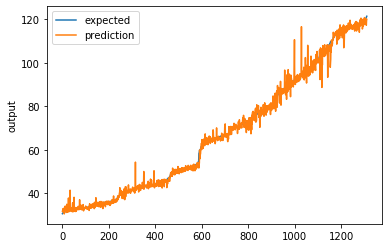

In [ ]:
for i in range(2):
    model = Sequential()
    model.add(Dense(60, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(30, activation='relu')) # Hidden 3
    model.add(Dense(10, activation='relu')) # Hidden 2
    model.add(Dense(1, activation='relu'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer = "adam")
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size= 128, callbacks=[monitor,checkpointer_relu],verbose=2,epochs=10)
model.load_weights('./best_weights_relu_2l.hdf5')
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
chart_regression(pred.flatten(),y_test)

## 3 layers(relu), and adam

In [ ]:
# set up checkpoinAter
checkpointer_relu = ModelCheckpoint(filepath="./best_weights_relu_sgd3l.hdf5", verbose=1, save_best_only=True)

In [ ]:
for i in range(2):
    print(i)
    
    # Build network
    model_relu = Sequential()

    model_relu.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))  
    model_relu.add(Dense(30, activation='relu')) # Hidden 2
    model_relu.add(Dense(10, activation='relu')) # Hidden 3
    model_relu.add(Dense(1)) # Output
    
    sgd = optimizers.SGD(lr=0.01, decay=0.0, clipvalue=0.5, clipnorm=1.)
    
    
    model_relu.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_relu.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_relu],verbose=2,epochs=10) 
    
print('Training finished...Loading the best model') 
print()
model_relu.load_weights('./best_weights_relu_sgd3l.hdf5')

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 36s - loss: 333.6607 - val_loss: 5173.1416

Epoch 00001: val_loss improved from inf to 5173.14162, saving model to ./best_weights_relu_sgd3l.hdf5
Epoch 2/10
 - 2s - loss: 300.9950 - val_loss: 5076.3797

Epoch 00002: val_loss improved from 5173.14162 to 5076.37974, saving model to ./best_weights_relu_sgd3l.hdf5
Epoch 3/10
 - 2s - loss: 284.5553 - val_loss: 5004.9060

Epoch 00003: val_loss improved from 5076.37974 to 5004.90597, saving model to ./best_weights_relu_sgd3l.hdf5
Epoch 4/10
 - 2s - loss: 271.5845 - val_loss: 4940.9117

Epoch 00004: val_loss improved from 5004.90597 to 4940.91174, saving model to ./best_weights_relu_sgd3l.hdf5
Epoch 5/10
 - 2s - loss: 259.1608 - val_loss: 4862.2868

Epoch 00005: val_loss improved from 4940.91174 to 4862.28685, saving model to ./best_weights_relu_sgd3l.hdf5
Epoch 6/10
 - 3s - loss: 243.3568 - val_loss: 4775.2424

Epoch 00006: val_loss improved from 4862.28685 to 4775.24242, saving 

Final score (RMSE): 420.95420432354916
R2 score: -229.10


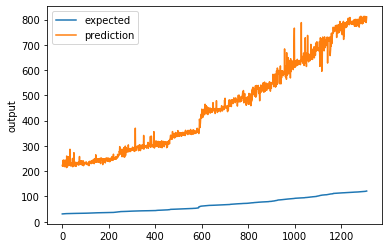

In [ ]:
pred_relu_3do = model_relu.predict(x_test)
# Measure RMSE error.  RMSE is common for regression.
score_relu_3do = np.sqrt(mean_squared_error(y_test,pred_relu_3do))
#Regression lift Chart
chart_regression(pred_relu_3do.flatten(),y_test)

## CNN

In [ ]:
def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)].values
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
path = r"C:\Users\koush\Downloads\CSC 215\Assignment 2"
preprocess = True

filename_read = os.path.join(path,"CSC215_P2_Stock_Price.csv")
data_set = pd.read_csv(filename_read,na_values=['NA','?'])
data_set.drop(['Date','Adj_Close'], axis = 1, inplace = True)
close_set = data_set['Close']

In [ ]:
close_set

0         4.125000
1         4.015625
2         4.000000
3         3.843750
4         3.390625
5         3.437500
6         3.500000
7         3.484375
8         3.578125
9         3.609375
10        3.640625
11        3.578125
12        3.578125
13        3.613275
14        3.609375
15        3.562500
16        3.515625
17        3.593750
18        3.656250
19        3.562500
20        3.765625
21        3.828125
22        3.703125
23        3.750000
24        3.687500
25        3.640625
26        3.562500
27        3.687500
28        3.781250
29        3.812500
           ...    
4362    115.510002
4363    115.180000
4364    115.269997
4365    114.239998
4366    116.449997
4367    116.190002
4368    116.480003
4369    116.160004
4370    116.260002
4371    114.129997
4372    114.500000
4373    115.639999
4374    114.830002
4375    115.570000
4376    113.570000
4377    113.110001
4378    114.220001
4379    114.220001
4380    112.709999
4381    112.750000
4382    111.760002
4383    113.

In [ ]:
encode_numeric_zscore(data_set, 'Open', mean=None, sd=None)
encode_numeric_zscore(data_set, 'High', mean=None, sd=None)
encode_numeric_zscore(data_set, 'Low', mean=None, sd=None)
encode_numeric_zscore(data_set, 'Volume', mean=None, sd=None)

In [ ]:
percent70 = int(len(data_set)* 0.70)
percent30 = len(data_set) - percent70

train = data_set[0:percent70]
test = data_set[percent70:len(data_set)]
train_close = close_set[0:percent70].values
test_close = close_set[percent70:len(close_set)].values

print("Shape of X_Train: ", train.shape)
print("Shape of Y_Train: ", train_close.shape)
print("Shape of X_Test: ", test.shape)
print("Shape of Y_Test: ", test_close.shape)

Shape of X_Train:  (3074, 5)
Shape of Y_Train:  (3074,)
Shape of X_Test:  (1318, 5)
Shape of Y_Test:  (1318,)


In [ ]:
SEQUENCE_SIZE = 7

x_train,y_train = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [ ]:
#x,y = to_sequences(7,data_set,close_set["Close"])

In [ ]:
x_train.shape

(3066, 7, 1, 5)

In [ ]:
y_train.shape

(3066,)

In [ ]:
x_train_cnn = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test_cnn = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

print("Shape of x_train: {}".format(x_train_cnn.shape))
print("Shape of x_test: {}".format(x_test_cnn.shape))
print("Shape of y_train: {}".format(y_train_cnn.shape))
print("Shape of y_test: {}".format(y_test_cnn.shape))

Shape of x_train: (3066, 7, 5)
Shape of x_test: (1310, 7, 5)
Shape of y_train: (3068,)
Shape of y_test: (1316,)


In [ ]:
data_rows, data_cols, data_channels = 1,7,5
x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], data_rows, data_cols, data_channels)
x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], data_rows, data_cols,data_channels)

print("4D Shape")
print("Shape of X_Train: ", x_train_cnn.shape)
print("Shape of Y_Train: ", y_train.shape)
print("Shape of X_Test: ", x_test_cnn.shape)
print("Shape of Y_Test: ", y_test.shape)
input_shape = (data_rows, data_cols, data_channels)

4D Shape
Shape of X_Train:  (3066, 1, 7, 5)
Shape of Y_Train:  (3066,)
Shape of X_Test:  (1310, 1, 7, 5)
Shape of Y_Test:  (1310,)


### Adam and relu with Checkpointer, Early stopping and 1 Dense Layer

In [ ]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_stock_cnn_es.hdf5", verbose=1, save_best_only=True)


In [ ]:
for i in range(5):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None))
    model_cnn.add(Dropout(0.25))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train, 
            batch_size=128, 
            callbacks=[monitor,checkpointer_cnn], 
            epochs=100, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test))
print('Loading the best model') 
print()
model_cnn.load_weights('./best_weights_stock_cnn_es.hdf5')


0
Train on 3066 samples, validate on 1310 samples
Epoch 1/100
 - 37s - loss: 100.9984 - val_loss: 31.2946

Epoch 00001: val_loss improved from inf to 31.29461, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 2/100
 - 1s - loss: 9.1348 - val_loss: 42.2867

Epoch 00002: val_loss did not improve from 31.29461
Epoch 3/100
 - 1s - loss: 5.3661 - val_loss: 6.2978

Epoch 00003: val_loss improved from 31.29461 to 6.29781, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 4/100
 - 1s - loss: 4.7639 - val_loss: 8.7893

Epoch 00004: val_loss did not improve from 6.29781
Epoch 5/100
 - 1s - loss: 4.6444 - val_loss: 10.6944

Epoch 00005: val_loss did not improve from 6.29781
Epoch 6/100
 - 1s - loss: 4.2587 - val_loss: 7.9581

Epoch 00006: val_loss did not improve from 6.29781
Epoch 7/100
 - 1s - loss: 4.0384 - val_loss: 6.8657

Epoch 00007: val_loss did not improve from 6.29781
Epoch 8/100
 - 1s - loss: 3.6473 - val_loss: 9.1557

Epoch 00008: val_loss did not improve from 6.29781
Epoch


Epoch 00020: val_loss improved from 4.44003 to 4.13104, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 21/100
 - 1s - loss: 2.1327 - val_loss: 4.3533

Epoch 00021: val_loss did not improve from 4.13104
Epoch 22/100
 - 1s - loss: 2.1700 - val_loss: 4.1058

Epoch 00022: val_loss improved from 4.13104 to 4.10577, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 23/100
 - 1s - loss: 2.0707 - val_loss: 3.9551

Epoch 00023: val_loss improved from 4.10577 to 3.95511, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 24/100
 - 1s - loss: 2.2497 - val_loss: 4.2215

Epoch 00024: val_loss did not improve from 3.95511
Epoch 25/100
 - 1s - loss: 2.0694 - val_loss: 3.7485

Epoch 00025: val_loss improved from 3.95511 to 3.74848, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 26/100
 - 1s - loss: 2.1117 - val_loss: 4.9364

Epoch 00026: val_loss did not improve from 3.74848
Epoch 27/100
 - 1s - loss: 1.9507 - val_loss: 11.0337

Epoch 00027: val_loss did not improve from 3.74

In [ ]:
pred_cnn = model_cnn.predict(x_test_cnn)
pred_cnn.flatten()

array([ 50.33947 ,  50.83722 ,  51.19181 , ..., 113.4431  , 113.321396,
       112.67964 ], dtype=float32)

In [ ]:
score_cnn= np.sqrt(mean_squared_error(pred_cnn,y_test))
print("Score (RMSE): {}".format(score_cnn))
score_cnn_r2= r2_score(pred_cnn,y_test)
print("Score (R2): {}".format(score_cnn_r2))

Score (RMSE): 1.8832635774543687
Score (R2): 0.9953575383012205


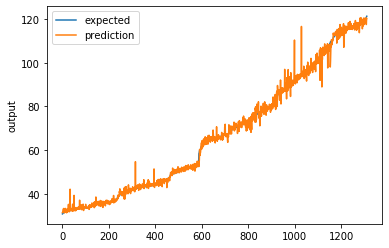

In [ ]:
chart_regression(pred_cnn.flatten(),y_test)

### adam and relu with EarlyStopping and CheckPointer.

In [ ]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_koushik.hdf5", verbose=1, save_best_only=True)


In [ ]:
for i in range(2):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None))
    model_cnn.add(Dropout(0.25))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(30, activation='relu'))
    #model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train, 
            batch_size=128, 
            callbacks=[monitor,checkpointer_cnn], 
            epochs=100, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test))
print('Loading the best model') 
print()
model_cnn.load_weights('./best_weights_koushik.hdf5')


0
Train on 3066 samples, validate on 1310 samples
Epoch 1/100
 - 34s - loss: 166.6568 - val_loss: 88.0853

Epoch 00001: val_loss improved from inf to 88.08531, saving model to ./best_weights_koushik.hdf5
Epoch 2/100
 - 1s - loss: 12.4771 - val_loss: 53.1727

Epoch 00002: val_loss improved from 88.08531 to 53.17269, saving model to ./best_weights_koushik.hdf5
Epoch 3/100
 - 1s - loss: 7.0879 - val_loss: 5.9920

Epoch 00003: val_loss improved from 53.17269 to 5.99196, saving model to ./best_weights_koushik.hdf5
Epoch 4/100
 - 1s - loss: 6.3690 - val_loss: 7.3347

Epoch 00004: val_loss did not improve from 5.99196
Epoch 5/100
 - 1s - loss: 5.4580 - val_loss: 6.7432

Epoch 00005: val_loss did not improve from 5.99196
Epoch 6/100
 - 1s - loss: 6.0051 - val_loss: 8.1006

Epoch 00006: val_loss did not improve from 5.99196
Epoch 7/100
 - 1s - loss: 5.1387 - val_loss: 5.6210

Epoch 00007: val_loss improved from 5.99196 to 5.62095, saving model to ./best_weights_koushik.hdf5
Epoch 8/100
 - 1s - 

Score (RMSE): 2.1278769600885066


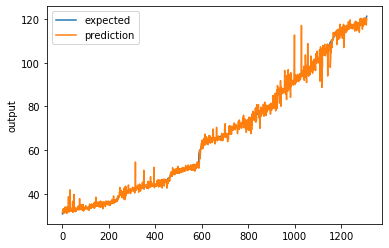

In [ ]:
pred_cnn = model_cnn.predict(x_test_cnn)
pred_cnn.flatten()
score_cnn= np.sqrt(mean_squared_error(pred_cnn,y_test))
print("Score (RMSE): {}".format(score_cnn))
chart_regression(pred_cnn.flatten(),y_test)

### 1 Convolution layer and kernel size (1,3) with adam and relu

In [ ]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_koushik_con1.hdf5", verbose=1, save_best_only=True)


In [ ]:
for i in range(2):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    #model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=None))
    model_cnn.add(Dropout(0.25))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(30, activation='relu'))
    #model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train, 
            batch_size=128, 
            callbacks=[monitor,checkpointer_cnn], 
            epochs=100, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test))
print('Loading the best model') 
print()
model_cnn.load_weights('./best_weights_koushik_con1.hdf5')


0
Train on 3066 samples, validate on 1310 samples
Epoch 1/100
 - 38s - loss: 111.7144 - val_loss: 80.7370

Epoch 00001: val_loss improved from inf to 80.73702, saving model to ./best_weights_koushik_con1.hdf5
Epoch 2/100
 - 2s - loss: 15.2616 - val_loss: 7.2990

Epoch 00002: val_loss improved from 80.73702 to 7.29897, saving model to ./best_weights_koushik_con1.hdf5
Epoch 3/100
 - 2s - loss: 11.2610 - val_loss: 14.1005

Epoch 00003: val_loss did not improve from 7.29897
Epoch 4/100
 - 1s - loss: 10.8745 - val_loss: 7.2358

Epoch 00004: val_loss improved from 7.29897 to 7.23580, saving model to ./best_weights_koushik_con1.hdf5
Epoch 5/100
 - 1s - loss: 11.0181 - val_loss: 5.8651

Epoch 00005: val_loss improved from 7.23580 to 5.86512, saving model to ./best_weights_koushik_con1.hdf5
Epoch 6/100
 - 1s - loss: 10.1470 - val_loss: 5.8349

Epoch 00006: val_loss improved from 5.86512 to 5.83489, saving model to ./best_weights_koushik_con1.hdf5
Epoch 7/100
 - 1s - loss: 8.4317 - val_loss: 6.8

Score (RMSE): 2.415550773637411


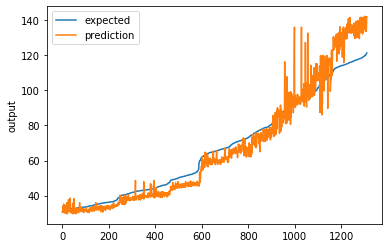

In [ ]:
pred_cnn = model_cnn.predict(x_test_cnn)
pred_cnn.flatten()
score_cnn= np.sqrt(mean_squared_error(pred_cnn,y_test))
print("Score (RMSE): {}".format(score_cnn))
score_cnn_r2= r2_score(pred_cnn,y_test)
chart_regression(pred.flatten(),y_test)

## LSTM

In [ ]:
def to_sequences(seq_size, data, label):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        print(i)
        window = data[i:(i+seq_size)]
        after_window = label[i+seq_size]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
data_set = pd.read_csv(r'C:\Users\koush\Downloads\CSC 215\Assignment 2\CSC215_P2_Stock_Price.csv', sep=',')
data_set.drop("Date",axis = 1,inplace = True)
data_set.drop("Adj_Close",axis = 1,inplace = True)
close_lstm = data_set['Close']

In [ ]:
close_lstm

0         4.125000
1         4.015625
2         4.000000
3         3.843750
4         3.390625
5         3.437500
6         3.500000
7         3.484375
8         3.578125
9         3.609375
10        3.640625
11        3.578125
12        3.578125
13        3.613275
14        3.609375
15        3.562500
16        3.515625
17        3.593750
18        3.656250
19        3.562500
20        3.765625
21        3.828125
22        3.703125
23        3.750000
24        3.687500
25        3.640625
26        3.562500
27        3.687500
28        3.781250
29        3.812500
           ...    
4362    115.510002
4363    115.180000
4364    115.269997
4365    114.239998
4366    116.449997
4367    116.190002
4368    116.480003
4369    116.160004
4370    116.260002
4371    114.129997
4372    114.500000
4373    115.639999
4374    114.830002
4375    115.570000
4376    113.570000
4377    113.110001
4378    114.220001
4379    114.220001
4380    112.709999
4381    112.750000
4382    111.760002
4383    113.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data_set = scaler.fit_transform(data_set)
data_set

array([[0.00437775, 0.00646865, 0.00693437, 0.00740835, 0.075401  ],
       [0.00703093, 0.00620462, 0.00853461, 0.0064823 , 0.01919424],
       [0.00596966, 0.00541254, 0.00813455, 0.00635001, 0.00533943],
       ...,
       [0.92316384, 0.92176368, 0.91533671, 0.9226992 , 0.04210747],
       [0.92681462, 0.92522774, 0.93027227, 0.92363047, 0.02295866],
       [0.92545622, 0.94119605, 0.93035763, 0.9308272 , 0.03074929]])

In [ ]:
split_70 = int(len(data_set)* 0.70)
split_30 = len(data_set) - split_70
print(split_70)
print(split_30)

3074
1318


In [ ]:
train = data_set[0:split_70]
test = data_set[split_70:len(data_set)]
train_close = close_lstm[0:split_70].values
test_close = close_lstm[split_70:len(data_set)].values

In [ ]:
test.shape

(1318, 5)

In [ ]:
train_close.shape

(3074,)

In [ ]:
x_train,y_train = to_sequences(7,train,train_close)
x_test,y_test = to_sequences(7,test,test_close)

0
[[0.00437775 0.00646865 0.00693437 0.00740835 0.075401  ]
 [0.00703093 0.00620462 0.00853461 0.0064823  0.01919424]
 [0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
 [0.00596966 0.00514851 0.00720108 0.00502709 0.03663175]
 [0.00371445 0.00290429 0.00333383 0.00119063 0.16747797]
 [0.00172457 0.00264026 0.00373389 0.0015875  0.24439339]
 [0.00198989 0.00158416 0.00080012 0.00211667 0.28009052]] - 3.484375
1
[[0.00703093 0.00620462 0.00853461 0.0064823  0.01919424]
 [0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
 [0.00596966 0.00514851 0.00720108 0.00502709 0.03663175]
 [0.00371445 0.00290429 0.00333383 0.00119063 0.16747797]
 [0.00172457 0.00264026 0.00373389 0.0015875  0.24439339]
 [0.00198989 0.00158416 0.00080012 0.00211667 0.28009052]
 [0.00145925 0.00145215 0.00386724 0.00198438 0.13325199]] - 3.578125
2
[[0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
 [0.00596966 0.00514851 0.00720108 0.00502709 0.03663175]
 [0.00371445 0.00290429 0.00333383 0.00119

41
[[0.0051737  0.00673267 0.00773449 0.00727606 0.04489618]
 [0.00663295 0.00858086 0.00920137 0.00912814 0.06111349]
 [0.00902082 0.00963696 0.01133503 0.01058335 0.0455106 ]
 [0.01021475 0.01320132 0.01280191 0.01428753 0.07828273]
 [0.0139292  0.01491749 0.0165358  0.01547816 0.06640965]
 [0.0145925  0.01412541 0.01573568 0.01455211 0.02701732]
 [0.01419452 0.01386139 0.01400209 0.0130969  0.02461155]] - 4.53125
42
[[0.00663295 0.00858086 0.00920137 0.00912814 0.06111349]
 [0.00902082 0.00963696 0.01133503 0.01058335 0.0455106 ]
 [0.01021475 0.01320132 0.01280191 0.01428753 0.07828273]
 [0.0139292  0.01491749 0.0165358  0.01547816 0.06640965]
 [0.0145925  0.01412541 0.01573568 0.01455211 0.02701732]
 [0.01419452 0.01386139 0.01400209 0.0130969  0.02461155]
 [0.01220463 0.01135314 0.01293527 0.01084794 0.03942694]] - 4.28125
43
[[0.00902082 0.00963696 0.01133503 0.01058335 0.0455106 ]
 [0.01021475 0.01320132 0.01280191 0.01428753 0.07828273]
 [0.0139292  0.01491749 0.0165358  0.0154

 [0.02493991 0.0240264  0.02667065 0.02487088 0.01526539]] - 6.125
77
[[0.02122545 0.02046205 0.0225367  0.02076983 0.01895193]
 [0.02135811 0.0220462  0.02400358 0.0230188  0.03458944]
 [0.02321534 0.02521452 0.02560382 0.02368026 0.03702117]
 [0.02374597 0.02310231 0.02507041 0.02341567 0.01176924]
 [0.02281736 0.02415842 0.0248037  0.02513547 0.02901636]
 [0.02493991 0.0240264  0.02667065 0.02487088 0.01526539]
 [0.02454193 0.02415842 0.02667065 0.02434172 0.01602693]] - 5.984375
78
[[0.02135811 0.0220462  0.02400358 0.0230188  0.03458944]
 [0.02321534 0.02521452 0.02560382 0.02368026 0.03702117]
 [0.02374597 0.02310231 0.02507041 0.02341567 0.01176924]
 [0.02281736 0.02415842 0.0248037  0.02513547 0.02901636]
 [0.02493991 0.0240264  0.02667065 0.02487088 0.01526539]
 [0.02454193 0.02415842 0.02667065 0.02434172 0.01602693]
 [0.02401129 0.02310231 0.02493706 0.02315109 0.01446924]] - 5.875
79
[[0.02321534 0.02521452 0.02560382 0.02368026 0.03702117]
 [0.02374597 0.02310231 0.0250704

 [0.01538845 0.01623762 0.01800269 0.01693337 0.0305654 ]] - 5.453125
124
[[0.01445984 0.01438944 0.0165358  0.01455211 0.03167309]
 [0.01366388 0.01412541 0.01573568 0.01534586 0.00937212]
 [0.0145925  0.01478548 0.01720257 0.01574274 0.01080001]
 [0.01499047 0.01518152 0.01746928 0.01613962 0.0217904 ]
 [0.01538845 0.01610561 0.01800269 0.01587503 0.03144809]
 [0.01538845 0.01623762 0.01800269 0.01693337 0.0305654 ]
 [0.01658238 0.01808581 0.01840275 0.01865316 0.02133174]] - 5.046875
125
[[0.01366388 0.01412541 0.01573568 0.01534586 0.00937212]
 [0.0145925  0.01478548 0.01720257 0.01574274 0.01080001]
 [0.01499047 0.01518152 0.01746928 0.01613962 0.0217904 ]
 [0.01538845 0.01610561 0.01800269 0.01587503 0.03144809]
 [0.01538845 0.01623762 0.01800269 0.01693337 0.0305654 ]
 [0.01658238 0.01808581 0.01840275 0.01865316 0.02133174]
 [0.01790897 0.01729373 0.01746928 0.01521357 0.01343943]] - 5.03125
126
[[0.0145925  0.01478548 0.01720257 0.01574274 0.01080001]
 [0.01499047 0.01518152 0

171
[[0.005837   0.00567657 0.00800119 0.0064823  0.03968656]
 [0.00610232 0.00594059 0.0082679  0.0066146  0.01181251]
 [0.00623498 0.00567657 0.00733443 0.0064823  0.02757117]
 [0.00596966 0.00607261 0.00853461 0.00727606 0.00966635]
 [0.00663295 0.00580858 0.0082679  0.00608543 0.01727309]
 [0.00570434 0.00620462 0.0082679  0.00701147 0.01196827]
 [0.00623498 0.00607261 0.00800119 0.00608543 0.01934136]] - 4.015625
172
[[0.00610232 0.00594059 0.0082679  0.0066146  0.01181251]
 [0.00623498 0.00567657 0.00733443 0.0064823  0.02757117]
 [0.00596966 0.00607261 0.00853461 0.00727606 0.00966635]
 [0.00663295 0.00580858 0.0082679  0.00608543 0.01727309]
 [0.00570434 0.00620462 0.0082679  0.00701147 0.01196827]
 [0.00623498 0.00607261 0.00800119 0.00608543 0.01934136]
 [0.00596966 0.00567657 0.0082679  0.0064823  0.01106827]] - 4.21875
173
[[0.00623498 0.00567657 0.00733443 0.0064823  0.02757117]
 [0.00596966 0.00607261 0.00853461 0.00727606 0.00966635]
 [0.00663295 0.00580858 0.0082679  0.

216
[[0.01085151 0.01042904 0.01269523 0.01164169 0.01152693]
 [0.01106377 0.01021782 0.01265256 0.01045635 0.00728654]
 [0.01021475 0.00937294 0.01096697 0.00903818 0.00793558]
 [0.01021475 0.01190759 0.01280191 0.01164169 0.03445098]
 [0.01148828 0.0120132  0.0140821  0.01257303 0.00463846]
 [0.01286793 0.0129637  0.01529828 0.01365253 0.02385001]
 [0.01339857 0.01714587 0.01600239 0.0179917  0.0252952 ]] - 5.035
217
[[0.01106377 0.01021782 0.01265256 0.01045635 0.00728654]
 [0.01021475 0.00937294 0.01096697 0.00903818 0.00793558]
 [0.01021475 0.01190759 0.01280191 0.01164169 0.03445098]
 [0.01148828 0.0120132  0.0140821  0.01257303 0.00463846]
 [0.01286793 0.0129637  0.01529828 0.01365253 0.02385001]
 [0.01339857 0.01714587 0.01600239 0.0179917  0.0252952 ]
 [0.01658238 0.01666007 0.01706922 0.01511303 0.01080866]] - 5.05
218
[[0.01021475 0.00937294 0.01096697 0.00903818 0.00793558]
 [0.01021475 0.01190759 0.01280191 0.01164169 0.03445098]
 [0.01148828 0.0120132  0.0140821  0.012573

[[0.0127618  0.01292145 0.01536229 0.01344086 0.00752885]
 [0.01329244 0.01275248 0.01499957 0.01299636 0.00694039]
 [0.01254955 0.01211881 0.01504225 0.01301753 0.00629135]
 [0.01265568 0.01328053 0.01497824 0.0144992  0.00675866]
 [0.01361082 0.01359736 0.01557566 0.01452036 0.01201154]
 [0.01437494 0.01351287 0.01604506 0.01380069 0.01377693]
 [0.01339857 0.01256238 0.01568234 0.01354669 0.01503174]] - 4.8
240
[[0.01329244 0.01275248 0.01499957 0.01299636 0.00694039]
 [0.01254955 0.01211881 0.01504225 0.01301753 0.00629135]
 [0.01265568 0.01328053 0.01497824 0.0144992  0.00675866]
 [0.01361082 0.01359736 0.01557566 0.01452036 0.01201154]
 [0.01437494 0.01351287 0.01604506 0.01380069 0.01377693]
 [0.01339857 0.01256238 0.01568234 0.01354669 0.01503174]
 [0.01318631 0.01233003 0.01493556 0.01312336 0.00297692]] - 4.66
241
[[0.01254955 0.01211881 0.01504225 0.01301753 0.00629135]
 [0.01265568 0.01328053 0.01497824 0.0144992  0.00675866]
 [0.01361082 0.01359736 0.01557566 0.01452036 0.0

[[0.01074538 0.01047129 0.01307929 0.01159936 0.00947597]
 [0.01148828 0.01112607 0.01329265 0.01195919 0.00986539]
 [0.01161563 0.01203432 0.0140821  0.01291169 0.00848943]
 [0.01233729 0.0125835  0.01440215 0.01270003 0.02863559]
 [0.01223117 0.01575182 0.01482888 0.0148167  0.05931349]
 [0.0139292  0.01359736 0.01632244 0.01477436 0.01821635]
 [0.01469332 0.0138297  0.01696253 0.0148167  0.00957981]] - 4.9875
265
[[0.01148828 0.01112607 0.01329265 0.01195919 0.00986539]
 [0.01161563 0.01203432 0.0140821  0.01291169 0.00848943]
 [0.01233729 0.0125835  0.01440215 0.01270003 0.02863559]
 [0.01223117 0.01575182 0.01482888 0.0148167  0.05931349]
 [0.0139292  0.01359736 0.01632244 0.01477436 0.01821635]
 [0.01469332 0.0138297  0.01696253 0.0148167  0.00957981]
 [0.01445984 0.01370297 0.01664249 0.01471086 0.01184712]] - 4.94
266
[[0.01161563 0.01203432 0.0140821  0.01291169 0.00848943]
 [0.01233729 0.0125835  0.01440215 0.01270003 0.02863559]
 [0.01223117 0.01575182 0.01482888 0.0148167  

 [0.02749227 0.02656634 0.02876163 0.02641605 0.00121154]] - 6.6075
317
[[0.0256032  0.02563696 0.02805752 0.02645839 0.00918174]
 [0.02613384 0.02711551 0.02805752 0.02827872 0.05957311]
 [0.02795923 0.02859406 0.02997781 0.02815172 0.02382405]
 [0.027938   0.02743234 0.03040454 0.02804589 0.00077019]
 [0.02772575 0.02891089 0.02987113 0.02781306 0.01082597]
 [0.02749227 0.02656634 0.02876163 0.02641605 0.00121154]
 [0.02662202 0.02722112 0.0288043  0.02842689 0.00614423]] - 6.655
318
[[0.02613384 0.02711551 0.02805752 0.02827872 0.05957311]
 [0.02795923 0.02859406 0.02997781 0.02815172 0.02382405]
 [0.027938   0.02743234 0.03040454 0.02804589 0.00077019]
 [0.02772575 0.02891089 0.02987113 0.02781306 0.01082597]
 [0.02749227 0.02656634 0.02876163 0.02641605 0.00121154]
 [0.02662202 0.02722112 0.0288043  0.02842689 0.00614423]
 [0.02804413 0.02774917 0.03004182 0.02882906 0.00990866]] - 6.66
319
[[0.02795923 0.02859406 0.02997781 0.02815172 0.02382405]
 [0.027938   0.02743234 0.0304045

 [0.02719511 0.02648185 0.02976445 0.02755905 0.0180952 ]] - 6.5
359
[[0.02634609 0.02563696 0.02803619 0.02569638 0.00584135]
 [0.0256032  0.02669307 0.02814287 0.02772839 0.0124702 ]
 [0.02719511 0.02732673 0.02976445 0.02810939 0.01371635]
 [0.02753472 0.02753795 0.02993514 0.02813056 0.00795289]
 [0.02772575 0.02703102 0.02965776 0.02751672 0.01488462]
 [0.02719511 0.02648185 0.02976445 0.02755905 0.0180952 ]
 [0.02721633 0.02648185 0.02955108 0.02751672 0.01648558]] - 6.515
360
[[0.0256032  0.02669307 0.02814287 0.02772839 0.0124702 ]
 [0.02719511 0.02732673 0.02976445 0.02810939 0.01371635]
 [0.02753472 0.02753795 0.02993514 0.02813056 0.00795289]
 [0.02772575 0.02703102 0.02965776 0.02751672 0.01488462]
 [0.02719511 0.02648185 0.02976445 0.02755905 0.0180952 ]
 [0.02721633 0.02648185 0.02955108 0.02751672 0.01648558]
 [0.02721633 0.02648185 0.02869762 0.02764372 0.00973558]] - 6.4125
361
[[0.02719511 0.02732673 0.02976445 0.02810939 0.01371635]
 [0.02753472 0.02753795 0.02993514

388
[[0.02399007 0.02310231 0.02553981 0.02347388 0.02961348]
 [0.02314105 0.02352475 0.02571051 0.02476505 0.01954039]
 [0.0244358  0.02447525 0.02696936 0.02465922 0.01796539]
 [0.02422355 0.02439076 0.02628659 0.02556938 0.01727309]
 [0.02528482 0.02711551 0.02788683 0.02806706 0.01631251]
 [0.02774697 0.02732673 0.0294444  0.02755905 0.0089827 ]
 [0.02698285 0.02764356 0.02965776 0.02825756 0.01461635]] - 6.575
389
[[0.02314105 0.02352475 0.02571051 0.02476505 0.01954039]
 [0.0244358  0.02447525 0.02696936 0.02465922 0.01796539]
 [0.02422355 0.02439076 0.02628659 0.02556938 0.01727309]
 [0.02528482 0.02711551 0.02788683 0.02806706 0.01631251]
 [0.02774697 0.02732673 0.0294444  0.02755905 0.0089827 ]
 [0.02698285 0.02764356 0.02965776 0.02825756 0.01461635]
 [0.027938   0.02724224 0.02997781 0.02815172 0.01164808]] - 6.725
390
[[0.0244358  0.02447525 0.02696936 0.02465922 0.01796539]
 [0.02422355 0.02439076 0.02628659 0.02556938 0.01727309]
 [0.02528482 0.02711551 0.02788683 0.02806

421
[[0.02662202 0.02599604 0.02827089 0.02592922 0.01461635]
 [0.0255183  0.0250033  0.02539046 0.02427822 0.02148751]
 [0.02401129 0.02578482 0.02652129 0.02656422 0.00925962]
 [0.02613384 0.02616502 0.02752411 0.02628905 0.01902982]
 [0.02581545 0.02603828 0.02837757 0.02671239 0.00900866]
 [0.02634609 0.02660858 0.02901767 0.02715689 0.01599232]
 [0.0267706  0.02586931 0.02645728 0.02472272 0.0165202 ]] - 6.5125
422
[[0.0255183  0.0250033  0.02539046 0.02427822 0.02148751]
 [0.02401129 0.02578482 0.02652129 0.02656422 0.00925962]
 [0.02613384 0.02616502 0.02752411 0.02628905 0.01902982]
 [0.02581545 0.02603828 0.02837757 0.02671239 0.00900866]
 [0.02634609 0.02660858 0.02901767 0.02715689 0.01599232]
 [0.0267706  0.02586931 0.02645728 0.02472272 0.0165202 ]
 [0.02492399 0.02637624 0.02731075 0.02762256 0.02276828]] - 6.62
423
[[0.02401129 0.02578482 0.02652129 0.02656422 0.00925962]
 [0.02613384 0.02616502 0.02752411 0.02628905 0.01902982]
 [0.02581545 0.02603828 0.02837757 0.02671

464
[[0.03037893 0.02954455 0.02773748 0.02677589 0.03903752]
 [0.02647344 0.02810825 0.02869762 0.02637372 0.08319812]
 [0.02825638 0.03148779 0.03051122 0.03175006 0.05273656]
 [0.03101569 0.03176238 0.0337117  0.03257556 0.02324424]
 [0.0326076  0.03387459 0.03509858 0.03386673 0.04178079]
 [0.03356274 0.03372673 0.03552531 0.03498857 0.04319137]
 [0.03441176 0.03345215 0.0337117  0.03175006 0.02198943]] - 7.075
465
[[0.02647344 0.02810825 0.02869762 0.02637372 0.08319812]
 [0.02825638 0.03148779 0.03051122 0.03175006 0.05273656]
 [0.03101569 0.03176238 0.0337117  0.03257556 0.02324424]
 [0.0326076  0.03387459 0.03509858 0.03386673 0.04178079]
 [0.03356274 0.03372673 0.03552531 0.03498857 0.04319137]
 [0.03441176 0.03345215 0.0337117  0.03175006 0.02198943]
 [0.0314402  0.03165677 0.03401041 0.03238506 0.02140963]] - 7.1
466
[[0.02825638 0.03148779 0.03051122 0.03175006 0.05273656]
 [0.03101569 0.03176238 0.0337117  0.03257556 0.02324424]
 [0.0326076  0.03387459 0.03509858 0.0338667

 [0.02783187 0.02749571 0.0254118  0.02413005 0.12967795]] - 6.25
514
[[0.0314402  0.03049505 0.03170607 0.02942173 0.0182077 ]
 [0.02931765 0.02975578 0.03198344 0.03037423 0.01845001]
 [0.03006055 0.02912211 0.03157805 0.02921006 0.01232308]
 [0.0291054  0.0290165  0.03162072 0.02973923 0.02279424]
 [0.02952991 0.02859406 0.03155671 0.02923122 0.01232308]
 [0.02783187 0.02749571 0.0254118  0.02413005 0.12967795]
 [0.02379904 0.02496106 0.02645728 0.02540005 0.04537214]] - 6.285
515
[[0.02931765 0.02975578 0.03198344 0.03037423 0.01845001]
 [0.03006055 0.02912211 0.03157805 0.02921006 0.01232308]
 [0.0291054  0.0290165  0.03162072 0.02973923 0.02279424]
 [0.02952991 0.02859406 0.03155671 0.02923122 0.01232308]
 [0.02783187 0.02749571 0.0254118  0.02413005 0.12967795]
 [0.02379904 0.02496106 0.02645728 0.02540005 0.04537214]
 [0.02486031 0.02468647 0.02752411 0.02569638 0.03671829]] - 6.2
516
[[0.03006055 0.02912211 0.03157805 0.02921006 0.01232308]
 [0.0291054  0.0290165  0.03162072 0

570
[[0.01828042 0.01742046 0.01984296 0.0181187  0.02031059]
 [0.01819552 0.01813861 0.01992831 0.0176742  0.0258577 ]
 [0.01732527 0.01666007 0.01636511 0.01485903 0.03857021]
 [0.01450229 0.0136396  0.015597   0.01405469 0.06670388]
 [0.01382308 0.01581518 0.01642912 0.01644653 0.03172502]
 [0.01651871 0.01611089 0.01632244 0.0151342  0.04320002]
 [0.01479945 0.01663894 0.01674917 0.0169757  0.03896829]] - 5.425
571
[[0.01819552 0.01813861 0.01992831 0.0176742  0.0258577 ]
 [0.01732527 0.01666007 0.01636511 0.01485903 0.03857021]
 [0.01450229 0.0136396  0.015597   0.01405469 0.06670388]
 [0.01382308 0.01581518 0.01642912 0.01644653 0.03172502]
 [0.01651871 0.01611089 0.01632244 0.0151342  0.04320002]
 [0.01479945 0.01663894 0.01674917 0.0169757  0.03896829]
 [0.01700689 0.01729373 0.01952292 0.01841504 0.0387779 ]] - 5.25
572
[[0.01732527 0.01666007 0.01636511 0.01485903 0.03857021]
 [0.01450229 0.0136396  0.015597   0.01405469 0.06670388]
 [0.01382308 0.01581518 0.01642912 0.016446

 [0.02424477 0.02363036 0.02677733 0.02455338 0.01950578]] - 6.2375
617
[[0.02486031 0.02394719 0.02686268 0.02489205 0.00666346]
 [0.02486031 0.02394719 0.026756   0.02489205 0.01346539]
 [0.02456315 0.02373597 0.02705471 0.02480738 0.00792693]
 [0.02454193 0.02396832 0.02628659 0.02406655 0.00492404]
 [0.02369291 0.02363036 0.02545447 0.02459572 0.01286828]
 [0.02424477 0.02363036 0.02677733 0.02455338 0.01950578]
 [0.02528482 0.02436964 0.02709738 0.02529422 0.04666156]] - 6.205
618
[[0.02486031 0.02394719 0.026756   0.02489205 0.01346539]
 [0.02456315 0.02373597 0.02705471 0.02480738 0.00792693]
 [0.02454193 0.02396832 0.02628659 0.02406655 0.00492404]
 [0.02369291 0.02363036 0.02545447 0.02459572 0.01286828]
 [0.02424477 0.02363036 0.02677733 0.02455338 0.01950578]
 [0.02528482 0.02436964 0.02709738 0.02529422 0.04666156]
 [0.02496644 0.02415842 0.02709738 0.02501905 0.01973078]] - 6.1825
619
[[0.02456315 0.02373597 0.02705471 0.02480738 0.00792693]
 [0.02454193 0.02396832 0.02628

 [0.02761962 0.02690429 0.02824955 0.02667005 0.04893752]] - 6.375
668
[[0.03016667 0.02929109 0.03168473 0.03028956 0.01115481]
 [0.03016667 0.02922772 0.03121533 0.02963339 0.02725097]
 [0.02921153 0.02869967 0.03147137 0.02929473 0.02965675]
 [0.0290205  0.02838284 0.02955108 0.02827872 0.01339616]
 [0.02798045 0.02732673 0.0301485  0.02819406 0.00643846]
 [0.02761962 0.02690429 0.02824955 0.02667005 0.04893752]
 [0.02602771 0.02561584 0.02859094 0.02645839 0.01465962]] - 6.4375
669
[[0.03016667 0.02922772 0.03121533 0.02963339 0.02725097]
 [0.02921153 0.02869967 0.03147137 0.02929473 0.02965675]
 [0.0290205  0.02838284 0.02955108 0.02827872 0.01339616]
 [0.02798045 0.02732673 0.0301485  0.02819406 0.00643846]
 [0.02761962 0.02690429 0.02824955 0.02667005 0.04893752]
 [0.02602771 0.02561584 0.02859094 0.02645839 0.01465962]
 [0.02634609 0.02627063 0.02888965 0.02698755 0.01662405]] - 6.475
670
[[0.02921153 0.02869967 0.03147137 0.02929473 0.02965675]
 [0.0290205  0.02838284 0.029551

743
[[0.02751349 0.02762244 0.02984979 0.02791889 0.01420097]
 [0.02740736 0.02781254 0.02999915 0.02899839 0.01688366]
 [0.02846864 0.02753795 0.03004182 0.02791889 0.04058656]
 [0.02759839 0.02749571 0.02987113 0.02863856 0.02701732]
 [0.02804413 0.02772805 0.02989246 0.02897722 0.02829809]
 [0.02908417 0.02943894 0.03157805 0.03067056 0.03031444]
 [0.03016667 0.02933333 0.03083127 0.02931589 0.01877886]] - 6.8525
744
[[0.02740736 0.02781254 0.02999915 0.02899839 0.01688366]
 [0.02846864 0.02753795 0.03004182 0.02791889 0.04058656]
 [0.02759839 0.02749571 0.02987113 0.02863856 0.02701732]
 [0.02804413 0.02772805 0.02989246 0.02897722 0.02829809]
 [0.02908417 0.02943894 0.03157805 0.03067056 0.03031444]
 [0.03016667 0.02933333 0.03083127 0.02931589 0.01877886]
 [0.0291054  0.02924884 0.03157805 0.03050123 0.01976539]] - 6.755
745
[[0.02846864 0.02753795 0.03004182 0.02791889 0.04058656]
 [0.02759839 0.02749571 0.02987113 0.02863856 0.02701732]
 [0.02804413 0.02772805 0.02989246 0.0289

 [0.03063363 0.03011485 0.03302893 0.03119973 0.04110579]] - 7.1475
893
[[0.03504853 0.03444488 0.03733891 0.03545424 0.04300964]
 [0.03536691 0.03440264 0.0366348  0.03481924 0.03364617]
 [0.03451789 0.03408581 0.03669881 0.0343324  0.05071156]
 [0.02931765 0.03051617 0.03179141 0.03069173 0.2467905 ]
 [0.03014545 0.02986139 0.03270889 0.03094573 0.04239521]
 [0.03063363 0.03011485 0.03302893 0.03119973 0.04110579]
 [0.03080344 0.03191023 0.03339165 0.0329989  0.06985388]] - 7.2125
894
[[0.03536691 0.03440264 0.0366348  0.03481924 0.03364617]
 [0.03451789 0.03408581 0.03669881 0.0343324  0.05071156]
 [0.02931765 0.03051617 0.03179141 0.03069173 0.2467905 ]
 [0.03014545 0.02986139 0.03270889 0.03094573 0.04239521]
 [0.03063363 0.03011485 0.03302893 0.03119973 0.04110579]
 [0.03080344 0.03191023 0.03339165 0.0329989  0.06985388]
 [0.03271373 0.03267063 0.03541862 0.03354923 0.04802022]] - 7.245
895
[[0.03451789 0.03408581 0.03669881 0.0343324  0.05071156]
 [0.02931765 0.03051617 0.03179

926
[[0.0373621  0.03674719 0.0394939  0.03727457 0.0124702 ]
 [0.03698004 0.0361769  0.03878979 0.03687241 0.008325  ]
 [0.03630083 0.03535314 0.03797901 0.03564474 0.01499712]
 [0.03547304 0.03526865 0.03819237 0.0359199  0.01941059]
 [0.03594    0.03535314 0.03697619 0.0346499  0.03178559]
 [0.03328681 0.03480396 0.03563199 0.0347134  0.0478731 ]
 [0.03451789 0.0352264  0.03723223 0.03608924 0.03231348]] - 7.4975
927
[[0.03698004 0.0361769  0.03878979 0.03687241 0.008325  ]
 [0.03630083 0.03535314 0.03797901 0.03564474 0.01499712]
 [0.03547304 0.03526865 0.03819237 0.0359199  0.01941059]
 [0.03594    0.03535314 0.03697619 0.0346499  0.03178559]
 [0.03328681 0.03480396 0.03563199 0.0347134  0.0478731 ]
 [0.03451789 0.0352264  0.03723223 0.03608924 0.03231348]
 [0.03579142 0.03482508 0.03776564 0.03596224 0.0306779 ]] - 7.4825
928
[[0.03630083 0.03535314 0.03797901 0.03564474 0.01499712]
 [0.03547304 0.03526865 0.03819237 0.0359199  0.01941059]
 [0.03594    0.03535314 0.03697619 0.034

987
[[0.04184067 0.04084488 0.04384655 0.04191008 0.02127116]
 [0.04162842 0.04073927 0.04346249 0.04171958 0.03663175]
 [0.04131003 0.04031683 0.04320645 0.04083058 0.05684714]
 [0.04054592 0.03964092 0.042417   0.04000508 0.04950868]
 [0.03971813 0.03873267 0.0408381  0.03894674 0.06983657]
 [0.0386993  0.03784554 0.04075275 0.03831174 0.04467118]
 [0.03804131 0.03706403 0.0392592  0.03683007 0.07571254]] - 7.645
988
[[0.04162842 0.04073927 0.04346249 0.04171958 0.03663175]
 [0.04131003 0.04031683 0.04320645 0.04083058 0.05684714]
 [0.04054592 0.03964092 0.042417   0.04000508 0.04950868]
 [0.03971813 0.03873267 0.0408381  0.03894674 0.06983657]
 [0.0386993  0.03784554 0.04075275 0.03831174 0.04467118]
 [0.03804131 0.03706403 0.0392592  0.03683007 0.07571254]
 [0.03664043 0.03632475 0.03921652 0.03721107 0.0665308 ]] - 7.675
989
[[0.04131003 0.04031683 0.04320645 0.04083058 0.05684714]
 [0.04054592 0.03964092 0.042417   0.04000508 0.04950868]
 [0.03971813 0.03873267 0.0408381  0.03894

 [0.04640414 0.04606205 0.04809252 0.04707476 0.03057405]] - 8.7
1027
[[0.04451508 0.04553399 0.04728173 0.04677843 0.04622021]
 [0.0467862  0.04576634 0.04781514 0.04542376 0.01845866]
 [0.04527919 0.0447736  0.04758044 0.04572009 0.02125386]
 [0.045449   0.04519604 0.046855   0.04582592 0.03294521]
 [0.045449   0.04608317 0.04822054 0.04667259 0.04289714]
 [0.04640414 0.04606205 0.04809252 0.04707476 0.03057405]
 [0.04672252 0.04591419 0.04841256 0.04614343 0.02949232]] - 8.4525
1028
[[0.0467862  0.04576634 0.04781514 0.04542376 0.01845866]
 [0.04527919 0.0447736  0.04758044 0.04572009 0.02125386]
 [0.045449   0.04519604 0.046855   0.04582592 0.03294521]
 [0.045449   0.04608317 0.04822054 0.04667259 0.04289714]
 [0.04640414 0.04606205 0.04809252 0.04707476 0.03057405]
 [0.04672252 0.04591419 0.04841256 0.04614343 0.02949232]
 [0.04555512 0.04454125 0.04640693 0.04404792 0.02923271]] - 8.5375
1029
[[0.04527919 0.0447736  0.04758044 0.04572009 0.02125386]
 [0.045449   0.04519604 0.0468

[[0.0477838  0.04718152 0.04715371 0.04656676 0.20117606]
 [0.04629802 0.04591419 0.04903132 0.04669376 0.04711156]
 [0.04625556 0.04549175 0.04794316 0.04559309 0.04005002]
 [0.04510939 0.04576634 0.04787915 0.04682076 0.04268944]
 [0.04657395 0.04555512 0.04841256 0.04624926 0.0538356 ]
 [0.04614944 0.04517492 0.04717505 0.04480992 0.05213945]
 [0.04474856 0.04380198 0.04587352 0.04411142 0.06692022]] - 8.4125
1066
[[0.04629802 0.04591419 0.04903132 0.04669376 0.04711156]
 [0.04625556 0.04549175 0.04794316 0.04559309 0.04005002]
 [0.04510939 0.04576634 0.04787915 0.04682076 0.04268944]
 [0.04657395 0.04555512 0.04841256 0.04624926 0.0538356 ]
 [0.04614944 0.04517492 0.04717505 0.04480992 0.05213945]
 [0.04474856 0.04380198 0.04587352 0.04411142 0.06692022]
 [0.04392076 0.04304158 0.04572416 0.04370925 0.04859137]] - 8.495
1067
[[0.04625556 0.04549175 0.04794316 0.04559309 0.04005002]
 [0.04510939 0.04576634 0.04787915 0.04682076 0.04268944]
 [0.04657395 0.04555512 0.04841256 0.046249

 [0.04349626 0.04397096 0.0457455  0.04485226 0.01797405]] - 8.455
1093
[[0.04597963 0.04506931 0.04770846 0.04599526 0.02596155]
 [0.04576738 0.04481584 0.04706836 0.04474642 0.03721156]
 [0.04417547 0.04318944 0.04502006 0.04309542 0.03228752]
 [0.04268969 0.04217558 0.04489204 0.04258742 0.01217597]
 [0.04230763 0.04297822 0.0448707  0.04402675 0.04896349]
 [0.04349626 0.04397096 0.0457455  0.04485226 0.01797405]
 [0.0445363  0.04352739 0.04595886 0.04406909 0.01408847]] - 8.4075
1094
[[0.04576738 0.04481584 0.04706836 0.04474642 0.03721156]
 [0.04417547 0.04318944 0.04502006 0.04309542 0.03228752]
 [0.04268969 0.04217558 0.04489204 0.04258742 0.01217597]
 [0.04230763 0.04297822 0.0448707  0.04402675 0.04896349]
 [0.04349626 0.04397096 0.0457455  0.04485226 0.01797405]
 [0.0445363  0.04352739 0.04595886 0.04406909 0.01408847]
 [0.04396322 0.04306271 0.04593753 0.04366692 0.00636923]] - 8.4725
1095
[[0.04417547 0.04318944 0.04502006 0.04309542 0.03228752]
 [0.04268969 0.04217558 0.04

1131
[[0.04682865 0.0458297  0.04612956 0.04466176 0.11617794]
 [0.04470611 0.04490033 0.04585218 0.04341292 0.10527409]
 [0.04313542 0.04242904 0.04502006 0.04339175 0.10681447]
 [0.043284   0.04285149 0.04591619 0.04353992 0.07524523]
 [0.04368728 0.04308383 0.04615089 0.04406909 0.04628945]
 [0.04392076 0.04335842 0.04619357 0.04447126 0.06524138]
 [0.0443665  0.04373861 0.04672698 0.04464059 0.03125771]] - 8.4
1132
[[0.04470611 0.04490033 0.04585218 0.04341292 0.10527409]
 [0.04313542 0.04242904 0.04502006 0.04339175 0.10681447]
 [0.043284   0.04285149 0.04591619 0.04353992 0.07524523]
 [0.04368728 0.04308383 0.04615089 0.04406909 0.04628945]
 [0.04392076 0.04335842 0.04619357 0.04447126 0.06524138]
 [0.0443665  0.04373861 0.04672698 0.04464059 0.03125771]
 [0.04447263 0.04346403 0.04606555 0.04360342 0.03150002]] - 8.3475
1133
[[0.04313542 0.04242904 0.04502006 0.04339175 0.10681447]
 [0.043284   0.04285149 0.04591619 0.04353992 0.07524523]
 [0.04368728 0.04308383 0.04615089 0.044

 [0.04765644 0.04699142 0.04898865 0.04773093 0.0238327 ]] - 8.9425
1156
[[0.04470611 0.04445677 0.04702569 0.04478876 0.02002501]
 [0.04470611 0.04523828 0.04747376 0.04595292 0.01388078]
 [0.04566125 0.04555512 0.04764445 0.04673609 0.01755866]
 [0.04668007 0.04635776 0.04928736 0.04732876 0.01951443]
 [0.04704091 0.04654785 0.04982077 0.04770976 0.01650289]
 [0.04765644 0.04699142 0.04898865 0.04773093 0.0238327 ]
 [0.04735929 0.04730825 0.04992746 0.0481966  0.01680578]] - 8.99
1157
[[0.04470611 0.04523828 0.04747376 0.04595292 0.01388078]
 [0.04566125 0.04555512 0.04764445 0.04673609 0.01755866]
 [0.04668007 0.04635776 0.04928736 0.04732876 0.01951443]
 [0.04704091 0.04654785 0.04982077 0.04770976 0.01650289]
 [0.04765644 0.04699142 0.04898865 0.04773093 0.0238327 ]
 [0.04735929 0.04730825 0.04992746 0.0481966  0.01680578]
 [0.04810218 0.04756172 0.05014082 0.04859876 0.01189039]] - 8.9975
1158
[[0.04566125 0.04555512 0.04764445 0.04673609 0.01755866]
 [0.04668007 0.04635776 0.049

[[0.06170769 0.06061518 0.06336946 0.06106595 0.01030674]
 [0.06073132 0.05981254 0.06270803 0.06098129 0.00778847]
 [0.06075255 0.05966469 0.0622813  0.05981712 0.01586251]
 [0.05958515 0.05884092 0.06104378 0.05873762 0.03076444]
 [0.0582904  0.05725677 0.05923018 0.05689611 0.05216541]
 [0.05627398 0.05541914 0.05835538 0.05602828 0.0338279 ]
 [0.05578579 0.05620066 0.05861142 0.05721361 0.03436444]] - 10.0125
1196
[[0.06073132 0.05981254 0.06270803 0.06098129 0.00778847]
 [0.06075255 0.05966469 0.0622813  0.05981712 0.01586251]
 [0.05958515 0.05884092 0.06104378 0.05873762 0.03076444]
 [0.0582904  0.05725677 0.05923018 0.05689611 0.05216541]
 [0.05627398 0.05541914 0.05835538 0.05602828 0.0338279 ]
 [0.05578579 0.05620066 0.05861142 0.05721361 0.03436444]
 [0.05691074 0.0562429  0.05905949 0.05725595 0.01131058]] - 10.325
1197
[[0.06075255 0.05966469 0.0622813  0.05981712 0.01586251]
 [0.05958515 0.05884092 0.06104378 0.05873762 0.03076444]
 [0.0582904  0.05725677 0.05923018 0.0568

 [0.06295999 0.06217822 0.06526841 0.06324613 0.01877886]] - 10.7525
1250
[[0.06389391 0.06306535 0.06639925 0.06430446 0.03605194]
 [0.06387269 0.06338218 0.06614321 0.06455846 0.01659808]
 [0.06433965 0.06355116 0.0663139  0.06411396 0.02411828]
 [0.06370289 0.06276964 0.06616455 0.06373296 0.02645482]
 [0.06351186 0.06289637 0.0658445  0.06322496 0.02974328]
 [0.06295999 0.06217822 0.06526841 0.06324613 0.01877886]
 [0.06270529 0.06293861 0.06528975 0.06352129 0.02250001]] - 10.8525
1251
[[0.06387269 0.06338218 0.06614321 0.06455846 0.01659808]
 [0.06433965 0.06355116 0.0663139  0.06411396 0.02411828]
 [0.06370289 0.06276964 0.06616455 0.06373296 0.02645482]
 [0.06351186 0.06289637 0.0658445  0.06322496 0.02974328]
 [0.06295999 0.06217822 0.06526841 0.06324613 0.01877886]
 [0.06270529 0.06293861 0.06528975 0.06352129 0.02250001]
 [0.06327838 0.06306535 0.06558846 0.06436796 0.0451731 ]] - 10.805
1252
[[0.06433965 0.06355116 0.0663139  0.06411396 0.02411828]
 [0.06370289 0.06276964 0

 [0.0702191  0.07020462 0.07312025 0.07114131 0.05785099]] - 11.485
1300
[[0.07045258 0.06931749 0.07192541 0.0692363  0.02286347]
 [0.06837248 0.06900066 0.07126398 0.06985014 0.02419617]
 [0.06964601 0.0699934  0.0720961  0.07107781 0.03274617]
 [0.07089831 0.07039472 0.07309892 0.07145881 0.03985963]
 [0.07125915 0.07012013 0.07239481 0.07018881 0.04638464]
 [0.0702191  0.07020462 0.07312025 0.07114131 0.05785099]
 [0.07106812 0.07005677 0.07228813 0.06972314 0.01253078]] - 11.33
1301
[[0.06837248 0.06900066 0.07126398 0.06985014 0.02419617]
 [0.06964601 0.0699934  0.0720961  0.07107781 0.03274617]
 [0.07089831 0.07039472 0.07309892 0.07145881 0.03985963]
 [0.07125915 0.07012013 0.07239481 0.07018881 0.04638464]
 [0.0702191  0.07020462 0.07312025 0.07114131 0.05785099]
 [0.07106812 0.07005677 0.07228813 0.06972314 0.01253078]
 [0.06949743 0.068367   0.0707519  0.0684108  0.03756636]] - 11.24
1302
[[0.06964601 0.0699934  0.0720961  0.07107781 0.03274617]
 [0.07089831 0.07039472 0.073

 [0.06911538 0.06828251 0.07128531 0.06896114 0.0345029 ]] - 11.35
1339
[[0.0680541  0.06853597 0.07087992 0.06963847 0.07768561]
 [0.06966724 0.0690429  0.07147734 0.06963847 0.03719425]
 [0.06966724 0.06944422 0.0716267  0.07037931 0.03640675]
 [0.07007052 0.06925413 0.07203209 0.06957497 0.0214702 ]
 [0.06937008 0.06857822 0.07190407 0.06953264 0.0319154 ]
 [0.06911538 0.06828251 0.07128531 0.06896114 0.0345029 ]
 [0.06879699 0.06796568 0.07094393 0.06858014 0.02048366]] - 11.25
1340
[[0.06966724 0.0690429  0.07147734 0.06963847 0.03719425]
 [0.06966724 0.06944422 0.0716267  0.07037931 0.03640675]
 [0.07007052 0.06925413 0.07203209 0.06957497 0.0214702 ]
 [0.06937008 0.06857822 0.07190407 0.06953264 0.0319154 ]
 [0.06911538 0.06828251 0.07128531 0.06896114 0.0345029 ]
 [0.06879699 0.06796568 0.07094393 0.06858014 0.02048366]
 [0.06794798 0.06728977 0.07019715 0.06773347 0.02117597]] - 11.135
1341
[[0.06966724 0.06944422 0.0716267  0.07037931 0.03640675]
 [0.07007052 0.06925413 0.072

1390
[[0.06467926 0.06388911 0.06616455 0.06441029 0.02970867]
 [0.06423352 0.06350891 0.06543911 0.06360596 0.01498847]
 [0.0633845  0.06238944 0.06488436 0.06263229 0.01344808]
 [0.06262039 0.061967   0.06390288 0.06136229 0.0176452 ]
 [0.06113461 0.06042508 0.06275071 0.06083312 0.03061732]
 [0.06073132 0.0606363  0.0633908  0.06117179 0.01491058]
 [0.06126196 0.06074191 0.06304942 0.06121412 0.01983462]] - 10.475
1391
[[0.06423352 0.06350891 0.06543911 0.06360596 0.01498847]
 [0.0633845  0.06238944 0.06488436 0.06263229 0.01344808]
 [0.06262039 0.061967   0.06390288 0.06136229 0.0176452 ]
 [0.06113461 0.06042508 0.06275071 0.06083312 0.03061732]
 [0.06073132 0.0606363  0.0633908  0.06117179 0.01491058]
 [0.06126196 0.06074191 0.06304942 0.06121412 0.01983462]
 [0.06098603 0.0599604  0.06294273 0.06117179 0.03238271]] - 10.71
1392
[[0.0633845  0.06238944 0.06488436 0.06263229 0.01344808]
 [0.06262039 0.061967   0.06390288 0.06136229 0.0176452 ]
 [0.06113461 0.06042508 0.06275071 0.0

1435
[[0.06009456 0.05966469 0.06272937 0.06032512 0.02870482]
 [0.06056152 0.05987591 0.06285739 0.06074845 0.01837212]
 [0.06062519 0.05983366 0.06304942 0.06064262 0.01839809]
 [0.06073132 0.06057294 0.0631561  0.06115062 0.01737693]
 [0.06102848 0.06008713 0.06322011 0.06119296 0.01421828]
 [0.0610497  0.06126997 0.06375352 0.06144696 0.02425674]
 [0.06153789 0.0604462  0.06249467 0.06032512 0.01780962]] - 10.39
1436
[[0.06056152 0.05987591 0.06285739 0.06074845 0.01837212]
 [0.06062519 0.05983366 0.06304942 0.06064262 0.01839809]
 [0.06073132 0.06057294 0.0631561  0.06115062 0.01737693]
 [0.06102848 0.06008713 0.06322011 0.06119296 0.01421828]
 [0.0610497  0.06126997 0.06375352 0.06144696 0.02425674]
 [0.06153789 0.0604462  0.06249467 0.06032512 0.01780962]
 [0.06060397 0.05953795 0.06258001 0.06045212 0.01440866]] - 10.45
1437
[[0.06062519 0.05983366 0.06304942 0.06064262 0.01839809]
 [0.06073132 0.06057294 0.0631561  0.06115062 0.01737693]
 [0.06102848 0.06008713 0.06322011 0.06

[[0.06393637 0.06363564 0.06614321 0.06369063 0.03452021]
 [0.06340573 0.06274851 0.06556713 0.06350013 0.03335194]
 [0.0633845  0.06266403 0.06567381 0.06356363 0.02566732]
 [0.06342695 0.06232607 0.06479901 0.06220896 0.01882212]
 [0.06191995 0.0608264  0.06328412 0.06161629 0.04011925]
 [0.06138931 0.06091089 0.06411624 0.06214546 0.02861828]
 [0.06189872 0.06114323 0.06413758 0.06153162 0.02258655]] - 10.5075
1480
[[0.06340573 0.06274851 0.06556713 0.06350013 0.03335194]
 [0.0633845  0.06266403 0.06567381 0.06356363 0.02566732]
 [0.06342695 0.06232607 0.06479901 0.06220896 0.01882212]
 [0.06191995 0.0608264  0.06328412 0.06161629 0.04011925]
 [0.06138931 0.06091089 0.06411624 0.06214546 0.02861828]
 [0.06189872 0.06114323 0.06413758 0.06153162 0.02258655]
 [0.06117706 0.06053069 0.06381753 0.06144696 0.0161827 ]] - 10.5
1481
[[0.0633845  0.06266403 0.06567381 0.06356363 0.02566732]
 [0.06342695 0.06232607 0.06479901 0.06220896 0.01882212]
 [0.06191995 0.0608264  0.06328412 0.061616

1520
[[0.06295999 0.06188251 0.0640309  0.06318263 0.02418751]
 [0.06295999 0.06200924 0.06524708 0.06301329 0.01985193]
 [0.06289632 0.06426931 0.06575915 0.06462196 0.03159521]
 [0.06440332 0.06407921 0.06716736 0.06508763 0.03130963]
 [0.06523112 0.06650825 0.06795682 0.06750063 0.04293175]
 [0.06858474 0.06874719 0.07041052 0.0687918  0.06252407]
 [0.06826636 0.06718416 0.06945037 0.06754297 0.04158175]] - 11.17
1521
[[0.06295999 0.06200924 0.06524708 0.06301329 0.01985193]
 [0.06289632 0.06426931 0.06575915 0.06462196 0.03159521]
 [0.06440332 0.06407921 0.06716736 0.06508763 0.03130963]
 [0.06523112 0.06650825 0.06795682 0.06750063 0.04293175]
 [0.06858474 0.06874719 0.07041052 0.0687918  0.06252407]
 [0.06826636 0.06718416 0.06945037 0.06754297 0.04158175]
 [0.06731121 0.06621254 0.06932235 0.06705613 0.01461635]] - 11.16
1522
[[0.06289632 0.06426931 0.06575915 0.06462196 0.03159521]
 [0.06440332 0.06407921 0.06716736 0.06508763 0.03130963]
 [0.06523112 0.06650825 0.06795682 0.06

 [0.06586788 0.06553663 0.06827686 0.06627297 0.01659808]] - 11.14
1564
[[0.06839371 0.06788119 0.0707519  0.0686013  0.02622117]
 [0.06826636 0.06769109 0.07019715 0.06775463 0.03152598]
 [0.06737489 0.0670363  0.06998379 0.0677123  0.02219713]
 [0.06726876 0.06724752 0.07015448 0.06836847 0.01997309]
 [0.0680541  0.06695182 0.06874627 0.0663153  0.03516925]
 [0.06586788 0.06553663 0.06827686 0.06627297 0.01659808]
 [0.06593156 0.06648713 0.06855424 0.06680213 0.03052213]] - 11.04
1565
[[0.06826636 0.06769109 0.07019715 0.06775463 0.03152598]
 [0.06737489 0.0670363  0.06998379 0.0677123  0.02219713]
 [0.06726876 0.06724752 0.07015448 0.06836847 0.01997309]
 [0.0680541  0.06695182 0.06874627 0.0663153  0.03516925]
 [0.06586788 0.06553663 0.06827686 0.06627297 0.01659808]
 [0.06593156 0.06648713 0.06855424 0.06680213 0.03052213]
 [0.06656832 0.06549439 0.06831954 0.06595546 0.0225779 ]] - 10.99
1566
[[0.06737489 0.0670363  0.06998379 0.0677123  0.02219713]
 [0.06726876 0.06724752 0.0701

[[0.06937008 0.06824026 0.07124264 0.0687283  0.01623462]
 [0.06837248 0.06952871 0.07124264 0.07061214 0.03170771]
 [0.07041013 0.06935974 0.07224546 0.06982897 0.01237501]
 [0.06949743 0.06993003 0.07239481 0.07090847 0.01799135]
 [0.07041013 0.06952871 0.07237348 0.07014647 0.01373366]
 [0.06975214 0.06944422 0.07192541 0.07078147 0.01689232]
 [0.07057993 0.06988779 0.07299223 0.07105664 0.01057501]] - 11.6725
1611
[[0.06837248 0.06952871 0.07124264 0.07061214 0.03170771]
 [0.07041013 0.06935974 0.07224546 0.06982897 0.01237501]
 [0.06949743 0.06993003 0.07239481 0.07090847 0.01799135]
 [0.07041013 0.06952871 0.07237348 0.07014647 0.01373366]
 [0.06975214 0.06944422 0.07192541 0.07078147 0.01689232]
 [0.07057993 0.06988779 0.07299223 0.07105664 0.01057501]
 [0.07087709 0.07050033 0.07312025 0.07131064 0.01066154]] - 11.67
1612
[[0.07041013 0.06935974 0.07224546 0.06982897 0.01237501]
 [0.06949743 0.06993003 0.07239481 0.07090847 0.01799135]
 [0.07041013 0.06952871 0.07237348 0.07014

1656
[[0.06624994 0.06572673 0.06827686 0.06686563 0.02688751]
 [0.06639852 0.06528317 0.06834087 0.06570146 0.01625193]
 [0.06529479 0.06450165 0.06729538 0.0646643  0.03307502]
 [0.06412739 0.0630231  0.06552445 0.06335196 0.06208272]
 [0.06259916 0.06236832 0.06462832 0.06290746 0.0527106 ]
 [0.0622171  0.06184026 0.064735   0.06299213 0.03220098]
 [0.06276897 0.06333993 0.06546044 0.06424096 0.0278654 ]] - 10.93
1657
[[0.06639852 0.06528317 0.06834087 0.06570146 0.01625193]
 [0.06529479 0.06450165 0.06729538 0.0646643  0.03307502]
 [0.06412739 0.0630231  0.06552445 0.06335196 0.06208272]
 [0.06259916 0.06236832 0.06462832 0.06290746 0.0527106 ]
 [0.0622171  0.06184026 0.064735   0.06299213 0.03220098]
 [0.06276897 0.06333993 0.06546044 0.06424096 0.0278654 ]
 [0.06402127 0.06412145 0.06635658 0.06502413 0.02768367]] - 10.8975
1658
[[0.06529479 0.06450165 0.06729538 0.0646643  0.03307502]
 [0.06412739 0.0630231  0.06552445 0.06335196 0.06208272]
 [0.06259916 0.06236832 0.06462832 0.

[[0.07340292 0.07360528 0.07619271 0.07382948 0.01005577]
 [0.07365762 0.07252805 0.07476317 0.07205148 0.0088875 ]
 [0.07121669 0.07311947 0.07267219 0.07395648 0.02610867]
 [0.07378497 0.07326733 0.07647009 0.07412581 0.01176924]
 [0.07353027 0.07278152 0.07550994 0.07387181 0.00835962]
 [0.07348782 0.07240132 0.07536059 0.07325798 0.02002501]
 [0.07306331 0.07328845 0.07591534 0.07416815 0.01137981]] - 12.01
1700
[[0.07365762 0.07252805 0.07476317 0.07205148 0.0088875 ]
 [0.07121669 0.07311947 0.07267219 0.07395648 0.02610867]
 [0.07378497 0.07326733 0.07647009 0.07412581 0.01176924]
 [0.07353027 0.07278152 0.07550994 0.07387181 0.00835962]
 [0.07348782 0.07240132 0.07536059 0.07325798 0.02002501]
 [0.07306331 0.07328845 0.07591534 0.07416815 0.01137981]
 [0.07367885 0.07303498 0.07625672 0.07416815 0.00710481]] - 12.125
1701
[[0.07121669 0.07311947 0.07267219 0.07395648 0.02610867]
 [0.07378497 0.07326733 0.07647009 0.07412581 0.01176924]
 [0.07353027 0.07278152 0.07550994 0.073871

[[0.07800884 0.07704818 0.07971324 0.07766065 0.0503481 ]
 [0.07752065 0.07641452 0.07990527 0.07740665 0.03577502]
 [0.07682021 0.07565413 0.07817701 0.07550165 0.05767791]
 [0.07533443 0.07451353 0.07702484 0.07539582 0.05311733]
 [0.07520708 0.07497822 0.07813434 0.07617899 0.03857886]
 [0.07603487 0.07506271 0.07826236 0.07571332 0.02722501]
 [0.07601365 0.07588647 0.07864641 0.07655999 0.02112405]] - 12.325
1747
[[0.07752065 0.07641452 0.07990527 0.07740665 0.03577502]
 [0.07682021 0.07565413 0.07817701 0.07550165 0.05767791]
 [0.07533443 0.07451353 0.07702484 0.07539582 0.05311733]
 [0.07520708 0.07497822 0.07813434 0.07617899 0.03857886]
 [0.07603487 0.07506271 0.07826236 0.07571332 0.02722501]
 [0.07601365 0.07588647 0.07864641 0.07655999 0.02112405]
 [0.07637448 0.07552739 0.07732355 0.07683515 0.08880581]] - 12.39
1748
[[0.07682021 0.07565413 0.07817701 0.07550165 0.05767791]
 [0.07533443 0.07451353 0.07702484 0.07539582 0.05311733]
 [0.07520708 0.07497822 0.07813434 0.076178

 [0.07650183 0.0760132  0.07896646 0.07649649 0.03353367]] - 12.1825
1814
[[0.07707492 0.07630891 0.07947854 0.07683515 0.03066059]
 [0.07705369 0.07588647 0.07937185 0.07698332 0.01691828]
 [0.07707492 0.07656238 0.07917983 0.07759715 0.01979136]
 [0.07769046 0.07654125 0.07947854 0.07694099 0.03713367]
 [0.07654428 0.0758231  0.07894512 0.07698332 0.01242693]
 [0.07650183 0.0760132  0.07896646 0.07649649 0.03353367]
 [0.0763108  0.0758231  0.07836904 0.07562865 0.02129713]] - 12.4375
1815
[[0.07705369 0.07588647 0.07937185 0.07698332 0.01691828]
 [0.07707492 0.07656238 0.07917983 0.07759715 0.01979136]
 [0.07769046 0.07654125 0.07947854 0.07694099 0.03713367]
 [0.07654428 0.0758231  0.07894512 0.07698332 0.01242693]
 [0.07650183 0.0760132  0.07896646 0.07649649 0.03353367]
 [0.0763108  0.0758231  0.07836904 0.07562865 0.02129713]
 [0.07582262 0.07664686 0.07856107 0.07778765 0.02931059]] - 12.5775
1816
[[0.07707492 0.07656238 0.07917983 0.07759715 0.01979136]
 [0.07769046 0.07654125 

 [0.07490992 0.07436568 0.07711018 0.07471848 0.02322693]] - 11.9725
1867
[[0.07321189 0.07273927 0.07587266 0.07353315 0.01973943]
 [0.07429439 0.07368977 0.07627806 0.07471848 0.0255029 ]
 [0.0738911  0.07352079 0.07595801 0.07340615 0.02457693]
 [0.07431561 0.07373201 0.07672613 0.07507832 0.03953944]
 [0.07524953 0.07411221 0.07749424 0.07518415 0.01835482]
 [0.07490992 0.07436568 0.07711018 0.07471848 0.02322693]
 [0.07474012 0.07398548 0.07642741 0.07385065 0.01940193]] - 12.045
1868
[[0.07429439 0.07368977 0.07627806 0.07471848 0.0255029 ]
 [0.0738911  0.07352079 0.07595801 0.07340615 0.02457693]
 [0.07431561 0.07373201 0.07672613 0.07507832 0.03953944]
 [0.07524953 0.07411221 0.07749424 0.07518415 0.01835482]
 [0.07490992 0.07436568 0.07711018 0.07471848 0.02322693]
 [0.07474012 0.07398548 0.07642741 0.07385065 0.01940193]
 [0.07406091 0.07316172 0.07627806 0.07446448 0.01339616]] - 12.09
1869
[[0.0738911  0.07352079 0.07595801 0.07340615 0.02457693]
 [0.07431561 0.07373201 0.0

 [0.06964601 0.0690429  0.07220278 0.06982897 0.04378848]] - 11.3
1946
[[0.0737213  0.07309835 0.0754246  0.07327915 0.03577502]
 [0.07310576 0.07235908 0.07570197 0.07342731 0.00553846]
 [0.07302086 0.07208449 0.07452846 0.07211498 0.01832885]
 [0.07176856 0.07066931 0.07339763 0.07099314 0.0403529 ]
 [0.07089831 0.06978218 0.07254417 0.07023114 0.02352117]
 [0.06964601 0.0690429  0.07220278 0.06982897 0.04378848]
 [0.0690517  0.06878944 0.07049586 0.0681568  0.06025676]] - 11.425
1947
[[0.07310576 0.07235908 0.07570197 0.07342731 0.00553846]
 [0.07302086 0.07208449 0.07452846 0.07211498 0.01832885]
 [0.07176856 0.07066931 0.07339763 0.07099314 0.0403529 ]
 [0.07089831 0.06978218 0.07254417 0.07023114 0.02352117]
 [0.06964601 0.0690429  0.07220278 0.06982897 0.04378848]
 [0.0690517  0.06878944 0.07049586 0.0681568  0.06025676]
 [0.06816023 0.06805017 0.07083725 0.06921514 0.0238327 ]] - 11.3275
1948
[[0.07302086 0.07208449 0.07452846 0.07211498 0.01832885]
 [0.07176856 0.07066931 0.07

1985
[[0.06189872 0.06287525 0.06432961 0.06402929 0.04605579]
 [0.06433965 0.06329769 0.06605787 0.06360596 0.02134905]
 [0.06355431 0.06253729 0.06501238 0.06354246 0.02458559]
 [0.06315102 0.06547327 0.06592985 0.0666963  0.03680483]
 [0.06644097 0.06576898 0.06834087 0.06659047 0.0311279 ]
 [0.06550705 0.06538878 0.06838355 0.06616713 0.02624713]
 [0.06561318 0.06543102 0.0682982  0.06582846 0.02942309]] - 10.9025
1986
[[0.06433965 0.06329769 0.06605787 0.06360596 0.02134905]
 [0.06355431 0.06253729 0.06501238 0.06354246 0.02458559]
 [0.06315102 0.06547327 0.06592985 0.0666963  0.03680483]
 [0.06644097 0.06576898 0.06834087 0.06659047 0.0311279 ]
 [0.06550705 0.06538878 0.06838355 0.06616713 0.02624713]
 [0.06561318 0.06543102 0.0682982  0.06582846 0.02942309]
 [0.06495519 0.06410033 0.06684732 0.0647913  0.02491444]] - 10.87
1987
[[0.06355431 0.06253729 0.06501238 0.06354246 0.02458559]
 [0.06315102 0.06547327 0.06592985 0.0666963  0.03680483]
 [0.06644097 0.06576898 0.06834087 0.

[[0.08291192 0.0924462  0.08587949 0.08870968 0.26452224]
 [0.08843054 0.0895736  0.09010412 0.09006435 0.09779716]
 [0.08997999 0.09107327 0.09238713 0.09103801 0.07575581]
 [0.09184783 0.09111551 0.09302723 0.09156718 0.03303175]
 [0.091487   0.0902495  0.09311257 0.09074168 0.03020194]
 [0.08959794 0.0897637  0.0926005  0.08978918 0.03213175]
 [0.08955548 0.09060858 0.09230179 0.09156718 0.03617309]] - 13.8875
2030
[[0.08843054 0.0895736  0.09010412 0.09006435 0.09779716]
 [0.08997999 0.09107327 0.09238713 0.09103801 0.07575581]
 [0.09184783 0.09111551 0.09302723 0.09156718 0.03303175]
 [0.091487   0.0902495  0.09311257 0.09074168 0.03020194]
 [0.08959794 0.0897637  0.0926005  0.08978918 0.03213175]
 [0.08955548 0.09060858 0.09230179 0.09156718 0.03617309]
 [0.09208131 0.09189703 0.09166169 0.09006435 0.0414779 ]] - 13.9825
2031
[[0.08997999 0.09107327 0.09238713 0.09103801 0.07575581]
 [0.09184783 0.09111551 0.09302723 0.09156718 0.03303175]
 [0.091487   0.0902495  0.09311257 0.090

[[0.10256669 0.10138086 0.10348212 0.10136737 0.03487502]
 [0.10103845 0.10294389 0.10365281 0.10371687 0.07083176]
 [0.1007413  0.1001769  0.10188188 0.1003302  0.11253467]
 [0.10029556 0.10135974 0.10299138 0.10231987 0.10621736]
 [0.10184502 0.1023736  0.10471964 0.10299721 0.08556062]
 [0.10360673 0.10545743 0.1064479  0.10564304 0.07064138]
 [0.10517742 0.10410561 0.10612785 0.10320887 0.04167694]] - 15.565
2069
[[0.10103845 0.10294389 0.10365281 0.10371687 0.07083176]
 [0.1007413  0.1001769  0.10188188 0.1003302  0.11253467]
 [0.10029556 0.10135974 0.10299138 0.10231987 0.10621736]
 [0.10184502 0.1023736  0.10471964 0.10299721 0.08556062]
 [0.10360673 0.10545743 0.1064479  0.10564304 0.07064138]
 [0.10517742 0.10410561 0.10612785 0.10320887 0.04167694]
 [0.10377654 0.10387327 0.10397286 0.10426721 0.06462695]] - 15.51
2070
[[0.1007413  0.1001769  0.10188188 0.1003302  0.11253467]
 [0.10029556 0.10135974 0.10299138 0.10231987 0.10621736]
 [0.10184502 0.1023736  0.10471964 0.102997

 [0.0972391  0.10085281 0.09763592 0.09571586 0.06372695]] - 14.245
2116
[[0.09702684 0.09618482 0.09782794 0.09622386 0.03688271]
 [0.09617783 0.0968396  0.09812666 0.09759969 0.04688656]
 [0.09783341 0.09764224 0.10028164 0.09878503 0.03374136]
 [0.0986612  0.0983604  0.10038833 0.09781136 0.03815483]
 [0.09872488 0.09871947 0.098212   0.09575819 0.04897214]
 [0.0972391  0.10085281 0.09763592 0.09571586 0.06372695]
 [0.09486185 0.09455842 0.09537424 0.09309119 0.0277529 ]] - 14.0975
2117
[[0.09617783 0.0968396  0.09812666 0.09759969 0.04688656]
 [0.09783341 0.09764224 0.10028164 0.09878503 0.03374136]
 [0.0986612  0.0983604  0.10038833 0.09781136 0.03815483]
 [0.09872488 0.09871947 0.098212   0.09575819 0.04897214]
 [0.0972391  0.10085281 0.09763592 0.09571586 0.06372695]
 [0.09486185 0.09455842 0.09537424 0.09309119 0.0277529 ]
 [0.09333361 0.09255182 0.09373133 0.09184235 0.03883848]] - 14.3325
2118
[[0.09783341 0.09764224 0.10028164 0.09878503 0.03374136]
 [0.0986612  0.0983604  0

 [0.08662637 0.08594059 0.08784245 0.08697401 0.04268944]] - 13.45
2160
[[0.07771168 0.07956172 0.07785696 0.08087799 0.06151157]
 [0.08047099 0.08239208 0.08257233 0.08180933 0.03825002]
 [0.0834001  0.08327921 0.08351114 0.08312167 0.04272406]
 [0.08282702 0.08494785 0.08526073 0.08432817 0.02643751]
 [0.08371849 0.08526469 0.0863489  0.08629667 0.02086443]
 [0.08662637 0.08594059 0.08784245 0.08697401 0.04268944]
 [0.08588348 0.08695446 0.08797047 0.08636017 0.03894233]] - 13.1825
2161
[[0.08047099 0.08239208 0.08257233 0.08180933 0.03825002]
 [0.0834001  0.08327921 0.08351114 0.08312167 0.04272406]
 [0.08282702 0.08494785 0.08526073 0.08432817 0.02643751]
 [0.08371849 0.08526469 0.0863489  0.08629667 0.02086443]
 [0.08662637 0.08594059 0.08784245 0.08697401 0.04268944]
 [0.08588348 0.08695446 0.08797047 0.08636017 0.03894233]
 [0.08577735 0.08583498 0.08690365 0.08409533 0.0338279 ]] - 13.3125
2162
[[0.0834001  0.08327921 0.08351114 0.08312167 0.04272406]
 [0.08282702 0.08494785 0.

2205
[[0.08724191 0.09018614 0.08972007 0.09099568 0.03237405]
 [0.09074411 0.09005941 0.0899761  0.08873084 0.03166444]
 [0.08879137 0.08811617 0.09021081 0.08843451 0.04214425]
 [0.08658392 0.08898218 0.08944269 0.08883668 0.02701732]
 [0.08813338 0.08932013 0.09080823 0.08985268 0.05031349]
 [0.08970406 0.09035512 0.09095758 0.09029718 0.05514233]
 [0.0901498  0.08961584 0.09074422 0.08866734 0.02571059]] - 13.7575
2206
[[0.09074411 0.09005941 0.0899761  0.08873084 0.03166444]
 [0.08879137 0.08811617 0.09021081 0.08843451 0.04214425]
 [0.08658392 0.08898218 0.08944269 0.08883668 0.02701732]
 [0.08813338 0.08932013 0.09080823 0.08985268 0.05031349]
 [0.08970406 0.09035512 0.09095758 0.09029718 0.05514233]
 [0.0901498  0.08961584 0.09074422 0.08866734 0.02571059]
 [0.08866402 0.08847525 0.0908509  0.08896368 0.04384906]] - 13.8825
2207
[[0.08879137 0.08811617 0.09021081 0.08843451 0.04214425]
 [0.08658392 0.08898218 0.08944269 0.08883668 0.02701732]
 [0.08813338 0.08932013 0.09080823 

2250
[[0.08885504 0.08934125 0.09159768 0.09042418 0.04264617]
 [0.08955548 0.09090429 0.09255782 0.09154602 0.06283561]
 [0.09112617 0.09648053 0.09409405 0.09751503 0.07772023]
 [0.09776973 0.10133861 0.10081506 0.10244687 0.06158945]
 [0.1034157  0.10212013 0.10346079 0.1007747  0.07306446]
 [0.10018944 0.10157096 0.1024153  0.10297604 0.03759233]
 [0.10256669 0.10385215 0.10540241 0.10329354 0.04276733]] - 15.345
2251
[[0.08955548 0.09090429 0.09255782 0.09154602 0.06283561]
 [0.09112617 0.09648053 0.09409405 0.09751503 0.07772023]
 [0.09776973 0.10133861 0.10081506 0.10244687 0.06158945]
 [0.1034157  0.10212013 0.10346079 0.1007747  0.07306446]
 [0.10018944 0.10157096 0.1024153  0.10297604 0.03759233]
 [0.10256669 0.10385215 0.10540241 0.10329354 0.04276733]
 [0.10479536 0.10397888 0.10454895 0.10240454 0.03466732]] - 15.22
2252
[[0.09112617 0.09648053 0.09409405 0.09751503 0.07772023]
 [0.09776973 0.10133861 0.10081506 0.10244687 0.06158945]
 [0.1034157  0.10212013 0.10346079 0.1

 [0.10454065 0.10490825 0.10587181 0.10462704 0.03098944]] - 15.6925
2291
[[0.106833   0.10640792 0.1089016  0.10687071 0.04900675]
 [0.10700281 0.10606997 0.09989759 0.10640505 0.04357214]
 [0.10466801 0.10541518 0.107152   0.10566421 0.0243952 ]
 [0.10494394 0.10535182 0.10674661 0.10541021 0.0248279 ]
 [0.10390389 0.10440132 0.10591449 0.10473288 0.03124905]
 [0.10454065 0.10490825 0.10587181 0.10462704 0.03098944]
 [0.10462555 0.10492937 0.10561577 0.10534671 0.04113175]] - 15.6875
2292
[[0.10700281 0.10606997 0.09989759 0.10640505 0.04357214]
 [0.10466801 0.10541518 0.107152   0.10566421 0.0243952 ]
 [0.10494394 0.10535182 0.10674661 0.10541021 0.0248279 ]
 [0.10390389 0.10440132 0.10591449 0.10473288 0.03124905]
 [0.10454065 0.10490825 0.10587181 0.10462704 0.03098944]
 [0.10462555 0.10492937 0.10561577 0.10534671 0.04113175]
 [0.1054109  0.10442244 0.1058078  0.10530438 0.03246059]] - 16.0
2293
[[0.10466801 0.10541518 0.107152   0.10566421 0.0243952 ]
 [0.10494394 0.10535182 0.1

 [0.11097196 0.11301914 0.11408637 0.11256456 0.05037406]] - 16.8125
2339
[[0.11404966 0.1149835  0.11607067 0.1156549  0.01046251]
 [0.11600239 0.11508912 0.11796962 0.1164169  0.01890866]
 [0.11693632 0.11557492 0.11639072 0.11664973 0.03762694]
 [0.11082339 0.11128713 0.11101391 0.11226822 0.08703177]
 [0.11209691 0.11223762 0.1133396  0.11091355 0.0421529 ]
 [0.11097196 0.11301914 0.11408637 0.11256456 0.05037406]
 [0.11216059 0.11350496 0.11440643 0.1148294  0.01974809]] - 16.610001
2340
[[0.11600239 0.11508912 0.11796962 0.1164169  0.01890866]
 [0.11693632 0.11557492 0.11639072 0.11664973 0.03762694]
 [0.11082339 0.11128713 0.11101391 0.11226822 0.08703177]
 [0.11209691 0.11223762 0.1133396  0.11091355 0.0421529 ]
 [0.11097196 0.11301914 0.11408637 0.11256456 0.05037406]
 [0.11216059 0.11350496 0.11440643 0.1148294  0.01974809]
 [0.11421946 0.11445545 0.11521721 0.1131149  0.01765385]] - 16.4725
2341
[[0.11693632 0.11557492 0.11639072 0.11664973 0.03762694]
 [0.11082339 0.1112871

2385
[[0.11360392 0.11430759 0.1167321  0.11567606 0.01536058]
 [0.11623587 0.11549042 0.11756422 0.11580306 0.02582309]
 [0.11702122 0.11565941 0.11754288 0.11504106 0.0231577 ]
 [0.11555665 0.11475116 0.11747887 0.11586656 0.03065194]
 [0.11897395 0.1201373  0.12155415 0.1187029  0.04388367]
 [0.11905886 0.12011617 0.12121276 0.12026924 0.02266443]
 [0.12096915 0.1197571  0.12204489 0.12045975 0.01652885]] - 17.477501
2386
[[0.11623587 0.11549042 0.11756422 0.11580306 0.02582309]
 [0.11702122 0.11565941 0.11754288 0.11504106 0.0231577 ]
 [0.11555665 0.11475116 0.11747887 0.11586656 0.03065194]
 [0.11897395 0.1201373  0.12155415 0.1187029  0.04388367]
 [0.11905886 0.12011617 0.12121276 0.12026924 0.02266443]
 [0.12096915 0.1197571  0.12204489 0.12045975 0.01652885]
 [0.12118141 0.12007394 0.12119144 0.12045975 0.02678367]] - 17.247498999999998
2387
[[0.11702122 0.11565941 0.11754288 0.11504106 0.0231577 ]
 [0.11555665 0.11475116 0.11747887 0.11586656 0.03065194]
 [0.11897395 0.1201373

2430
[[0.1446143  0.14482903 0.1471153  0.14448396 0.01761059]
 [0.14499636 0.14550494 0.14747803 0.14657946 0.01607885]
 [0.14722504 0.14685676 0.14999574 0.14768012 0.01126731]
 [0.14478411 0.14675116 0.14508834 0.14715095 0.01345674]
 [0.14675808 0.14556833 0.14843817 0.14664296 0.01426155]
 [0.14671562 0.14641319 0.14952633 0.14664296 0.02457693]
 [0.14675808 0.14702574 0.14967569 0.14723562 0.01855386]] - 20.639999
2431
[[0.14499636 0.14550494 0.14747803 0.14657946 0.01607885]
 [0.14722504 0.14685676 0.14999574 0.14768012 0.01126731]
 [0.14478411 0.14675116 0.14508834 0.14715095 0.01345674]
 [0.14675808 0.14556833 0.14843817 0.14664296 0.01426155]
 [0.14671562 0.14641319 0.14952633 0.14664296 0.02457693]
 [0.14675808 0.14702574 0.14967569 0.14723562 0.01855386]
 [0.14688543 0.14757492 0.15018776 0.14723562 0.01864039]] - 20.8325
2432
[[0.14722504 0.14685676 0.14999574 0.14768012 0.01126731]
 [0.14478411 0.14675116 0.14508834 0.14715095 0.01345674]
 [0.14675808 0.14556833 0.1484381

 [0.15972683 0.16119867 0.15629001 0.16239099 0.11842794]] - 21.762501
2475
[[0.16552137 0.16398679 0.16561408 0.16217933 0.02719905]
 [0.16218898 0.16257162 0.1642912  0.1634705  0.01471155]
 [0.16424785 0.16812674 0.16659555 0.16939717 0.02066539]
 [0.16944807 0.16968977 0.17122557 0.16814834 0.03027982]
 [0.16772882 0.16671154 0.16510198 0.162264   0.05007118]
 [0.15972683 0.16119867 0.15629001 0.16239099 0.11842794]
 [0.1622102  0.16062838 0.15993855 0.15673949 0.06587311]] - 21.6625
2476
[[0.16218898 0.16257162 0.1642912  0.1634705  0.01471155]
 [0.16424785 0.16812674 0.16659555 0.16939717 0.02066539]
 [0.16944807 0.16968977 0.17122557 0.16814834 0.03027982]
 [0.16772882 0.16671154 0.16510198 0.162264   0.05007118]
 [0.15972683 0.16119867 0.15629001 0.16239099 0.11842794]
 [0.1622102  0.16062838 0.15993855 0.15673949 0.06587311]
 [0.15879291 0.15775578 0.15705812 0.15589281 0.05862984]] - 21.452499
2477
[[0.16424785 0.16812674 0.16659555 0.16939717 0.02066539]
 [0.16944807 0.16968

 [0.19052495 0.18880527 0.19102586 0.18931505 0.02777886]] - 26.1325
2519
[[0.18591903 0.18933332 0.18942562 0.19092371 0.02802117]
 [0.19077966 0.18937558 0.1870146  0.18929388 0.07358369]
 [0.19022779 0.19036833 0.19187932 0.19050038 0.01919424]
 [0.18969715 0.18884752 0.19134591 0.19011938 0.01254808]
 [0.19224423 0.19106534 0.19309551 0.19265938 0.02402309]
 [0.19052495 0.18880527 0.19102586 0.18931505 0.02777886]
 [0.18980329 0.1921637  0.19138858 0.19373889 0.02802982]] - 26.0825
2520
[[0.19077966 0.18937558 0.1870146  0.18929388 0.07358369]
 [0.19022779 0.19036833 0.19187932 0.19050038 0.01919424]
 [0.18969715 0.18884752 0.19134591 0.19011938 0.01254808]
 [0.19224423 0.19106534 0.19309551 0.19265938 0.02402309]
 [0.19052495 0.18880527 0.19102586 0.18931505 0.02777886]
 [0.18980329 0.1921637  0.19138858 0.19373889 0.02802982]
 [0.19540681 0.19427591 0.19550652 0.19331555 0.02773559]] - 26.344998999999998
2521
[[0.19022779 0.19036833 0.19187932 0.19050038 0.01919424]
 [0.18969715 

[[0.22004956 0.21903103 0.21959546 0.21640842 0.03671396]
 [0.21669594 0.21983366 0.21622428 0.2157311  0.05567022]
 [0.21610162 0.2167076  0.21869933 0.21606976 0.02778751]
 [0.21614407 0.21624291 0.21822993 0.2163661  0.02200241]
 [0.21440358 0.21789043 0.21729111 0.2192871  0.03381925]
 [0.2196675  0.21835512 0.22130238 0.21949876 0.02118463]
 [0.2175874  0.21831287 0.21976616 0.21814409 0.02254328]] - 28.870001000000002
2603
[[0.21669594 0.21983366 0.21622428 0.2157311  0.05567022]
 [0.21610162 0.2167076  0.21869933 0.21606976 0.02778751]
 [0.21614407 0.21624291 0.21822993 0.2163661  0.02200241]
 [0.21440358 0.21789043 0.21729111 0.2192871  0.03381925]
 [0.2196675  0.21835512 0.22130238 0.21949876 0.02118463]
 [0.2175874  0.21831287 0.21976616 0.21814409 0.02254328]
 [0.21665349 0.2163274  0.21793121 0.21691644 0.03857886]] - 28.719998999999998
2604
[[0.21610162 0.2167076  0.21869933 0.21606976 0.02778751]
 [0.21614407 0.21624291 0.21822993 0.2163661  0.02200241]
 [0.21440358 0.217

2632
[[0.21431869 0.21379274 0.20922591 0.21378376 0.07308177]
 [0.21380928 0.21603167 0.21665102 0.21653544 0.06537551]
 [0.21610162 0.22034059 0.21976616 0.21932945 0.04233896]
 [0.21894583 0.21755247 0.21242638 0.20874609 0.074276  ]
 [0.20803594 0.20863894 0.20099001 0.20307341 0.1691222 ]
 [0.20362107 0.22562111 0.20717761 0.2237321  0.18693615]
 [0.22412484 0.22456501 0.22330803 0.22521378 0.10105966]] - 33.794998
2633
[[0.21380928 0.21603167 0.21665102 0.21653544 0.06537551]
 [0.21610162 0.22034059 0.21976616 0.21932945 0.04233896]
 [0.21894583 0.21755247 0.21242638 0.20874609 0.074276  ]
 [0.20803594 0.20863894 0.20099001 0.20307341 0.1691222 ]
 [0.20362107 0.22562111 0.20717761 0.2237321  0.18693615]
 [0.22412484 0.22456501 0.22330803 0.22521378 0.10105966]
 [0.25443478 0.26406337 0.25731845 0.25861483 0.27196455]] - 33.955002
2634
[[0.21610162 0.22034059 0.21976616 0.21932945 0.04233896]
 [0.21894583 0.21755247 0.21242638 0.20874609 0.074276  ]
 [0.20803594 0.20863894 0.20099

 [0.24832184 0.25033399 0.25160024 0.25162984 0.02501828]] - 33.445
2674
[[0.2512085  0.24970033 0.24989331 0.25048682 0.01423126]
 [0.24976519 0.24872873 0.25070411 0.24726951 0.00836395]
 [0.2479398  0.2510944  0.25108815 0.25120648 0.0270779 ]
 [0.24938311 0.24809506 0.24656482 0.24485647 0.02835867]
 [0.24518048 0.24822178 0.24754631 0.24777748 0.02512645]
 [0.24832184 0.25033399 0.25160024 0.25162984 0.02501828]
 [0.25142077 0.25434719 0.2542033  0.25565151 0.02500097]] - 33.470001
2675
[[0.24976519 0.24872873 0.25070411 0.24726951 0.00836395]
 [0.2479398  0.2510944  0.25108815 0.25120648 0.0270779 ]
 [0.24938311 0.24809506 0.24656482 0.24485647 0.02835867]
 [0.24518048 0.24822178 0.24754631 0.24777748 0.02512645]
 [0.24832184 0.25033399 0.25160024 0.25162984 0.02501828]
 [0.25142077 0.25434719 0.2542033  0.25565151 0.02500097]
 [0.25456213 0.25481187 0.25701974 0.25586318 0.02481492]] - 32.724998
2676
[[0.2479398  0.2510944  0.25108815 0.25120648 0.0270779 ]
 [0.24938311 0.248095

 [0.32863897 0.32755644 0.32657677 0.32588267 0.02773559]] - 42.41
2719
[[0.32095534 0.32409241 0.32218145 0.32588267 0.03958271]
 [0.3262617  0.32907723 0.32644876 0.32723734 0.047938  ]
 [0.32566739 0.32468383 0.32649144 0.32600966 0.04542406]
 [0.32766259 0.32700727 0.3270035  0.32253832 0.01795674]
 [0.32791728 0.32755644 0.32896645 0.32537465 0.03327838]
 [0.32863897 0.32755644 0.32657677 0.32588267 0.02773559]
 [0.3286814  0.33004886 0.32977724 0.33155533 0.04818031]] - 42.459998999999996
2720
[[0.3262617  0.32907723 0.32644876 0.32723734 0.047938  ]
 [0.32566739 0.32468383 0.32649144 0.32600966 0.04542406]
 [0.32766259 0.32700727 0.3270035  0.32253832 0.01795674]
 [0.32791728 0.32755644 0.32896645 0.32537465 0.03327838]
 [0.32863897 0.32755644 0.32657677 0.32588267 0.02773559]
 [0.3286814  0.33004886 0.32977724 0.33155533 0.04818031]
 [0.33139829 0.33575182 0.33566615 0.33197865 0.0276404 ]] - 41.59
2721
[[0.32566739 0.32468383 0.32649144 0.32600966 0.04542406]
 [0.32766259 0.32

2765
[[0.33746874 0.33870891 0.33839722 0.33401067 0.04457598]
 [0.34417599 0.35155116 0.3478706  0.34713402 0.08775437]
 [0.35003424 0.35172013 0.35085774 0.34603335 0.05801541]
 [0.34519483 0.34542576 0.34906548 0.34501735 0.04402214]
 [0.34876069 0.34749571 0.3488521  0.34467868 0.04835772]
 [0.34561933 0.34390496 0.34445679 0.34078401 1.        ]
 [0.34341187 0.34149704 0.33959206 0.336847   0.10346111]] - 42.740002000000004
2766
[[0.34417599 0.35155116 0.3478706  0.34713402 0.08775437]
 [0.35003424 0.35172013 0.35085774 0.34603335 0.05801541]
 [0.34519483 0.34542576 0.34906548 0.34501735 0.04402214]
 [0.34876069 0.34749571 0.3488521  0.34467868 0.04835772]
 [0.34561933 0.34390496 0.34445679 0.34078401 1.        ]
 [0.34341187 0.34149704 0.33959206 0.336847   0.10346111]
 [0.34744472 0.34572146 0.3293932  0.33434935 0.15601594]] - 41.130001
2767
[[0.35003424 0.35172013 0.35085774 0.34603335 0.05801541]
 [0.34519483 0.34542576 0.34906548 0.34501735 0.04402214]
 [0.34876069 0.3474957

 [0.32859651 0.32844356 0.3320816  0.32812633 0.02569761]] - 41.959998999999996
2819
[[0.33814797 0.33570957 0.33357514 0.32893064 0.02384136]
 [0.32948798 0.32907723 0.33067338 0.32630599 0.02044905]
 [0.32914837 0.3350759  0.3312708  0.33477268 0.02573222]
 [0.33814797 0.33570957 0.33220961 0.32757598 0.0221452 ]
 [0.32766259 0.32633134 0.32661945 0.32482433 0.01886107]
 [0.32859651 0.32844356 0.3320816  0.32812633 0.02569761]
 [0.3286814  0.32688054 0.32807032 0.32774531 0.02920242]] - 42.125
2820
[[0.32948798 0.32907723 0.33067338 0.32630599 0.02044905]
 [0.32914837 0.3350759  0.3312708  0.33477268 0.02573222]
 [0.33814797 0.33570957 0.33220961 0.32757598 0.0221452 ]
 [0.32766259 0.32633134 0.32661945 0.32482433 0.01886107]
 [0.32859651 0.32844356 0.3320816  0.32812633 0.02569761]
 [0.3286814  0.32688054 0.32807032 0.32774531 0.02920242]
 [0.32965779 0.32852807 0.33220961 0.32914232 0.02623415]] - 42.375
2821
[[0.32914837 0.3350759  0.3312708  0.33477268 0.02573222]
 [0.33814797 0.

 [0.26504751 0.26490824 0.25629427 0.25696383 0.07452696]] - 33.865002000000004
2862
[[0.24000149 0.25371351 0.24379109 0.25226482 0.03310098]
 [0.25787329 0.26892146 0.26051893 0.26521887 0.06202647]
 [0.26670309 0.26900594 0.26546898 0.26602318 0.0489505 ]
 [0.2648777  0.26288054 0.26248188 0.26272118 0.02814665]
 [0.26470789 0.26685147 0.26743193 0.26466851 0.02723367]
 [0.26504751 0.26490824 0.25629427 0.25696383 0.07452696]
 [0.25570832 0.26317625 0.25774517 0.25920753 0.05226493]] - 34.02
2863
[[0.25787329 0.26892146 0.26051893 0.26521887 0.06202647]
 [0.26670309 0.26900594 0.26546898 0.26602318 0.0489505 ]
 [0.2648777  0.26288054 0.26248188 0.26272118 0.02814665]
 [0.26470789 0.26685147 0.26743193 0.26466851 0.02723367]
 [0.26504751 0.26490824 0.25629427 0.25696383 0.07452696]
 [0.25570832 0.26317625 0.25774517 0.25920753 0.05226493]
 [0.26351927 0.26444356 0.26141505 0.26051985 0.05283608]] - 35.345001
2864
[[0.26670309 0.26900594 0.26546898 0.26602318 0.0489505 ]
 [0.2648777  

 [0.28304668 0.29224026 0.28706152 0.29210058 0.04892887]] - 36.470001
2908
[[0.2712878  0.27149837 0.26632246 0.26259418 0.05831397]
 [0.26118449 0.27014655 0.26508493 0.26949455 0.03204521]
 [0.27052368 0.27339934 0.26324999 0.25946152 0.07237215]
 [0.26916525 0.2765254  0.26585306 0.27728389 0.08915629]
 [0.28071191 0.28290429 0.28313561 0.28312589 0.04128319]
 [0.28304668 0.29224026 0.28706152 0.29210058 0.04892887]
 [0.29056051 0.29240924 0.28514125 0.28126324 0.0336029 ]] - 36.775002
2909
[[0.26118449 0.27014655 0.26508493 0.26949455 0.03204521]
 [0.27052368 0.27339934 0.26324999 0.25946152 0.07237215]
 [0.26916525 0.2765254  0.26585306 0.27728389 0.08915629]
 [0.28071191 0.28290429 0.28313561 0.28312589 0.04128319]
 [0.28304668 0.29224026 0.28706152 0.29210058 0.04892887]
 [0.29056051 0.29240924 0.28514125 0.28126324 0.0336029 ]
 [0.28606073 0.28526996 0.2838184  0.28384558 0.02075193]] - 37.73
2910
[[0.27052368 0.27339934 0.26324999 0.25946152 0.07237215]
 [0.26916525 0.2765254

 [0.27060857 0.27377952 0.27229666 0.27482854 0.01211972]] - 35.349998
2954
[[0.26997183 0.26837227 0.26875482 0.26894419 0.02230097]
 [0.27141514 0.27475116 0.27383289 0.27055289 0.02492742]
 [0.27094818 0.2713716  0.27379024 0.27296589 0.01010337]
 [0.27175476 0.27158284 0.27468637 0.27182287 0.00587164]
 [0.27285849 0.27120266 0.27225401 0.26932521 0.0125351 ]
 [0.27060857 0.27377952 0.27229666 0.27482854 0.01211972]
 [0.27408957 0.27424421 0.27609455 0.27178052 0.01486299]] - 36.0
2955
[[0.27141514 0.27475116 0.27383289 0.27055289 0.02492742]
 [0.27094818 0.2713716  0.27379024 0.27296589 0.01010337]
 [0.27175476 0.27158284 0.27468637 0.27182287 0.00587164]
 [0.27285849 0.27120266 0.27225401 0.26932521 0.0125351 ]
 [0.27060857 0.27377952 0.27229666 0.27482854 0.01211972]
 [0.27408957 0.27424421 0.27609455 0.27178052 0.01486299]
 [0.27799505 0.28011615 0.28100196 0.27728389 0.038713  ]] - 35.419998
2956
[[0.27094818 0.2713716  0.27379024 0.27296589 0.01010337]
 [0.27175476 0.27158284

 [0.27965063 0.27994721 0.27771615 0.27398189 0.04177646]] - 35.400002
2997
[[0.28606073 0.28755115 0.28910985 0.28685125 0.02648511]
 [0.28393818 0.28303101 0.28262356 0.28393023 0.03537694]
 [0.28432022 0.28286204 0.28518393 0.28291424 0.02748896]
 [0.28300425 0.28286204 0.2844585  0.28206755 0.03237838]
 [0.28266464 0.28172146 0.28087395 0.27855391 0.08225485]
 [0.27965063 0.27994721 0.27771615 0.27398189 0.04177646]
 [0.27307073 0.27411748 0.27528379 0.27220389 0.03064761]] - 34.404999
2998
[[0.28393818 0.28303101 0.28262356 0.28393023 0.03537694]
 [0.28432022 0.28286204 0.28518393 0.28291424 0.02748896]
 [0.28300425 0.28286204 0.2844585  0.28206755 0.03237838]
 [0.28266464 0.28172146 0.28087395 0.27855391 0.08225485]
 [0.27965063 0.27994721 0.27771615 0.27398189 0.04177646]
 [0.27307073 0.27411748 0.27528379 0.27220389 0.03064761]
 [0.27060857 0.26985084 0.26674918 0.26377952 0.05530243]] - 34.215
2999
[[0.28432022 0.28286204 0.28518393 0.28291424 0.02748896]
 [0.28300425 0.282862

3028
[[0.2734528  0.27496238 0.2755825  0.27139954 0.02360338]
 [0.27502347 0.27458217 0.27758814 0.27580222 0.02555915]
 [0.27608474 0.27876434 0.27882563 0.27982388 0.0196702 ]
 [0.27757055 0.27703234 0.26653581 0.26267887 0.10906448]
 [0.26432585 0.26304952 0.26397542 0.2622132  0.05684282]
 [0.26492016 0.27314588 0.26743193 0.27461689 0.06588609]
 [0.27472631 0.27990495 0.27724675 0.28028956 0.07361398]] - 36.465
3029
[[0.27502347 0.27458217 0.27758814 0.27580222 0.02555915]
 [0.27608474 0.27876434 0.27882563 0.27982388 0.0196702 ]
 [0.27757055 0.27703234 0.26653581 0.26267887 0.10906448]
 [0.26432585 0.26304952 0.26397542 0.2622132  0.05684282]
 [0.26492016 0.27314588 0.26743193 0.27461689 0.06588609]
 [0.27472631 0.27990495 0.27724675 0.28028956 0.07361398]
 [0.28105152 0.2806231  0.28420244 0.28122089 0.04583079]] - 36.685001
3030
[[0.27608474 0.27876434 0.27882563 0.27982388 0.0196702 ]
 [0.27757055 0.27703234 0.26653581 0.26267887 0.10906448]
 [0.26432585 0.26304952 0.26397542

0
[[0.35920361 0.38957096 0.36361697 0.38260942 0.17524047]
 [0.38556562 0.38348778 0.38627634 0.38531875 0.05610724]
 [0.38374023 0.39692144 0.38785526 0.39861148 0.06555292]
 [0.39872539 0.41174917 0.40151062 0.40631616 0.07182263]
 [0.40636657 0.40845413 0.40590596 0.40377613 0.05570483]
 [0.40594207 0.40334258 0.39809679 0.39391247 0.03271155]
 [0.39600854 0.40253993 0.40027313 0.40242146 0.02924136]] - 51.075001
1
[[0.38556562 0.38348778 0.38627634 0.38531875 0.05610724]
 [0.38374023 0.39692144 0.38785526 0.39861148 0.06555292]
 [0.39872539 0.41174917 0.40151062 0.40631616 0.07182263]
 [0.40636657 0.40845413 0.40590596 0.40377613 0.05570483]
 [0.40594207 0.40334258 0.39809679 0.39391247 0.03271155]
 [0.39600854 0.40253993 0.40027313 0.40242146 0.02924136]
 [0.40241863 0.40482112 0.4051805  0.40491915 0.0264678 ]] - 50.740002000000004
2
[[0.38374023 0.39692144 0.38785526 0.39861148 0.06555292]
 [0.39872539 0.41174917 0.40151062 0.40631616 0.07182263]
 [0.40636657 0.40845413 0.40590

55
[[0.40785234 0.40642639 0.40650339 0.40474981 0.01790914]
 [0.40364971 0.41479077 0.40829565 0.41376682 0.02698271]
 [0.41409263 0.41457953 0.41418452 0.41253914 0.02045338]
 [0.41804057 0.42526731 0.4214816  0.42468885 0.04143464]
 [0.4261487  0.43198416 0.42613298 0.43315553 0.07090965]
 [0.43616708 0.43553266 0.43219254 0.42680552 0.01399328]
 [0.42839859 0.42754851 0.42630368 0.42117516 0.02465915]] - 52.825001
56
[[0.40364971 0.41479077 0.40829565 0.41376682 0.02698271]
 [0.41409263 0.41457953 0.41418452 0.41253914 0.02045338]
 [0.41804057 0.42526731 0.4214816  0.42468885 0.04143464]
 [0.4261487  0.43198416 0.42613298 0.43315553 0.07090965]
 [0.43616708 0.43553266 0.43219254 0.42680552 0.01399328]
 [0.42839859 0.42754851 0.42630368 0.42117516 0.02465915]
 [0.42245546 0.42218351 0.42519417 0.41973584 0.0484356 ]] - 52.619999
57
[[0.41409263 0.41457953 0.41418452 0.41253914 0.02045338]
 [0.41804057 0.42526731 0.4214816  0.42468885 0.04143464]
 [0.4261487  0.43198416 0.42613298 0.

114
[[0.32685601 0.32700727 0.3289238  0.32799934 0.04049137]
 [0.33054926 0.33258351 0.33212428 0.32782999 0.03907646]
 [0.33033702 0.33875116 0.33280703 0.33981033 0.04577454]
 [0.34082237 0.34111682 0.33967739 0.33875199 0.05305243]
 [0.34990685 0.36046469 0.34808399 0.35983405 0.10928948]
 [0.36017999 0.35852146 0.36028848 0.35602403 0.06507695]
 [0.35674145 0.35881717 0.35802681 0.35822539 0.03752742]] - 45.68
115
[[0.33054926 0.33258351 0.33212428 0.32782999 0.03907646]
 [0.33033702 0.33875116 0.33280703 0.33981033 0.04577454]
 [0.34082237 0.34111682 0.33967739 0.33875199 0.05305243]
 [0.34990685 0.36046469 0.34808399 0.35983405 0.10928948]
 [0.36017999 0.35852146 0.36028848 0.35602403 0.06507695]
 [0.35674145 0.35881717 0.35802681 0.35822539 0.03752742]
 [0.35967057 0.36122508 0.36250746 0.35924138 0.03487934]] - 46.040001000000004
116
[[0.33033702 0.33875116 0.33280703 0.33981033 0.04577454]
 [0.34082237 0.34111682 0.33967739 0.33875199 0.05305243]
 [0.34990685 0.36046469 0.348

152
[[0.35737822 0.35894389 0.361526   0.36029972 0.02994665]
 [0.361029   0.36164752 0.36191004 0.3623317  0.01942357]
 [0.36357605 0.36160527 0.36020315 0.35577004 0.01973511]
 [0.35729333 0.35632474 0.35900828 0.35517738 0.03455482]
 [0.3561896  0.35556434 0.35824015 0.35373803 0.04056925]
 [0.35517079 0.35429704 0.35717333 0.3531877  0.04375387]
 [0.36128369 0.36650561 0.36003245 0.36791975 0.05067262]] - 46.529999
153
[[0.361029   0.36164752 0.36191004 0.3623317  0.01942357]
 [0.36357605 0.36160527 0.36020315 0.35577004 0.01973511]
 [0.35729333 0.35632474 0.35900828 0.35517738 0.03455482]
 [0.3561896  0.35556434 0.35824015 0.35373803 0.04056925]
 [0.35517079 0.35429704 0.35717333 0.3531877  0.04375387]
 [0.36128369 0.36650561 0.36003245 0.36791975 0.05067262]
 [0.36234496 0.36836437 0.36489717 0.36643805 0.05120483]] - 43.375
154
[[0.36357605 0.36160527 0.36020315 0.35577004 0.01973511]
 [0.35729333 0.35632474 0.35900828 0.35517738 0.03455482]
 [0.3561896  0.35556434 0.35824015 0.

199
[[0.32520043 0.32519077 0.3282837  0.32562864 0.02682694]
 [0.32638908 0.32540197 0.32550994 0.3213953  0.03030146]
 [0.31925733 0.31902312 0.32077323 0.31707731 0.03188078]
 [0.31709232 0.31678414 0.32030383 0.31800864 0.03986396]
 [0.31938468 0.32573993 0.32358967 0.3263483  0.03389713]
 [0.3271532  0.32599338 0.32653408 0.32418932 0.02945771]
 [0.32528535 0.32869701 0.32917983 0.32732199 0.02944473]] - 42.400002
200
[[0.32638908 0.32540197 0.32550994 0.3213953  0.03030146]
 [0.31925733 0.31902312 0.32077323 0.31707731 0.03188078]
 [0.31709232 0.31678414 0.32030383 0.31800864 0.03986396]
 [0.31938468 0.32573993 0.32358967 0.3263483  0.03389713]
 [0.3271532  0.32599338 0.32653408 0.32418932 0.02945771]
 [0.32528535 0.32869701 0.32917983 0.32732199 0.02944473]
 [0.32770505 0.32975312 0.33195358 0.33147068 0.03783031]] - 41.830002
201
[[0.31925733 0.31902312 0.32077323 0.31707731 0.03188078]
 [0.31709232 0.31678414 0.32030383 0.31800864 0.03986396]
 [0.31938468 0.32573993 0.32358967

 [0.27116045 0.2696396  0.2717846  0.26949455 0.03007213]] - 34.41
247
[[0.26407116 0.26296501 0.26478623 0.26157819 0.04003271]
 [0.26381643 0.26410563 0.26231118 0.2614935  0.03422598]
 [0.26364662 0.27821518 0.26755994 0.2770722  0.08224187]
 [0.27209437 0.27339934 0.27148589 0.2688172  0.06489522]
 [0.27077838 0.26993531 0.27344885 0.27084922 0.03112357]
 [0.27116045 0.2696396  0.2717846  0.26949455 0.03007213]
 [0.27031141 0.26942837 0.26802936 0.26382186 0.03514761]] - 33.345001
248
[[0.26381643 0.26410563 0.26231118 0.2614935  0.03422598]
 [0.26364662 0.27821518 0.26755994 0.2770722  0.08224187]
 [0.27209437 0.27339934 0.27148589 0.2688172  0.06489522]
 [0.27077838 0.26993531 0.27344885 0.27084922 0.03112357]
 [0.27116045 0.2696396  0.2717846  0.26949455 0.03007213]
 [0.27031141 0.26942837 0.26802936 0.26382186 0.03514761]
 [0.26233066 0.26068382 0.25859861 0.25480485 0.03040963]] - 33.224998
249
[[0.26364662 0.27821518 0.26755994 0.2770722  0.08224187]
 [0.27209437 0.27339934 0

 [0.2717123  0.27808845 0.27566783 0.27601387 0.05134762]] - 36.150002
292
[[0.27744316 0.27969372 0.28142868 0.28054354 0.02558511]
 [0.2789714  0.27682111 0.27566783 0.27436287 0.03356829]
 [0.27307073 0.27141385 0.27161391 0.26885954 0.0266928 ]
 [0.26954729 0.26811881 0.27071777 0.26657354 0.03632021]
 [0.26704271 0.27094917 0.2705044  0.27076454 0.03313127]
 [0.2717123  0.27808845 0.27566783 0.27601387 0.05134762]
 [0.27663662 0.27944026 0.28053256 0.27855391 0.04542839]] - 36.470001
293
[[0.2789714  0.27682111 0.27566783 0.27436287 0.03356829]
 [0.27307073 0.27141385 0.27161391 0.26885954 0.0266928 ]
 [0.26954729 0.26811881 0.27071777 0.26657354 0.03632021]
 [0.26704271 0.27094917 0.2705044  0.27076454 0.03313127]
 [0.2717123  0.27808845 0.27566783 0.27601387 0.05134762]
 [0.27663662 0.27944026 0.28053256 0.27855391 0.04542839]
 [0.28100905 0.28070761 0.28441582 0.28126324 0.04606012]] - 36.494999
294
[[0.27307073 0.27141385 0.27161391 0.26885954 0.0266928 ]
 [0.26954729 0.268118

 [0.28253729 0.28843828 0.28083127 0.28253322 0.16582508]] - 34.93
339
[[0.30023931 0.30043565 0.30387472 0.30179493 0.03448127]
 [0.30265901 0.30368844 0.30652045 0.30319195 0.04136973]
 [0.30333824 0.30461782 0.30660578 0.3032766  0.04578752]
 [0.30414479 0.30356172 0.30157036 0.30039793 0.03420434]
 [0.30070627 0.30030892 0.30225315 0.29870459 0.03538559]
 [0.28253729 0.28843828 0.28083127 0.28253322 0.16582508]
 [0.28257975 0.28404487 0.2662371  0.26822453 0.26863715]] - 33.145
340
[[0.30265901 0.30368844 0.30652045 0.30319195 0.04136973]
 [0.30333824 0.30461782 0.30660578 0.3032766  0.04578752]
 [0.30414479 0.30356172 0.30157036 0.30039793 0.03420434]
 [0.30070627 0.30030892 0.30225315 0.29870459 0.03538559]
 [0.28253729 0.28843828 0.28083127 0.28253322 0.16582508]
 [0.28257975 0.28404487 0.2662371  0.26822453 0.26863715]
 [0.25808557 0.25607922 0.25488608 0.2531115  0.22023616]] - 32.595001
341
[[0.30333824 0.30461782 0.30660578 0.3032766  0.04578752]
 [0.30414479 0.30356172 0.30

 [0.26169388 0.26520395 0.26559699 0.26348318 0.03976877]] - 35.299999
391
[[0.25609037 0.25544554 0.25531281 0.25340784 0.07769427]
 [0.25375558 0.25641718 0.25731845 0.25717551 0.03505242]
 [0.25753371 0.25629041 0.25851328 0.2550165  0.05216108]
 [0.25596302 0.26059935 0.2578305  0.26208621 0.03478415]
 [0.26194862 0.26097953 0.26376205 0.26238254 0.04509954]
 [0.26169388 0.26520395 0.26559699 0.26348318 0.03976877]
 [0.26538712 0.27023102 0.26884015 0.2713572  0.05257214]] - 35.945
392
[[0.25375558 0.25641718 0.25731845 0.25717551 0.03505242]
 [0.25753371 0.25629041 0.25851328 0.2550165  0.05216108]
 [0.25596302 0.26059935 0.2578305  0.26208621 0.03478415]
 [0.26194862 0.26097953 0.26376205 0.26238254 0.04509954]
 [0.26169388 0.26520395 0.26559699 0.26348318 0.03976877]
 [0.26538712 0.27023102 0.26884015 0.2713572  0.05257214]
 [0.27094818 0.28176371 0.27259537 0.27681822 0.11376784]] - 36.334998999999996
393
[[0.25753371 0.25629041 0.25851328 0.2550165  0.05216108]
 [0.25596302 0.

437
[[0.28606073 0.28387592 0.28121534 0.27728389 0.02321828]
 [0.27710358 0.2791023  0.28040455 0.27787655 0.04114906]
 [0.28016002 0.27906005 0.28194077 0.27885023 0.02568463]
 [0.27965063 0.28142575 0.28351969 0.28122089 0.01909039]
 [0.28164583 0.28653729 0.28518393 0.28545424 0.03969954]
 [0.2853815  0.28417163 0.28394641 0.28164422 0.02598319]
 [0.28453249 0.28353796 0.28053256 0.27783421 0.04981589]] - 35.470001
438
[[0.27710358 0.2791023  0.28040455 0.27787655 0.04114906]
 [0.28016002 0.27906005 0.28194077 0.27885023 0.02568463]
 [0.27965063 0.28142575 0.28351969 0.28122089 0.01909039]
 [0.28164583 0.28653729 0.28518393 0.28545424 0.03969954]
 [0.2853815  0.28417163 0.28394641 0.28164422 0.02598319]
 [0.28453249 0.28353796 0.28053256 0.27783421 0.04981589]
 [0.27905632 0.27834191 0.27455832 0.27279655 0.04583512]] - 36.154999
439
[[0.28016002 0.27906005 0.28194077 0.27885023 0.02568463]
 [0.27965063 0.28142575 0.28351969 0.28122089 0.01909039]
 [0.28164583 0.28653729 0.28518393

 [0.31887526 0.31716436 0.31377485 0.31441028 0.07786735]] - 39.75
482
[[0.33644992 0.33782178 0.33993345 0.33667766 0.02672309]
 [0.33589808 0.33731484 0.33959206 0.33858269 0.02743271]
 [0.34145913 0.33900461 0.3331911  0.33295234 0.0719135 ]
 [0.33623769 0.33630099 0.33259368 0.33223268 0.04418656]
 [0.33326611 0.33140068 0.32013313 0.31707731 0.0914712 ]
 [0.31887526 0.31716436 0.31377485 0.31441028 0.07786735]
 [0.31569144 0.3147987  0.31091577 0.30903395 0.07921302]] - 40.18
483
[[0.33589808 0.33731484 0.33959206 0.33858269 0.02743271]
 [0.34145913 0.33900461 0.3331911  0.33295234 0.0719135 ]
 [0.33623769 0.33630099 0.33259368 0.33223268 0.04418656]
 [0.33326611 0.33140068 0.32013313 0.31707731 0.0914712 ]
 [0.31887526 0.31716436 0.31377485 0.31441028 0.07786735]
 [0.31569144 0.3147987  0.31091577 0.30903395 0.07921302]
 [0.31097938 0.31230627 0.31138518 0.31267462 0.0653582 ]] - 40.27
484
[[0.34145913 0.33900461 0.3331911  0.33295234 0.0719135 ]
 [0.33623769 0.33630099 0.3325936

[[0.34510992 0.34483434 0.34573695 0.34476336 0.02018078]
 [0.34702019 0.3445386  0.34274986 0.33989501 0.03586588]
 [0.34128933 0.34191948 0.34381668 0.34307002 0.03893367]
 [0.34375149 0.34196173 0.34240846 0.33824402 0.02571492]
 [0.33712915 0.33930032 0.33707433 0.33248666 0.03554569]
 [0.33475188 0.33511815 0.33690363 0.33371434 0.08080965]
 [0.33343592 0.3333439  0.33306309 0.333672   0.03563656]] - 42.849998
521
[[0.34702019 0.3445386  0.34274986 0.33989501 0.03586588]
 [0.34128933 0.34191948 0.34381668 0.34307002 0.03893367]
 [0.34375149 0.34196173 0.34240846 0.33824402 0.02571492]
 [0.33712915 0.33930032 0.33707433 0.33248666 0.03554569]
 [0.33475188 0.33511815 0.33690363 0.33371434 0.08080965]
 [0.33343592 0.3333439  0.33306309 0.333672   0.03563656]
 [0.33585562 0.33566732 0.33835453 0.33528065 0.03018896]] - 42.77
522
[[0.34128933 0.34191948 0.34381668 0.34307002 0.03893367]
 [0.34375149 0.34196173 0.34240846 0.33824402 0.02571492]
 [0.33712915 0.33930032 0.33707433 0.33248

563
[[0.39965932 0.40013201 0.4030042  0.4008128  0.02563703]
 [0.40033855 0.39797755 0.39848084 0.39446279 0.03780002]
 [0.3966453  0.40173729 0.39826749 0.4017018  0.04466252]
 [0.40237617 0.40025874 0.40206539 0.4000508  0.03700819]
 [0.40118755 0.40604621 0.40543656 0.40623148 0.02317501]
 [0.4070458  0.40841188 0.41025861 0.40987215 0.02086876]
 [0.41239459 0.41348121 0.41495263 0.41283547 0.05808032]] - 51.994999
564
[[0.40033855 0.39797755 0.39848084 0.39446279 0.03780002]
 [0.3966453  0.40173729 0.39826749 0.4017018  0.04466252]
 [0.40237617 0.40025874 0.40206539 0.4000508  0.03700819]
 [0.40118755 0.40604621 0.40543656 0.40623148 0.02317501]
 [0.4070458  0.40841188 0.41025861 0.40987215 0.02086876]
 [0.41239459 0.41348121 0.41495263 0.41283547 0.05808032]
 [0.41294647 0.41360793 0.41665956 0.41270848 0.0241529 ]] - 51.595001
565
[[0.3966453  0.40173729 0.39826749 0.4017018  0.04466252]
 [0.40237617 0.40025874 0.40206539 0.4000508  0.03700819]
 [0.40118755 0.40604621 0.40543656

 [0.50909773 0.51191023 0.51228986 0.51384301 0.01688366]] - 62.794998
606
[[0.50256033 0.50088448 0.50422466 0.500762   0.01419231]
 [0.50090471 0.49767391 0.49688489 0.49297263 0.03897261]
 [0.49377299 0.49881452 0.49889053 0.49974601 0.02794328]
 [0.49916424 0.49915248 0.50038407 0.49953433 0.02990338]
 [0.50039532 0.50624951 0.50503542 0.50685803 0.02680963]
 [0.50909773 0.51191023 0.51228986 0.51384301 0.01688366]
 [0.51308814 0.50988253 0.50751046 0.50414865 0.02882598]] - 62.695
607
[[0.50090471 0.49767391 0.49688489 0.49297263 0.03897261]
 [0.49377299 0.49881452 0.49889053 0.49974601 0.02794328]
 [0.49916424 0.49915248 0.50038407 0.49953433 0.02990338]
 [0.50039532 0.50624951 0.50503542 0.50685803 0.02680963]
 [0.50909773 0.51191023 0.51228986 0.51384301 0.01688366]
 [0.51308814 0.50988253 0.50751046 0.50414865 0.02882598]
 [0.49950386 0.50143368 0.49884784 0.503302   0.01963991]] - 61.75
608
[[0.49377299 0.49881452 0.49889053 0.49974601 0.02794328]
 [0.49916424 0.49915248 0.50

 [0.51988027 0.55254918 0.5228301  0.54334944 0.08544379]] - 67.415001
658
[[0.52378575 0.52517494 0.52381156 0.51803401 0.02310578]
 [0.51924353 0.51892276 0.51980029 0.51976969 0.0298255 ]
 [0.51754545 0.51613468 0.50648632 0.50313266 0.08594139]
 [0.50557433 0.50950231 0.50593155 0.50368302 0.06250243]
 [0.508461   0.51005147 0.50341386 0.51011768 0.05673032]
 [0.51988027 0.55254918 0.5228301  0.54334944 0.08544379]
 [0.54509612 0.54954982 0.54890333 0.54326476 0.04157742]] - 66.309998
659
[[0.51924353 0.51892276 0.51980029 0.51976969 0.0298255 ]
 [0.51754545 0.51613468 0.50648632 0.50313266 0.08594139]
 [0.50557433 0.50950231 0.50593155 0.50368302 0.06250243]
 [0.508461   0.51005147 0.50341386 0.51011768 0.05673032]
 [0.51988027 0.55254918 0.5228301  0.54334944 0.08544379]
 [0.54509612 0.54954982 0.54890333 0.54326476 0.04157742]
 [0.54420462 0.5490429  0.53746692 0.53390905 0.05234714]] - 64.040001
660
[[0.51754545 0.51613468 0.50648632 0.50313266 0.08594139]
 [0.50557433 0.509502

 [0.59382973 0.59635642 0.59452083 0.58970452 0.031513  ]] - 71.125
691
[[0.59815974 0.59977819 0.59968422 0.59944122 0.045013  ]
 [0.60028229 0.60480526 0.6040369  0.60062655 0.05372743]
 [0.59718339 0.60214393 0.60279934 0.60299721 0.03418271]
 [0.60788097 0.60674853 0.60045237 0.59381087 0.0722034 ]
 [0.59565516 0.59453995 0.59635573 0.59097454 0.02628174]
 [0.59382973 0.59635642 0.59452083 0.58970452 0.031513  ]
 [0.59412692 0.59606074 0.58065209 0.57467614 0.05190579]] - 70.949997
692
[[0.60028229 0.60480526 0.6040369  0.60062655 0.05372743]
 [0.59718339 0.60214393 0.60279934 0.60299721 0.03418271]
 [0.60788097 0.60674853 0.60045237 0.59381087 0.0722034 ]
 [0.59565516 0.59453995 0.59635573 0.59097454 0.02628174]
 [0.59382973 0.59635642 0.59452083 0.58970452 0.031513  ]
 [0.59412692 0.59606074 0.58065209 0.57467614 0.05190579]
 [0.5695903  0.57460068 0.56383889 0.57319445 0.04146492]] - 71.839996
693
[[0.59718339 0.60214393 0.60279934 0.60299721 0.03418271]
 [0.60788097 0.60674853 

 [0.51385225 0.51773992 0.51877615 0.51329269 0.04278464]] - 61.93
719
[[0.5630104  0.5603221  0.53140736 0.52692406 0.0571933 ]
 [0.52773371 0.52669573 0.52167791 0.52239435 0.07169715]
 [0.52280939 0.52466797 0.52487839 0.5226484  0.04599954]
 [0.5219179  0.52462575 0.51246052 0.50863602 0.04947406]
 [0.51164481 0.51664159 0.51403944 0.51092203 0.07256253]
 [0.51385225 0.51773992 0.51877615 0.51329269 0.04278464]
 [0.51062597 0.51410691 0.49820774 0.49682499 0.06295676]] - 62.195
720
[[0.52773371 0.52669573 0.52167791 0.52239435 0.07169715]
 [0.52280939 0.52466797 0.52487839 0.5226484  0.04599954]
 [0.5219179  0.52462575 0.51246052 0.50863602 0.04947406]
 [0.51164481 0.51664159 0.51403944 0.51092203 0.07256253]
 [0.51385225 0.51773992 0.51877615 0.51329269 0.04278464]
 [0.51062597 0.51410691 0.49820774 0.49682499 0.06295676]
 [0.49780581 0.50350364 0.50085348 0.49906866 0.05023127]] - 61.974998
721
[[0.52280939 0.52466797 0.52487839 0.5226484  0.04599954]
 [0.5219179  0.52462575 0.51

759
[[0.58805641 0.59335712 0.58837589 0.58475151 0.03565386]
 [0.58347171 0.58435908 0.58372449 0.57725848 0.03729377]
 [0.58168878 0.58845677 0.58427925 0.58466683 0.03739329]
 [0.58886299 0.59086466 0.59076557 0.59088985 0.0401106 ]
 [0.5852122  0.5885835  0.58107878 0.5750995  0.02974328]
 [0.58207088 0.57988121 0.57885976 0.57543811 0.02434761]
 [0.58122181 0.57878281 0.58116414 0.58039118 0.03023655]] - 71.224998
760
[[0.58347171 0.58435908 0.58372449 0.57725848 0.03729377]
 [0.58168878 0.58845677 0.58427925 0.58466683 0.03739329]
 [0.58886299 0.59086466 0.59076557 0.59088985 0.0401106 ]
 [0.5852122  0.5885835  0.58107878 0.5750995  0.02974328]
 [0.58207088 0.57988121 0.57885976 0.57543811 0.02434761]
 [0.58122181 0.57878281 0.58116414 0.58039118 0.03023655]
 [0.58389624 0.58199342 0.5765981  0.5755228  0.0329755 ]] - 72.559998
761
[[0.58168878 0.58845677 0.58427925 0.58466683 0.03739329]
 [0.58886299 0.59086466 0.59076557 0.59088985 0.0401106 ]
 [0.5852122  0.5885835  0.58107878

801
[[0.57417501 0.57202377 0.57100794 0.56460077 0.05757407]
 [0.53669085 0.53911549 0.5080652  0.53945471 0.08207312]
 [0.558171   0.56475776 0.55368269 0.54715942 0.05767791]
 [0.55868039 0.56467325 0.55005546 0.5657861  0.05067262]
 [0.56908085 0.58900597 0.57403775 0.58881549 0.06493849]
 [0.58797155 0.59175182 0.58116414 0.58504781 0.06313416]
 [0.58491508 0.58879474 0.57531796 0.56887648 0.03956108]] - 67.735001
802
[[0.53669085 0.53911549 0.5080652  0.53945471 0.08207312]
 [0.558171   0.56475776 0.55368269 0.54715942 0.05767791]
 [0.55868039 0.56467325 0.55005546 0.5657861  0.05067262]
 [0.56908085 0.58900597 0.57403775 0.58881549 0.06493849]
 [0.58797155 0.59175182 0.58116414 0.58504781 0.06313416]
 [0.58491508 0.58879474 0.57531796 0.56887648 0.03956108]
 [0.55698239 0.55808317 0.54749512 0.5459741  0.0712558 ]] - 69.514999
803
[[0.558171   0.56475776 0.55368269 0.54715942 0.05767791]
 [0.55868039 0.56467325 0.55005546 0.5657861  0.05067262]
 [0.56908085 0.58900597 0.57403775

836
[[0.60185295 0.60632606 0.60314073 0.60549486 0.04401348]
 [0.59985775 0.59614519 0.59046684 0.58453984 0.08474283]
 [0.58784421 0.59411748 0.58833318 0.58382018 0.04706829]
 [0.58618855 0.59580729 0.58871728 0.59541949 0.05506878]
 [0.59905124 0.61105739 0.60275669 0.61290321 0.05671733]
 [0.61407883 0.61346535 0.61457714 0.6134112  0.03361588]
 [0.6131449  0.61321189 0.61372369 0.61256454 0.02626876]] - 74.45500200000001
837
[[0.59985775 0.59614519 0.59046684 0.58453984 0.08474283]
 [0.58784421 0.59411748 0.58833318 0.58382018 0.04706829]
 [0.58618855 0.59580729 0.58871728 0.59541949 0.05506878]
 [0.59905124 0.61105739 0.60275669 0.61290321 0.05671733]
 [0.61407883 0.61346535 0.61457714 0.6134112  0.03361588]
 [0.6131449  0.61321189 0.61372369 0.61256454 0.02626876]
 [0.61815414 0.61452145 0.59678249 0.60287022 0.05027887]] - 74.290001
838
[[0.58784421 0.59411748 0.58833318 0.58382018 0.04706829]
 [0.58618855 0.59580729 0.58871728 0.59541949 0.05506878]
 [0.59905124 0.61105739 0.

877
[[0.64481331 0.66179275 0.64423489 0.65832695 0.05851301]
 [0.66153891 0.67248054 0.66318173 0.66493102 0.04100194]
 [0.65793062 0.66500328 0.65383633 0.64859032 0.04516877]
 [0.6607324  0.66179275 0.65144664 0.65430529 0.03174232]
 [0.65860985 0.65892011 0.6532389  0.65007195 0.03501131]
 [0.6586947  0.66407391 0.65938383 0.66311065 0.01745698]
 [0.67159982 0.67125541 0.665102   0.65819996 0.01493871]] - 78.230003
878
[[0.66153891 0.67248054 0.66318173 0.66493102 0.04100194]
 [0.65793062 0.66500328 0.65383633 0.64859032 0.04516877]
 [0.6607324  0.66179275 0.65144664 0.65430529 0.03174232]
 [0.65860985 0.65892011 0.6532389  0.65007195 0.03501131]
 [0.6586947  0.66407391 0.65938383 0.66311065 0.01745698]
 [0.67159982 0.67125541 0.665102   0.65819996 0.01493871]
 [0.65368553 0.65030232 0.64188786 0.63483196 0.0474231 ]] - 78.959999
879
[[0.65793062 0.66500328 0.65383633 0.64859032 0.04516877]
 [0.6607324  0.66179275 0.65144664 0.65430529 0.03174232]
 [0.65860985 0.65892011 0.6532389 

917
[[0.66090217 0.66153929 0.61696682 0.62416392 0.07459186]
 [0.61420618 0.63129242 0.61978326 0.61882987 0.05379666]
 [0.62940361 0.65241453 0.63335325 0.64135128 0.04914954]
 [0.63042245 0.64540197 0.63070755 0.64168995 0.04223728]
 [0.64791221 0.65663895 0.64521635 0.65862332 0.04318704]
 [0.66293979 0.68502707 0.6668089  0.68749468 0.04824305]
 [0.69511759 0.70386796 0.69505849 0.70586743 0.04716565]] - 86.239998
918
[[0.61420618 0.63129242 0.61978326 0.61882987 0.05379666]
 [0.62940361 0.65241453 0.63335325 0.64135128 0.04914954]
 [0.63042245 0.64540197 0.63070755 0.64168995 0.04223728]
 [0.64791221 0.65663895 0.64521635 0.65862332 0.04318704]
 [0.66293979 0.68502707 0.6668089  0.68749468 0.04824305]
 [0.69511759 0.70386796 0.69505849 0.70586743 0.04716565]
 [0.70827739 0.71932936 0.70879922 0.70265005 0.04921877]] - 86.209999
919
[[0.62940361 0.65241453 0.63335325 0.64135128 0.04914954]
 [0.63042245 0.64540197 0.63070755 0.64168995 0.04223728]
 [0.64791221 0.65663895 0.64521635

943
[[0.70012683 0.7051353  0.70017925 0.69875538 0.02656083]
 [0.69902306 0.69989706 0.6904498  0.68681739 0.03464785]
 [0.69104233 0.69871416 0.69147391 0.69900938 0.03399232]
 [0.69851368 0.69905212 0.70163011 0.69757005 0.01759544]
 [0.69452327 0.70488185 0.70034991 0.70273473 0.01994929]
 [0.7031833  0.70564228 0.70555602 0.69968672 0.01758246]
 [0.69562704 0.71180989 0.70094733 0.71196338 0.04099329]] - 86.720001
944
[[0.69902306 0.69989706 0.6904498  0.68681739 0.03464785]
 [0.69104233 0.69871416 0.69147391 0.69900938 0.03399232]
 [0.69851368 0.69905212 0.70163011 0.69757005 0.01759544]
 [0.69452327 0.70488185 0.70034991 0.70273473 0.01994929]
 [0.7031833  0.70564228 0.70555602 0.69968672 0.01758246]
 [0.69562704 0.71180989 0.70094733 0.71196338 0.04099329]
 [0.7128621  0.7139221  0.71306652 0.70671408 0.02466347]] - 88.889999
945
[[0.69104233 0.69871416 0.69147391 0.69900938 0.03399232]
 [0.69851368 0.69905212 0.70163011 0.69757005 0.01759544]
 [0.69452327 0.70488185 0.70034991

 [0.87672255 0.87782971 0.87087141 0.8621624  0.01442164]] - 105.589996
977
[[0.86432688 0.8638046  0.85824016 0.85132505 0.02536876]
 [0.84760122 0.85577822 0.85277801 0.85615106 0.0351541 ]
 [0.85600655 0.86811352 0.86156865 0.86775038 0.02565867]
 [0.86993044 0.87521059 0.87445593 0.87316905 0.01530217]
 [0.87799608 0.87723829 0.87624818 0.87494704 0.01355409]
 [0.87672255 0.87782971 0.87087141 0.8621624  0.01442164]
 [0.86415711 0.86524095 0.85764274 0.86648036 0.02124737]] - 102.989998
978
[[0.84760122 0.85577822 0.85277801 0.85615106 0.0351541 ]
 [0.85600655 0.86811352 0.86156865 0.86775038 0.02565867]
 [0.86993044 0.87521059 0.87445593 0.87316905 0.01530217]
 [0.87799608 0.87723829 0.87624818 0.87494704 0.01355409]
 [0.87672255 0.87782971 0.87087141 0.8621624  0.01442164]
 [0.86415711 0.86524095 0.85764274 0.86648036 0.02124737]
 [0.86789275 0.86693069 0.85277801 0.844467   0.03351204]] - 104.0
979
[[0.85600655 0.86811352 0.86156865 0.86775038 0.02565867]
 [0.86993044 0.87521059

 [0.86678904 0.86887395 0.87146883 0.86783506 0.01654183]] - 105.910004
1023
[[0.86194965 0.8653254  0.86583595 0.8570824  0.01848679]
 [0.86305335 0.87166203 0.86728689 0.87223771 0.03725699]
 [0.87893001 0.87850564 0.8800888  0.87410039 0.0345916 ]
 [0.88105256 0.88011087 0.8843561  0.87867241 0.02359472]
 [0.88368449 0.88044883 0.86984723 0.86377103 0.03136588]
 [0.86678904 0.86887395 0.87146883 0.86783506 0.01654183]
 [0.86687397 0.87073265 0.87240764 0.86918976 0.01783559]] - 106.709999
1024
[[0.86305335 0.87166203 0.86728689 0.87223771 0.03725699]
 [0.87893001 0.87850564 0.8800888  0.87410039 0.0345916 ]
 [0.88105256 0.88011087 0.8843561  0.87867241 0.02359472]
 [0.88368449 0.88044883 0.86984723 0.86377103 0.03136588]
 [0.86678904 0.86887395 0.87146883 0.86783506 0.01654183]
 [0.86687397 0.87073265 0.87240764 0.86918976 0.01783559]
 [0.87570376 0.87647786 0.87897926 0.87596307 0.01885025]] - 106.260002
1025
[[0.87893001 0.87850564 0.8800888  0.87410039 0.0345916 ]
 [0.88105256 0.

1070
[[0.948974   0.96434587 0.95468126 0.96283126 0.01712597]
 [0.96536005 0.96130427 0.96560554 0.95969856 0.02781347]
 [0.9621338  0.96595116 0.96748317 0.9608839  0.01193582]
 [0.96960514 0.96519073 0.96867801 0.96664124 0.014969  ]
 [0.96952022 0.98006072 0.97354273 0.98145794 0.01517453]
 [0.98930236 0.99856371 0.99470859 0.99585134 0.02695458]
 [0.99787745 0.99222708 0.99172142 0.98653794 0.01702429]] - 118.940002
1071
[[0.96536005 0.96130427 0.96560554 0.95969856 0.02781347]
 [0.9621338  0.96595116 0.96748317 0.9608839  0.01193582]
 [0.96960514 0.96519073 0.96867801 0.96664124 0.014969  ]
 [0.96952022 0.98006072 0.97354273 0.98145794 0.01517453]
 [0.98930236 0.99856371 0.99470859 0.99585134 0.02695458]
 [0.99787745 0.99222708 0.99172142 0.98653794 0.01702429]
 [0.98446295 0.98200399 0.9867714  0.97951063 0.01245289]] - 121.220001
1072
[[0.9621338  0.96595116 0.96748317 0.9608839  0.01193582]
 [0.96960514 0.96519073 0.96867801 0.96664124 0.014969  ]
 [0.96952022 0.98006072 0.973

 [0.6749959  0.67345213 0.6667236  0.66226399 0.04929449]] - 83.349998
1119
[[0.69375919 0.70581122 0.69565591 0.70789942 0.04365435]
 [0.70946602 0.70530432 0.70248357 0.69892475 0.03963247]
 [0.69715528 0.69448974 0.69138861 0.68622473 0.06294162]
 [0.68993858 0.69330691 0.68934026 0.68283804 0.05590604]
 [0.68722172 0.68316832 0.68140307 0.67394799 0.05572863]
 [0.6749959  0.67345213 0.6667236  0.66226399 0.04929449]
 [0.66344925 0.68663238 0.66783307 0.67818133 0.04617045]] - 82.489998
1120
[[0.70946602 0.70530432 0.70248357 0.69892475 0.03963247]
 [0.69715528 0.69448974 0.69138861 0.68622473 0.06294162]
 [0.68993858 0.69330691 0.68934026 0.68283804 0.05590604]
 [0.68722172 0.68316832 0.68140307 0.67394799 0.05572863]
 [0.6749959  0.67345213 0.6667236  0.66226399 0.04929449]
 [0.66344925 0.68663238 0.66783307 0.67818133 0.04617045]
 [0.68331624 0.68054919 0.67773325 0.67089999 0.03862862]] - 83.220001
1121
[[0.69715528 0.69448974 0.69138861 0.68622473 0.06294162]
 [0.68993858 0.693

 [0.74317204 0.74180332 0.74370573 0.74142748 0.0247803 ]] - 90.339996
1166
[[0.754464   0.75025216 0.71306652 0.73219882 0.18829264]
 [0.73969103 0.74357757 0.73832895 0.73846415 0.09530269]
 [0.7410495  0.73757889 0.73115985 0.73338415 0.06945364]
 [0.73748364 0.74011351 0.74140142 0.74049613 0.04931829]
 [0.73994573 0.74104289 0.74515661 0.74151216 0.03447045]
 [0.74317204 0.74180332 0.74370573 0.74142748 0.0247803 ]
 [0.74232303 0.73842377 0.74157208 0.73736343 0.04403079]] - 89.959999
1167
[[0.73969103 0.74357757 0.73832895 0.73846415 0.09530269]
 [0.7410495  0.73757889 0.73115985 0.73338415 0.06945364]
 [0.73748364 0.74011351 0.74140142 0.74049613 0.04931829]
 [0.73994573 0.74104289 0.74515661 0.74151216 0.03447045]
 [0.74317204 0.74180332 0.74370573 0.74142748 0.0247803 ]
 [0.74232303 0.73842377 0.74157208 0.73736343 0.04403079]
 [0.7370591  0.7359736  0.73841426 0.73414612 0.04213776]] - 89.489998
1168
[[0.7410495  0.73757889 0.73115985 0.73338415 0.06945364]
 [0.73748364 0.740

[[0.76991612 0.77095181 0.77297944 0.77216151 0.02582309]
 [0.77135944 0.76934651 0.76760266 0.7607315  0.02118246]
 [0.76388804 0.77323304 0.76811472 0.76064681 0.03542886]
 [0.76108632 0.76072871 0.76333535 0.76327154 0.01485217]
 [0.7663502  0.77492278 0.77101645 0.7722462  0.02256059]
 [0.77263298 0.7755987  0.77579588 0.77190752 0.02487549]
 [0.76991612 0.7688396  0.77101645 0.76496484 0.02407285]] - 93.75
1208
[[0.77135944 0.76934651 0.76760266 0.7607315  0.02118246]
 [0.76388804 0.77323304 0.76811472 0.76064681 0.03542886]
 [0.76108632 0.76072871 0.76333535 0.76327154 0.01485217]
 [0.7663502  0.77492278 0.77101645 0.7722462  0.02256059]
 [0.77263298 0.7755987  0.77579588 0.77190752 0.02487549]
 [0.76991612 0.7688396  0.77101645 0.76496484 0.02407285]
 [0.76796335 0.76647394 0.76922419 0.76623486 0.01706107]] - 94.300003
1209
[[0.76388804 0.77323304 0.76811472 0.76064681 0.03542886]
 [0.76108632 0.76072871 0.76333535 0.76327154 0.01485217]
 [0.7663502  0.77492278 0.77101645 0.772

1248
[[0.95296439 0.96316303 0.95724167 0.96630257 0.02328751]
 [0.97113337 0.96992213 0.97081166 0.96782658 0.01288991]
 [0.9680769  0.9640079  0.96620296 0.96266189 0.01330529]
 [0.96111496 0.96265612 0.96808058 0.96173055 0.01184279]
 [0.96960514 0.97406205 0.97405478 0.97316062 0.01600313]
 [0.97546338 0.97507593 0.97695658 0.97265258 0.01950145]
 [0.97639731 0.97465347 0.95732696 0.9556346  0.01900602]] - 114.389999
1249
[[0.97113337 0.96992213 0.97081166 0.96782658 0.01288991]
 [0.9680769  0.9640079  0.96620296 0.96266189 0.01330529]
 [0.96111496 0.96265612 0.96808058 0.96173055 0.01184279]
 [0.96960514 0.97406205 0.97405478 0.97316062 0.01600313]
 [0.97546338 0.97507593 0.97695658 0.97265258 0.01950145]
 [0.97639731 0.97465347 0.95732696 0.9556346  0.01900602]
 [0.95644533 0.95158809 0.92839465 0.9409872  0.03303175]] - 115.050003
1250
[[0.9680769  0.9640079  0.96620296 0.96266189 0.01330529]
 [0.96111496 0.96265612 0.96808058 0.96173055 0.01184279]
 [0.96960514 0.97406205 0.974

 [0.9487193  0.95091223 0.9555347  0.95157055 0.02388679]] - 114.83000200000001
1294
[[0.95856788 0.95767127 0.96338652 0.9586826  0.01152693]
 [0.96094518 0.96231816 0.96270381 0.95597327 0.01701563]
 [0.95474732 0.95564356 0.95783908 0.95681992 0.01709135]
 [0.9546624  0.95074322 0.9436716  0.93878584 0.01712813]
 [0.93946497 0.94854657 0.94341557 0.94191854 0.01045818]
 [0.9487193  0.95091223 0.9555347  0.95157055 0.02388679]
 [0.95500202 0.94956039 0.95323038 0.94471257 0.01531732]] - 115.57
1295
[[0.96094518 0.96231816 0.96270381 0.95597327 0.01701563]
 [0.95474732 0.95564356 0.95783908 0.95681992 0.01709135]
 [0.9546624  0.95074322 0.9436716  0.93878584 0.01712813]
 [0.93946497 0.94854657 0.94341557 0.94191854 0.01045818]
 [0.9487193  0.95091223 0.9555347  0.95157055 0.02388679]
 [0.95500202 0.94956039 0.95323038 0.94471257 0.01531732]
 [0.95024753 0.95082772 0.95587609 0.95097789 0.0162952 ]] - 113.57
1296
[[0.95474732 0.95564356 0.95783908 0.95681992 0.01709135]
 [0.9546624  0.

In [ ]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 5)
Shape of x_test: (1310, 7, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


### 1 LSTM layer with no CheckPointer

In [ ]:
print('Build model...')
model = Sequential()

model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
model.summary()
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.summary() 

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_67 (LSTM)               (None, 64)                17920     
Total params: 17,920
Trainable params: 17,920
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_67 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_979 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_980 (Dense)            (None, 1)                 33        
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
_____________________________________________________

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2, epochs=10)  

Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 53s - loss: 174.9345 - val_loss: 6607.8557
Epoch 2/10
 - 5s - loss: 24.3135 - val_loss: 2711.4012
Epoch 3/10
 - 9s - loss: 18.0918 - val_loss: 718.0131
Epoch 4/10
 - 11s - loss: 13.1708 - val_loss: 93.5338
Epoch 5/10
 - 10s - loss: 8.8851 - val_loss: 62.0149
Epoch 6/10
 - 7s - loss: 5.8667 - val_loss: 38.9158
Epoch 7/10
 - 7s - loss: 5.6399 - val_loss: 45.0435
Epoch 8/10
 - 11s - loss: 4.7331 - val_loss: 96.5576
Epoch 9/10
 - 6s - loss: 4.3315 - val_loss: 180.9117
Epoch 10/10
 - 6s - loss: 4.3403 - val_loss: 52.5767


In [ ]:
from sklearn import metrics
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
score_cnn_r2= r2_score(pred,y_test)

Score (RMSE): 7.250976126282433


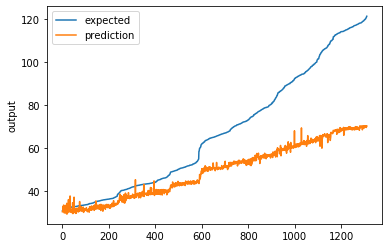

In [ ]:
chart_regression(pred.flatten(),y_test,sort=True)

### 1 LSTM layer with CheckPointer and EarlyStopping

In [ ]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

In [ ]:
for i in range(2):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')

0
Build model...
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 45s - loss: 186.1449 - val_loss: 6388.0978

Epoch 00001: val_loss improved from inf to 6388.09783, saving model to ./best_weights_lstm.hdf5
Epoch 2/10
 - 5s - loss: 24.4608 - val_loss: 1808.9278

Epoch 00002: val_loss improved from 6388.09783 to 1808.92784, saving model to ./best_weights_lstm.hdf5
Epoch 3/10
 - 5s - loss: 17.0134 - val_loss: 583.0032

Epoch 00003: val_loss improved from 1808.92784 to 583.00318, saving model to ./best_weights_lstm.hdf5
Epoch 4/10
 - 4s - loss: 10.3350 - val_loss: 53.4363

Epoch 00004: val_loss improved from 583.00318 to 53.43634, saving model to ./best_weights_lstm.hdf5
Epoch 5/10
 - 5s - loss: 6.5395 - val_loss: 140.0576

Epoch 00005: val_loss did not improve from 53.43634
Epoch 6/10
 - 4s - loss: 4.9906 - val_loss: 180.4705

Epoch 00006: val_loss did not improve from 53.43634
Epoch 7/10
 - 6s - loss: 4.4491 - val_loss: 232.9522

Epoch 00007: val_loss did not improv

In [ ]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 5.520159808987441


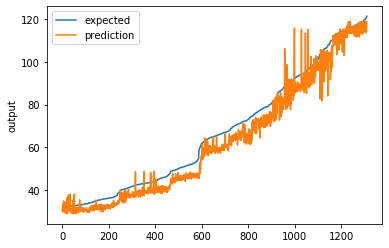

In [ ]:
chart_regression(pred.flatten(),y_test,sort=True)

### 2 LSTM Layers and 3 Dense Layers with adam and relu

In [ ]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm_11.hdf5", verbose=1, save_best_only=True)

In [ ]:
for i in range(2):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu", return_sequences=True))
    model_lstm.add(LSTM(32,activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(16, activation="relu"))
    model_lstm.add(Dense(8, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm_11.hdf5')

0
Build model...
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 51s - loss: 171.9233 - val_loss: 2907.5537

Epoch 00001: val_loss improved from inf to 2907.55368, saving model to ./best_weights_lstm_11.hdf5
Epoch 2/10
 - 6s - loss: 10.0781 - val_loss: 2021.9029

Epoch 00002: val_loss improved from 2907.55368 to 2021.90291, saving model to ./best_weights_lstm_11.hdf5
Epoch 3/10
 - 6s - loss: 4.3029 - val_loss: 1078.9413

Epoch 00003: val_loss improved from 2021.90291 to 1078.94128, saving model to ./best_weights_lstm_11.hdf5
Epoch 4/10
 - 5s - loss: 3.4537 - val_loss: 636.8253

Epoch 00004: val_loss improved from 1078.94128 to 636.82534, saving model to ./best_weights_lstm_11.hdf5
Epoch 5/10
 - 5s - loss: 2.2917 - val_loss: 340.2930

Epoch 00005: val_loss improved from 636.82534 to 340.29301, saving model to ./best_weights_lstm_11.hdf5
Epoch 6/10
 - 5s - loss: 1.7068 - val_loss: 341.5721

Epoch 00006: val_loss did not improve from 340.29301
Epoch 7/10
 - 6s - los

In [ ]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 8.015370122388047
R2 score: 0.92


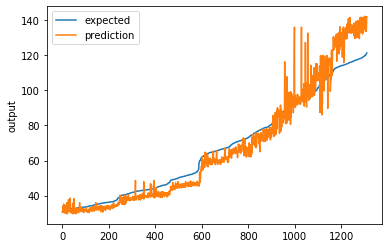

In [ ]:
chart_regression(pred.flatten(),y_test,sort=True)